In [14]:
import numpy as np
import pandas as pd

In [15]:
train = pd.read_csv("data/train.csv", dtype={"Age": np.float64}, )
test  = pd.read_csv("data/test.csv", dtype={"Age": np.float64}, )

In [16]:
train["first_name"] = train["Name"].apply(lambda x: x.rsplit(",",1)[0])
test["first_name"] = test["Name"].apply(lambda x: x.rsplit(",",1)[0])
train["Name_len"]=train["Name"].apply(lambda x: len(x.rsplit("(",1)[0]))
test["Name_len"]=test["Name"].apply(lambda x: len(x.rsplit("(",1)[0]))
train["First_Name_len"]=train["first_name"].apply(lambda x: len(x))
test["First_Name_len"]=test["first_name"].apply(lambda x: len(x))
train["Last_Name_len"]=train["Name_len"]-train["First_Name_len"]
test["Last_Name_len"]=test["Name_len"]-test["First_Name_len"]

In [17]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked first_name  Name_len  \
0      0         A/5 21171   7.2500   NaN        S     Braund        23   
1      0          PC 17599  71.2833   C85        C    Cumings        27   
2      0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen        22   
3      0            113803  53.1000  C123        S   Futrelle        29   
4      0            373450   8.0500   NaN        S      Allen        24   
5      0            330877   8.4583   NaN        Q      Moran        16   
6      0             17463  51.8625   E46        S   McCarthy        23   
7      1            349909  21.0750   NaN        S    Palsson        30   
8      2            347742  11.1333   NaN        S    Johnson        22   
9      0            237736  30.0708   NaN        C     Nasser        22   

   First_Name_len  Last_Name_len  
0               6             17  
1               7             20  
2               9             13  
3               8             21  
4               5             19  
5               5             11  
6               8             15  
7               7             23  
8               7             15  
9               6             16

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Input, Dense, Dropout
from keras.models import Model
import keras
import matplotlib.pyplot as plt

In [19]:
test.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

In [20]:
Fare_by_class = test.groupby('Pclass')['Fare'].median()
train['Fare_est']=train.Pclass.apply(lambda x: Fare_by_class[x])
train.Fare.fillna(train.Fare_est)
test['Fare_est']=test.Pclass.apply(lambda x: Fare_by_class[x])
test.Fare.fillna(test.Fare_est)
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [21]:
def correct_data(train_data, test_data):
    # Make missing values ​​for training data from test data as well
    train_data.Age = train_data.Age.fillna(test_data.Age.median())
    
    train_data.Fare = train_data.Fare.fillna(test_data.Fare.median())
    
    train_data.Name_len = train_data.Name_len.fillna(test_data.Name_len.median())
    train_data.First_Name_len = train_data.First_Name_len.fillna(test_data.First_Name_len.median())
    train_data.Last_Name_len = train_data.Last_Name_len.fillna(test_data.Last_Name_len.median())

    
    test_data.Age = test_data.Age.fillna(test_data.Age.median())
    test_data.Fare = test_data.Fare.fillna(test_data.Fare.median())    
    test_data.Name_len = train_data.Name_len.fillna(test_data.Name_len.median())
    test_data.First_Name_len = test_data.First_Name_len.fillna(test_data.First_Name_len.median())
    test_data.Last_Name_len = test_data.Last_Name_len.fillna(test_data.Last_Name_len.median())

    
    train_data = correct_data_common(train_data)
    test_data = correct_data_common(test_data)    
    return train_data,  test_data

def correct_data_common(titanic_data):
    titanic_data.Sex = titanic_data.Sex.replace(['male', 'female'], [0, 1])
    titanic_data.Embarked = titanic_data.Embarked.fillna("S")
    titanic_data.Embarked = titanic_data.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])

    return titanic_data

train_data,  test_data = correct_data(train, test)

In [22]:
del(train_data["Name"])
del(train_data["Ticket"])
del(train_data["Cabin"])
del(train_data["first_name"])
del(test_data["Name"])
del(test_data["Ticket"])
del(test_data["Cabin"])
del(test_data["first_name"])

In [23]:
train_data

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare  \
0              1         0       3    0  22.0      1      0    7.2500   
1              2         1       1    1  38.0      1      0   71.2833   
2              3         1       3    1  26.0      0      0    7.9250   
3              4         1       1    1  35.0      1      0   53.1000   
4              5         0       3    0  35.0      0      0    8.0500   
5              6         0       3    0  27.0      0      0    8.4583   
6              7         0       1    0  54.0      0      0   51.8625   
7              8         0       3    0   2.0      3      1   21.0750   
8              9         1       3    1  27.0      0      2   11.1333   
9             10         1       2    1  14.0      1      0   30.0708   
10            11         1       3    1   4.0      1      1   16.7000   
11            12         1       1    1  58.0      0      0   26.5500   
12            13         0       3    0  20.0      0      0    8.0500   
13            14         0       3    0  39.0      1      5   31.2750   
14            15         0       3    1  14.0      0      0    7.8542   
15            16         1       2    1  55.0      0      0   16.0000   
16            17         0       3    0   2.0      4      1   29.1250   
17            18         1       2    0  27.0      0      0   13.0000   
18            19         0       3    1  31.0      1      0   18.0000   
19            20         1       3    1  27.0      0      0    7.2250   
20            21         0       2    0  35.0      0      0   26.0000   
21            22         1       2    0  34.0      0      0   13.0000   
22            23         1       3    1  15.0      0      0    8.0292   
23            24         1       1    0  28.0      0      0   35.5000   
24            25         0       3    1   8.0      3      1   21.0750   
25            26         1       3    1  38.0      1      5   31.3875   
26            27         0       3    0  27.0      0      0    7.2250   
27            28         0       1    0  19.0      3      2  263.0000   
28            29         1       3    1  27.0      0      0    7.8792   
29            30         0       3    0  27.0      0      0    7.8958   
..           ...       ...     ...  ...   ...    ...    ...       ...   
861          862         0       2    0  21.0      1      0   11.5000   
862          863         1       1    1  48.0      0      0   25.9292   
863          864         0       3    1  27.0      8      2   69.5500   
864          865         0       2    0  24.0      0      0   13.0000   
865          866         1       2    1  42.0      0      0   13.0000   
866          867         1       2    1  27.0      1      0   13.8583   
867          868         0       1    0  31.0      0      0   50.4958   
868          869         0       3    0  27.0      0      0    9.5000   
869          870         1       3    0   4.0      1      1   11.1333   
870          871         0       3    0  26.0      0      0    7.8958   
871          872         1       1    1  47.0      1      1   52.5542   
872          873         0       1    0  33.0      0      0    5.0000   
873          874         0       3    0  47.0      0      0    9.0000   
874          875         1       2    1  28.0      1      0   24.0000   
875          876         1       3    1  15.0      0      0    7.2250   
876          877         0       3    0  20.0      0      0    9.8458   
877          878         0       3    0  19.0      0      0    7.8958   
878          879         0       3    0  27.0      0      0    7.8958   
879          880         1       1    1  56.0      0      1   83.1583   
880          881         1       2    1  25.0      0      1   26.0000   
881          882         0       3    0  33.0      0      0    7.8958   
882          883         0       3    1  22.0      0      0   10.5167   
883          884         0       2    0  28.0      0      0   1

In [27]:
train_tag_np = np.array(train_data["Survived"])

In [30]:
del(train_data["Survived"])

In [31]:
train_np = np.array(train_data)
test_np = np.array(test_data)

In [37]:
train_np = train_np.astype('float32')
test_np = test_np.astype('float32')

In [40]:
train_tag = keras.utils.np_utils.to_categorical(train_tag_np.astype('int32'),2)

In [42]:
train_tag

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [43]:
len(train_np)

891

In [44]:
len(train_np[0])

12

In [134]:
# モデルの作成
inputs = Input(shape=(12,))

nw = Dense(12, activation='relu')(inputs)
nw = Dropout(.5)(nw)
nw = Dense(12, activation='relu')(inputs)
nw = Dropout(.5)(nw)
nw = Dense(1, activation='relu')(inputs)
nw = Dropout(.5)(nw)
nw = Dense(12, activation='relu')(inputs)
nw = Dropout(.5)(nw)
nw2 = Dense(8, activation='sigmoid')(inputs)
nw2 = Dropout(.5)(nw2)
nw2 = Dense(4, activation='sigmoid')(inputs)
nw2 = Dropout(.5)(nw2)
nw2 = Dense(2, activation='sigmoid')(inputs)
nw2 = Dropout(.5)(nw2)
nw2 = Dense(1, activation='sigmoid')(inputs)
nw2 = Dropout(.5)(nw2)
merged_vector = keras.layers.concatenate([nw,nw2], axis=-1)
predictions = Dense(2, activation='softmax')(merged_vector)

In [135]:
# 訓練
model = Model(inputs=inputs, outputs=predictions)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [142]:
es_cb = keras.callbacks.EarlyStopping(monitor='loss', patience=10000, verbose=0, mode='auto')

In [143]:
history = model.fit(train_np,train_tag, batch_size=128, epochs=1000000, verbose=1, callbacks=[es_cb])

Epoch 1/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5110 - acc: 0.7508
Epoch 2/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.5098 - acc: 0.7565
Epoch 3/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4983 - acc: 0.7643
Epoch 4/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5029 - acc: 0.7688
Epoch 5/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.5036 - acc: 0.7744
Epoch 6/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5039 - acc: 0.7553
Epoch 7/1000000
891/891 [==============================] - 0s 71us/step - loss: 0.4910 - acc: 0.7666
Epoch 8/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4974 - acc: 0.7609
Epoch 9/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4941 - acc: 0.7722
Epoch 10/1000000
891/891 [==============================] - 0s 59us/step - loss: 0.4913 - a

891/891 [==============================] - 0s 24us/step - loss: 0.5162 - acc: 0.7565
Epoch 82/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5121 - acc: 0.7643
Epoch 83/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5017 - acc: 0.7654
Epoch 84/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.5081 - acc: 0.7609
Epoch 85/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5053 - acc: 0.7643
Epoch 86/1000000
891/891 [==============================] - 0s 45us/step - loss: 0.5005 - acc: 0.7531
Epoch 87/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.5063 - acc: 0.7565
Epoch 88/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5095 - acc: 0.7419
Epoch 89/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.5075 - acc: 0.7452
Epoch 90/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5064 - acc: 0.76

891/891 [==============================] - 0s 23us/step - loss: 0.4937 - acc: 0.7767
Epoch 161/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.5212 - acc: 0.7441
Epoch 162/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4986 - acc: 0.7654
Epoch 163/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5147 - acc: 0.7677
Epoch 164/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.5011 - acc: 0.7508
Epoch 165/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.5073 - acc: 0.7587
Epoch 166/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.5068 - acc: 0.7565
Epoch 167/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5121 - acc: 0.7464
Epoch 168/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4983 - acc: 0.7632
Epoch 169/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4809 - 

891/891 [==============================] - 0s 24us/step - loss: 0.4998 - acc: 0.7565
Epoch 240/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.5116 - acc: 0.7587
Epoch 241/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4880 - acc: 0.7565
Epoch 242/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.5118 - acc: 0.7609
Epoch 243/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4947 - acc: 0.7666
Epoch 244/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.5050 - acc: 0.7553
Epoch 245/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4825 - acc: 0.7744
Epoch 246/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4843 - acc: 0.7823
Epoch 247/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4787 - acc: 0.7733
Epoch 248/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.5070 - 

891/891 [==============================] - 0s 27us/step - loss: 0.5159 - acc: 0.7407
Epoch 319/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5083 - acc: 0.7486
Epoch 320/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.5100 - acc: 0.7609
Epoch 321/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4869 - acc: 0.7778
Epoch 322/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.5099 - acc: 0.7542
Epoch 323/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4876 - acc: 0.7699
Epoch 324/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.5070 - acc: 0.7654
Epoch 325/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4874 - acc: 0.7643
Epoch 326/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4961 - acc: 0.7677
Epoch 327/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5006 - 

891/891 [==============================] - 0s 23us/step - loss: 0.4875 - acc: 0.7576
Epoch 398/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4836 - acc: 0.7598
Epoch 399/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4889 - acc: 0.7688
Epoch 400/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4824 - acc: 0.7666
Epoch 401/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4978 - acc: 0.7520
Epoch 402/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4984 - acc: 0.7688
Epoch 403/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4812 - acc: 0.7699
Epoch 404/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4915 - acc: 0.7800
Epoch 405/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4776 - acc: 0.7688
Epoch 406/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4685 - 

891/891 [==============================] - 0s 30us/step - loss: 0.4858 - acc: 0.7598
Epoch 477/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.5186 - acc: 0.7419
Epoch 478/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4872 - acc: 0.7576
Epoch 479/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4814 - acc: 0.7744
Epoch 480/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4831 - acc: 0.7699
Epoch 481/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4821 - acc: 0.7666
Epoch 482/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4744 - acc: 0.7767
Epoch 483/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4856 - acc: 0.7733
Epoch 484/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.5010 - acc: 0.7598
Epoch 485/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4881 - 

891/891 [==============================] - 0s 35us/step - loss: 0.4855 - acc: 0.7654
Epoch 556/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4779 - acc: 0.7666
Epoch 557/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4891 - acc: 0.7553
Epoch 558/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4809 - acc: 0.7744
Epoch 559/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4943 - acc: 0.7497
Epoch 560/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4837 - acc: 0.7654
Epoch 561/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4929 - acc: 0.7677
Epoch 562/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4889 - acc: 0.7609
Epoch 563/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4796 - acc: 0.7699
Epoch 564/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4776 - 

891/891 [==============================] - 0s 23us/step - loss: 0.4919 - acc: 0.7531
Epoch 635/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4650 - acc: 0.7778
Epoch 636/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4727 - acc: 0.7677
Epoch 637/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4865 - acc: 0.7755
Epoch 638/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.5144 - acc: 0.7497
Epoch 639/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.5094 - acc: 0.7565
Epoch 640/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4888 - acc: 0.7632
Epoch 641/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5101 - acc: 0.7464
Epoch 642/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4852 - acc: 0.7632
Epoch 643/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4841 - 

891/891 [==============================] - 0s 24us/step - loss: 0.4819 - acc: 0.7677
Epoch 714/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4827 - acc: 0.7710
Epoch 715/1000000
891/891 [==============================] - 0s 49us/step - loss: 0.4710 - acc: 0.7688
Epoch 716/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.5089 - acc: 0.7632
Epoch 717/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4023 - acc: 0.812 - 0s 25us/step - loss: 0.4860 - acc: 0.7722
Epoch 718/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4819 - acc: 0.7666
Epoch 719/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4774 - acc: 0.7722
Epoch 720/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.5023 - acc: 0.7632
Epoch 721/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4750 - acc: 0.7789
Epoch 722/1000000
891/891 [==========================

891/891 [==============================] - 0s 20us/step - loss: 0.4731 - acc: 0.7699
Epoch 793/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4890 - acc: 0.7609
Epoch 794/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.5018 - acc: 0.7587
Epoch 795/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4882 - acc: 0.7632
Epoch 796/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4976 - acc: 0.7744
Epoch 797/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.5056 - acc: 0.7722
Epoch 798/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.5059 - acc: 0.7587
Epoch 799/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4892 - acc: 0.7699
Epoch 800/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4790 - acc: 0.7688
Epoch 801/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4924 - 

891/891 [==============================] - 0s 23us/step - loss: 0.4841 - acc: 0.7677
Epoch 872/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4730 - acc: 0.7755
Epoch 873/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4897 - acc: 0.7609
Epoch 874/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4902 - acc: 0.7565
Epoch 875/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4812 - acc: 0.7598
Epoch 876/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4779 - acc: 0.7666
Epoch 877/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4730 - acc: 0.7688
Epoch 878/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4698 - acc: 0.7755
Epoch 879/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4896 - acc: 0.7576
Epoch 880/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4941 - 

891/891 [==============================] - 0s 31us/step - loss: 0.4879 - acc: 0.7688
Epoch 951/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4956 - acc: 0.7632
Epoch 952/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4768 - acc: 0.7834
Epoch 953/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4755 - acc: 0.7677
Epoch 954/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4849 - acc: 0.7654
Epoch 955/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4750 - acc: 0.7587
Epoch 956/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4838 - acc: 0.7767
Epoch 957/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4957 - acc: 0.7542
Epoch 958/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4937 - acc: 0.7598
Epoch 959/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4823 - 

891/891 [==============================] - 0s 25us/step - loss: 0.4787 - acc: 0.7699
Epoch 1030/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4848 - acc: 0.7845
Epoch 1031/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4857 - acc: 0.7553
Epoch 1032/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4865 - acc: 0.7609
Epoch 1033/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4698 - acc: 0.7755
Epoch 1034/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4928 - acc: 0.7643
Epoch 1035/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4952 - acc: 0.7486
Epoch 1036/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.5057 - acc: 0.7531
Epoch 1037/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4848 - acc: 0.7699
Epoch 1038/1000000
891/891 [==============================] - 0s 21us/step - loss: 

Epoch 1108/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4901 - acc: 0.7598
Epoch 1109/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4948 - acc: 0.7677
Epoch 1110/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4928 - acc: 0.7621
Epoch 1111/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4786 - acc: 0.7755
Epoch 1112/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4830 - acc: 0.7722
Epoch 1113/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4836 - acc: 0.7565
Epoch 1114/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4889 - acc: 0.7542
Epoch 1115/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4915 - acc: 0.7531
Epoch 1116/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4868 - acc: 0.7508
Epoch 1117/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 21us/step - loss: 0.4910 - acc: 0.7598
Epoch 1187/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4807 - acc: 0.7789
Epoch 1188/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4770 - acc: 0.7677
Epoch 1189/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4848 - acc: 0.7609
Epoch 1190/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4820 - acc: 0.7688
Epoch 1191/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4830 - acc: 0.7789
Epoch 1192/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4991 - acc: 0.7643
Epoch 1193/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4940 - acc: 0.7553
Epoch 1194/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4980 - acc: 0.7621
Epoch 1195/1000000
891/891 [==============================] - 0s 29us/step - loss: 

Epoch 1265/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4807 - acc: 0.7632
Epoch 1266/1000000
891/891 [==============================] - 0s 56us/step - loss: 0.4831 - acc: 0.7722
Epoch 1267/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4642 - acc: 0.7699
Epoch 1268/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4996 - acc: 0.7542
Epoch 1269/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4814 - acc: 0.7710
Epoch 1270/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4936 - acc: 0.7565
Epoch 1271/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4926 - acc: 0.7688
Epoch 1272/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4762 - acc: 0.7733
Epoch 1273/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4854 - acc: 0.7654
Epoch 1274/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 27us/step - loss: 0.4919 - acc: 0.7486
Epoch 1344/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4706 - acc: 0.7609
Epoch 1345/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.5210 - acc: 0.7565
Epoch 1346/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4686 - acc: 0.7654
Epoch 1347/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4972 - acc: 0.7632
Epoch 1348/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4641 - acc: 0.7722
Epoch 1349/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4889 - acc: 0.7587
Epoch 1350/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4939 - acc: 0.7587
Epoch 1351/1000000
891/891 [==============================] - 0s 42us/step - loss: 0.4895 - acc: 0.7744
Epoch 1352/1000000
891/891 [==============================] - 0s 63us/step - loss: 

891/891 [==============================] - 0s 30us/step - loss: 0.4865 - acc: 0.7755
Epoch 1422/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4986 - acc: 0.7452
Epoch 1423/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4911 - acc: 0.7576
Epoch 1424/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4986 - acc: 0.7598
Epoch 1425/1000000
891/891 [==============================] - 0s 62us/step - loss: 0.4777 - acc: 0.7722
Epoch 1426/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4980 - acc: 0.7643
Epoch 1427/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4843 - acc: 0.7733
Epoch 1428/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4844 - acc: 0.7643
Epoch 1429/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4726 - acc: 0.7632
Epoch 1430/1000000
891/891 [==============================] - 0s 32us/step - loss: 

Epoch 1500/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4885 - acc: 0.7621
Epoch 1501/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4878 - acc: 0.7486
Epoch 1502/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4812 - acc: 0.7722
Epoch 1503/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4820 - acc: 0.7744
Epoch 1504/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4903 - acc: 0.7609
Epoch 1505/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4644 - acc: 0.7710
Epoch 1506/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4830 - acc: 0.7621
Epoch 1507/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4835 - acc: 0.7722
Epoch 1508/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4819 - acc: 0.7587
Epoch 1509/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 26us/step - loss: 0.4829 - acc: 0.7677
Epoch 1579/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4843 - acc: 0.7778
Epoch 1580/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4915 - acc: 0.7497
Epoch 1581/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4791 - acc: 0.7666
Epoch 1582/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4824 - acc: 0.7710
Epoch 1583/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4814 - acc: 0.7621
Epoch 1584/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4842 - acc: 0.7666
Epoch 1585/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4972 - acc: 0.7576
Epoch 1586/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4806 - acc: 0.7621
Epoch 1587/1000000
891/891 [==============================] - 0s 30us/step - loss: 

Epoch 1657/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4677 - acc: 0.7778
Epoch 1658/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4789 - acc: 0.7632
Epoch 1659/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4873 - acc: 0.7553
Epoch 1660/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4870 - acc: 0.7677
Epoch 1661/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4758 - acc: 0.7755
Epoch 1662/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4840 - acc: 0.7621
Epoch 1663/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4562 - acc: 0.7755
Epoch 1664/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4833 - acc: 0.7666
Epoch 1665/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4909 - acc: 0.7587
Epoch 1666/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 23us/step - loss: 0.4880 - acc: 0.7755
Epoch 1736/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4901 - acc: 0.7598
Epoch 1737/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4866 - acc: 0.7598
Epoch 1738/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4715 - acc: 0.7823
Epoch 1739/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4800 - acc: 0.7666
Epoch 1740/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4733 - acc: 0.7811
Epoch 1741/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4832 - acc: 0.7744
Epoch 1742/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4809 - acc: 0.7677
Epoch 1743/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4930 - acc: 0.7677
Epoch 1744/1000000
891/891 [==============================] - 0s 28us/step - loss: 

Epoch 1814/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4810 - acc: 0.7609
Epoch 1815/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4714 - acc: 0.7755
Epoch 1816/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4832 - acc: 0.7767
Epoch 1817/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4898 - acc: 0.7553
Epoch 1818/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4706 - acc: 0.7845
Epoch 1819/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4899 - acc: 0.7666
Epoch 1820/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4924 - acc: 0.7542
Epoch 1821/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4844 - acc: 0.7699
Epoch 1822/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4733 - acc: 0.7654
Epoch 1823/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 24us/step - loss: 0.4884 - acc: 0.7598
Epoch 1893/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4767 - acc: 0.7632
Epoch 1894/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4850 - acc: 0.7542
Epoch 1895/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4779 - acc: 0.7710
Epoch 1896/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4716 - acc: 0.7767
Epoch 1897/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4968 - acc: 0.7497
Epoch 1898/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4872 - acc: 0.7677
Epoch 1899/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.5027 - acc: 0.7632
Epoch 1900/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4960 - acc: 0.7587
Epoch 1901/1000000
891/891 [==============================] - 0s 27us/step - loss: 

891/891 [==============================] - 0s 24us/step - loss: 0.4795 - acc: 0.7722
Epoch 1971/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4861 - acc: 0.7609
Epoch 1972/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4740 - acc: 0.7890
Epoch 1973/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4708 - acc: 0.7755
Epoch 1974/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4823 - acc: 0.7621
Epoch 1975/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4940 - acc: 0.7609
Epoch 1976/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4894 - acc: 0.7531
Epoch 1977/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4832 - acc: 0.7654
Epoch 1978/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4911 - acc: 0.7778
Epoch 1979/1000000
891/891 [==============================] - 0s 30us/step - loss: 

891/891 [==============================] - 0s 26us/step - loss: 0.4885 - acc: 0.7666
Epoch 2049/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4678 - acc: 0.7699
Epoch 2050/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4771 - acc: 0.7744
Epoch 2051/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4916 - acc: 0.7553
Epoch 2052/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4766 - acc: 0.7733
Epoch 2053/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4994 - acc: 0.7587
Epoch 2054/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4809 - acc: 0.7755
Epoch 2055/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4868 - acc: 0.7632
Epoch 2056/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4741 - acc: 0.7767
Epoch 2057/1000000
891/891 [==============================] - 0s 39us/step - loss: 

Epoch 2127/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5012 - acc: 0.7643
Epoch 2128/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4908 - acc: 0.7565
Epoch 2129/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4910 - acc: 0.7677
Epoch 2130/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4939 - acc: 0.7542
Epoch 2131/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4801 - acc: 0.7800
Epoch 2132/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.5040 - acc: 0.7598
Epoch 2133/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4881 - acc: 0.7710
Epoch 2134/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4858 - acc: 0.7531
Epoch 2135/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4720 - acc: 0.7632
Epoch 2136/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 33us/step - loss: 0.4952 - acc: 0.7520
Epoch 2206/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4855 - acc: 0.7643
Epoch 2207/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4811 - acc: 0.7699
Epoch 2208/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4622 - acc: 0.7722
Epoch 2209/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4670 - acc: 0.7778
Epoch 2210/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4854 - acc: 0.7688
Epoch 2211/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4903 - acc: 0.7598
Epoch 2212/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4769 - acc: 0.7553
Epoch 2213/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4746 - acc: 0.7587
Epoch 2214/1000000
891/891 [==============================] - 0s 32us/step - loss: 

Epoch 2284/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4963 - acc: 0.7632
Epoch 2285/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4987 - acc: 0.7497
Epoch 2286/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4897 - acc: 0.7677
Epoch 2287/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4859 - acc: 0.7609
Epoch 2288/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.5012 - acc: 0.7508
Epoch 2289/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4854 - acc: 0.7767
Epoch 2290/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4672 - acc: 0.7677
Epoch 2291/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4781 - acc: 0.7621
Epoch 2292/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4729 - acc: 0.7688
Epoch 2293/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 21us/step - loss: 0.4912 - acc: 0.7699
Epoch 2363/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4915 - acc: 0.7587
Epoch 2364/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4735 - acc: 0.7621
Epoch 2365/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4927 - acc: 0.7632
Epoch 2366/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4795 - acc: 0.7632
Epoch 2367/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4878 - acc: 0.7587
Epoch 2368/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4895 - acc: 0.7553
Epoch 2369/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4841 - acc: 0.7699
Epoch 2370/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4775 - acc: 0.7710
Epoch 2371/1000000
891/891 [==============================] - 0s 26us/step - loss: 

Epoch 2441/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4993 - acc: 0.7733
Epoch 2442/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4848 - acc: 0.7621
Epoch 2443/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4481 - acc: 0.7834
Epoch 2444/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4683 - acc: 0.7666
Epoch 2445/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4832 - acc: 0.7677
Epoch 2446/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.5056 - acc: 0.7508
Epoch 2447/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4680 - acc: 0.7868
Epoch 2448/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4661 - acc: 0.7868
Epoch 2449/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4731 - acc: 0.7789
Epoch 2450/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 30us/step - loss: 0.4668 - acc: 0.7845
Epoch 2520/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4631 - acc: 0.7733
Epoch 2521/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4674 - acc: 0.7621
Epoch 2522/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4943 - acc: 0.7621
Epoch 2523/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4983 - acc: 0.7531
Epoch 2524/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4856 - acc: 0.7553
Epoch 2525/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4811 - acc: 0.7699
Epoch 2526/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4897 - acc: 0.7486
Epoch 2527/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4705 - acc: 0.7834
Epoch 2528/1000000
891/891 [==============================] - 0s 39us/step - loss: 

Epoch 2598/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4976 - acc: 0.7553
Epoch 2599/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4748 - acc: 0.7710
Epoch 2600/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4922 - acc: 0.7609
Epoch 2601/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4785 - acc: 0.7598
Epoch 2602/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4974 - acc: 0.7654
Epoch 2603/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.5032 - acc: 0.7520
Epoch 2604/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4682 - acc: 0.7688
Epoch 2605/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4729 - acc: 0.7688
Epoch 2606/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4881 - acc: 0.7654
Epoch 2607/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 26us/step - loss: 0.4899 - acc: 0.7632
Epoch 2677/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4804 - acc: 0.7710
Epoch 2678/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4762 - acc: 0.7666
Epoch 2679/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4762 - acc: 0.7733
Epoch 2680/1000000
891/891 [==============================] - 0s 45us/step - loss: 0.4811 - acc: 0.7643
Epoch 2681/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4738 - acc: 0.7868
Epoch 2682/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4695 - acc: 0.7800
Epoch 2683/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.5002 - acc: 0.7587
Epoch 2684/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4858 - acc: 0.7710
Epoch 2685/1000000
891/891 [==============================] - 0s 30us/step - loss: 

Epoch 2755/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4792 - acc: 0.7587
Epoch 2756/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4837 - acc: 0.7733
Epoch 2757/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4598 - acc: 0.7834
Epoch 2758/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4619 - acc: 0.7834
Epoch 2759/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4924 - acc: 0.7576
Epoch 2760/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4807 - acc: 0.7677
Epoch 2761/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4828 - acc: 0.7688
Epoch 2762/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4913 - acc: 0.7542
Epoch 2763/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5175 - acc: 0.7475
Epoch 2764/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 25us/step - loss: 0.4722 - acc: 0.7520
Epoch 2834/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4752 - acc: 0.7722
Epoch 2835/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4822 - acc: 0.7621
Epoch 2836/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4839 - acc: 0.7531
Epoch 2837/1000000
891/891 [==============================] - ETA: 0s - loss: 0.6205 - acc: 0.710 - 0s 26us/step - loss: 0.5059 - acc: 0.7576
Epoch 2838/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4638 - acc: 0.7755
Epoch 2839/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4750 - acc: 0.7666
Epoch 2840/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4876 - acc: 0.7621
Epoch 2841/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4812 - acc: 0.7677
Epoch 2842/1000000
891/891 [=================

891/891 [==============================] - 0s 24us/step - loss: 0.5017 - acc: 0.7632
Epoch 2912/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4657 - acc: 0.7755
Epoch 2913/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4573 - acc: 0.7767
Epoch 2914/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4893 - acc: 0.7576
Epoch 2915/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4800 - acc: 0.7576
Epoch 2916/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4776 - acc: 0.7744
Epoch 2917/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4615 - acc: 0.7755
Epoch 2918/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4780 - acc: 0.7744
Epoch 2919/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4776 - acc: 0.7654
Epoch 2920/1000000
891/891 [==============================] - 0s 28us/step - loss: 

Epoch 2990/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4771 - acc: 0.7531
Epoch 2991/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4933 - acc: 0.7486
Epoch 2992/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4748 - acc: 0.7666
Epoch 2993/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4884 - acc: 0.7598
Epoch 2994/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4839 - acc: 0.7520
Epoch 2995/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4744 - acc: 0.7800
Epoch 2996/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4674 - acc: 0.7744
Epoch 2997/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4705 - acc: 0.7565
Epoch 2998/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4863 - acc: 0.7587
Epoch 2999/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 30us/step - loss: 0.4719 - acc: 0.7722
Epoch 3069/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4823 - acc: 0.7576
Epoch 3070/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4910 - acc: 0.7755
Epoch 3071/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4863 - acc: 0.7621
Epoch 3072/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4804 - acc: 0.7733
Epoch 3073/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4771 - acc: 0.7767
Epoch 3074/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.5015 - acc: 0.7486
Epoch 3075/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4768 - acc: 0.7767
Epoch 3076/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4672 - acc: 0.7856
Epoch 3077/1000000
891/891 [==============================] - 0s 26us/step - loss: 

Epoch 3147/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4775 - acc: 0.7688
Epoch 3148/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4821 - acc: 0.7609
Epoch 3149/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4802 - acc: 0.7744
Epoch 3150/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4881 - acc: 0.7710
Epoch 3151/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4679 - acc: 0.7710
Epoch 3152/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4792 - acc: 0.7643
Epoch 3153/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4806 - acc: 0.7688
Epoch 3154/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4961 - acc: 0.7508
Epoch 3155/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4784 - acc: 0.7699
Epoch 3156/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 22us/step - loss: 0.4812 - acc: 0.7688
Epoch 3226/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4823 - acc: 0.7733
Epoch 3227/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4916 - acc: 0.7643
Epoch 3228/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4999 - acc: 0.7553
Epoch 3229/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4902 - acc: 0.7632
Epoch 3230/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.5058 - acc: 0.7699
Epoch 3231/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4737 - acc: 0.7778
Epoch 3232/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4884 - acc: 0.7565
Epoch 3233/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4877 - acc: 0.7565
Epoch 3234/1000000
891/891 [==============================] - 0s 36us/step - loss: 

891/891 [==============================] - 0s 31us/step - loss: 0.4787 - acc: 0.7778
Epoch 3304/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4803 - acc: 0.7621
Epoch 3305/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.5054 - acc: 0.7531
Epoch 3306/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4781 - acc: 0.7722
Epoch 3307/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4746 - acc: 0.7632
Epoch 3308/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4772 - acc: 0.7576
Epoch 3309/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4916 - acc: 0.7609
Epoch 3310/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4854 - acc: 0.7677
Epoch 3311/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4810 - acc: 0.7744
Epoch 3312/1000000
891/891 [==============================] - 0s 30us/step - loss: 

Epoch 3382/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4975 - acc: 0.7654
Epoch 3383/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4734 - acc: 0.7710
Epoch 3384/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4725 - acc: 0.7733
Epoch 3385/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4977 - acc: 0.7609
Epoch 3386/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4926 - acc: 0.7609
Epoch 3387/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4735 - acc: 0.7845
Epoch 3388/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4865 - acc: 0.7654
Epoch 3389/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4839 - acc: 0.7722
Epoch 3390/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.5013 - acc: 0.7497
Epoch 3391/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 27us/step - loss: 0.4862 - acc: 0.7677
Epoch 3461/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4817 - acc: 0.7744
Epoch 3462/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4700 - acc: 0.7609
Epoch 3463/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4761 - acc: 0.7755
Epoch 3464/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4863 - acc: 0.7654
Epoch 3465/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4960 - acc: 0.7621
Epoch 3466/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4884 - acc: 0.7609
Epoch 3467/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4779 - acc: 0.7789
Epoch 3468/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.5036 - acc: 0.7542
Epoch 3469/1000000
891/891 [==============================] - 0s 47us/step - loss: 

Epoch 3539/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4743 - acc: 0.7733
Epoch 3540/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4942 - acc: 0.7531
Epoch 3541/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.5152 - acc: 0.7430
Epoch 3542/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4977 - acc: 0.7520
Epoch 3543/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4874 - acc: 0.7755
Epoch 3544/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4726 - acc: 0.7778
Epoch 3545/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4814 - acc: 0.7508
Epoch 3546/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4773 - acc: 0.7767
Epoch 3547/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4940 - acc: 0.7632
Epoch 3548/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 26us/step - loss: 0.4802 - acc: 0.7621
Epoch 3618/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4734 - acc: 0.7688
Epoch 3619/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4910 - acc: 0.7643
Epoch 3620/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4924 - acc: 0.7710
Epoch 3621/1000000
891/891 [==============================] - 0s 52us/step - loss: 0.4877 - acc: 0.7531
Epoch 3622/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4974 - acc: 0.7710
Epoch 3623/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.5024 - acc: 0.7520
Epoch 3624/1000000
891/891 [==============================] - 0s 45us/step - loss: 0.4964 - acc: 0.7497
Epoch 3625/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4996 - acc: 0.7587
Epoch 3626/1000000
891/891 [==============================] - 0s 29us/step - loss: 

Epoch 3696/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4810 - acc: 0.7710
Epoch 3697/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4965 - acc: 0.7565
Epoch 3698/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4810 - acc: 0.7755
Epoch 3699/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4690 - acc: 0.7643
Epoch 3700/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4886 - acc: 0.7621
Epoch 3701/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4882 - acc: 0.7767
Epoch 3702/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4894 - acc: 0.7643
Epoch 3703/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4882 - acc: 0.7587
Epoch 3704/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4876 - acc: 0.7666
Epoch 3705/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 27us/step - loss: 0.4698 - acc: 0.7733
Epoch 3775/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4947 - acc: 0.7587
Epoch 3776/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4760 - acc: 0.7744
Epoch 3777/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4839 - acc: 0.7486
Epoch 3778/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4820 - acc: 0.7609
Epoch 3779/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4747 - acc: 0.7677
Epoch 3780/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4740 - acc: 0.7677
Epoch 3781/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4759 - acc: 0.7654
Epoch 3782/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4887 - acc: 0.7722
Epoch 3783/1000000
891/891 [==============================] - 0s 34us/step - loss: 

Epoch 3853/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4644 - acc: 0.7722
Epoch 3854/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4776 - acc: 0.7767
Epoch 3855/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4730 - acc: 0.7508
Epoch 3856/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4918 - acc: 0.7508
Epoch 3857/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4937 - acc: 0.7643
Epoch 3858/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4811 - acc: 0.7767
Epoch 3859/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4825 - acc: 0.7542
Epoch 3860/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4780 - acc: 0.7632
Epoch 3861/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4684 - acc: 0.7811
Epoch 3862/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 24us/step - loss: 0.4773 - acc: 0.7778
Epoch 3932/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4789 - acc: 0.7587
Epoch 3933/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4875 - acc: 0.7576
Epoch 3934/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4787 - acc: 0.7553
Epoch 3935/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4975 - acc: 0.7677
Epoch 3936/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4920 - acc: 0.7643
Epoch 3937/1000000
891/891 [==============================] - 0s 46us/step - loss: 0.4673 - acc: 0.7744
Epoch 3938/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4829 - acc: 0.7598
Epoch 3939/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4859 - acc: 0.7654
Epoch 3940/1000000
891/891 [==============================] - 0s 34us/step - loss: 

Epoch 4010/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4753 - acc: 0.7744
Epoch 4011/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4983 - acc: 0.7587
Epoch 4012/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4497 - acc: 0.7845
Epoch 4013/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4838 - acc: 0.7677
Epoch 4014/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4901 - acc: 0.7609
Epoch 4015/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4798 - acc: 0.7755
Epoch 4016/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4809 - acc: 0.7722
Epoch 4017/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4810 - acc: 0.7688
Epoch 4018/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4877 - acc: 0.7654
Epoch 4019/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 24us/step - loss: 0.4754 - acc: 0.7811
Epoch 4089/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4841 - acc: 0.7688
Epoch 4090/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4836 - acc: 0.7598
Epoch 4091/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4761 - acc: 0.7643
Epoch 4092/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.5094 - acc: 0.7396
Epoch 4093/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4850 - acc: 0.7654
Epoch 4094/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4750 - acc: 0.7677
Epoch 4095/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4892 - acc: 0.7531
Epoch 4096/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4731 - acc: 0.7609
Epoch 4097/1000000
891/891 [==============================] - 0s 28us/step - loss: 

Epoch 4167/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4787 - acc: 0.7654
Epoch 4168/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4659 - acc: 0.7778
Epoch 4169/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4794 - acc: 0.7677
Epoch 4170/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4860 - acc: 0.7666
Epoch 4171/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4608 - acc: 0.7935
Epoch 4172/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4796 - acc: 0.7722
Epoch 4173/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4808 - acc: 0.7587
Epoch 4174/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4881 - acc: 0.7609
Epoch 4175/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4772 - acc: 0.7609
Epoch 4176/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 26us/step - loss: 0.4845 - acc: 0.7587
Epoch 4246/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4852 - acc: 0.7643
Epoch 4247/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.5112 - acc: 0.7486
Epoch 4248/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4744 - acc: 0.7755
Epoch 4249/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4862 - acc: 0.7632
Epoch 4250/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4834 - acc: 0.7666
Epoch 4251/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4729 - acc: 0.7677
Epoch 4252/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4726 - acc: 0.7699
Epoch 4253/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4877 - acc: 0.7565
Epoch 4254/1000000
891/891 [==============================] - 0s 25us/step - loss: 

Epoch 4324/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4751 - acc: 0.7565
Epoch 4325/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4723 - acc: 0.7587
Epoch 4326/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4785 - acc: 0.7643
Epoch 4327/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4827 - acc: 0.7643
Epoch 4328/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4620 - acc: 0.7677
Epoch 4329/1000000
891/891 [==============================] - 0s 44us/step - loss: 0.4758 - acc: 0.7710
Epoch 4330/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4737 - acc: 0.7666
Epoch 4331/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4665 - acc: 0.7733
Epoch 4332/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4866 - acc: 0.7497
Epoch 4333/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 22us/step - loss: 0.4852 - acc: 0.7699
Epoch 4403/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4660 - acc: 0.765 - 0s 21us/step - loss: 0.4885 - acc: 0.7531
Epoch 4404/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4771 - acc: 0.7643
Epoch 4405/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4809 - acc: 0.7598
Epoch 4406/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.5041 - acc: 0.7710
Epoch 4407/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4838 - acc: 0.7598
Epoch 4408/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4751 - acc: 0.7688
Epoch 4409/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4803 - acc: 0.7587
Epoch 4410/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4721 - acc: 0.7654
Epoch 4411/1000000
891/891 [=================

891/891 [==============================] - 0s 31us/step - loss: 0.4771 - acc: 0.7553
Epoch 4481/1000000
891/891 [==============================] - 0s 17us/step - loss: 0.4836 - acc: 0.7722
Epoch 4482/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4790 - acc: 0.7553
Epoch 4483/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4723 - acc: 0.7688
Epoch 4484/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4861 - acc: 0.7542
Epoch 4485/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4827 - acc: 0.7565
Epoch 4486/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4753 - acc: 0.7778
Epoch 4487/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4646 - acc: 0.7800
Epoch 4488/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4789 - acc: 0.7699
Epoch 4489/1000000
891/891 [==============================] - 0s 30us/step - loss: 

891/891 [==============================] - 0s 22us/step - loss: 0.4780 - acc: 0.7666
Epoch 4559/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4823 - acc: 0.7722
Epoch 4560/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4793 - acc: 0.7621
Epoch 4561/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4606 - acc: 0.7778
Epoch 4562/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4705 - acc: 0.7744
Epoch 4563/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4681 - acc: 0.7632
Epoch 4564/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4788 - acc: 0.7778
Epoch 4565/1000000
891/891 [==============================] - 0s 51us/step - loss: 0.4717 - acc: 0.7778
Epoch 4566/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4767 - acc: 0.7789
Epoch 4567/1000000
891/891 [==============================] - 0s 32us/step - loss: 

Epoch 4637/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4787 - acc: 0.7666
Epoch 4638/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4992 - acc: 0.7666
Epoch 4639/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4766 - acc: 0.7722
Epoch 4640/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4781 - acc: 0.7688
Epoch 4641/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4988 - acc: 0.7565
Epoch 4642/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4758 - acc: 0.7722
Epoch 4643/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4560 - acc: 0.7699
Epoch 4644/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4834 - acc: 0.7497
Epoch 4645/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4757 - acc: 0.7722
Epoch 4646/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 22us/step - loss: 0.4951 - acc: 0.7553
Epoch 4716/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4606 - acc: 0.7767
Epoch 4717/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4591 - acc: 0.7677
Epoch 4718/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4757 - acc: 0.7755
Epoch 4719/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4753 - acc: 0.7677
Epoch 4720/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4749 - acc: 0.7710
Epoch 4721/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4873 - acc: 0.7520
Epoch 4722/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4847 - acc: 0.7598
Epoch 4723/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4851 - acc: 0.7733
Epoch 4724/1000000
891/891 [==============================] - 0s 28us/step - loss: 

Epoch 4794/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4749 - acc: 0.7699
Epoch 4795/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4752 - acc: 0.7609
Epoch 4796/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4823 - acc: 0.7755
Epoch 4797/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4494 - acc: 0.7699
Epoch 4798/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4868 - acc: 0.7722
Epoch 4799/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4802 - acc: 0.7677
Epoch 4800/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4884 - acc: 0.7621
Epoch 4801/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4919 - acc: 0.7654
Epoch 4802/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4999 - acc: 0.7710
Epoch 4803/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 29us/step - loss: 0.4974 - acc: 0.7688
Epoch 4873/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4748 - acc: 0.7643
Epoch 4874/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4891 - acc: 0.7643
Epoch 4875/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4692 - acc: 0.7890
Epoch 4876/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4916 - acc: 0.7677
Epoch 4877/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4856 - acc: 0.7699
Epoch 4878/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4867 - acc: 0.7677
Epoch 4879/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.5011 - acc: 0.7385
Epoch 4880/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4903 - acc: 0.7621
Epoch 4881/1000000
891/891 [==============================] - 0s 23us/step - loss: 

Epoch 4951/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4783 - acc: 0.7744
Epoch 4952/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4798 - acc: 0.7755
Epoch 4953/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4713 - acc: 0.7744
Epoch 4954/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4856 - acc: 0.7688
Epoch 4955/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4780 - acc: 0.7643
Epoch 4956/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4938 - acc: 0.7486
Epoch 4957/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4697 - acc: 0.7654
Epoch 4958/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4682 - acc: 0.7755
Epoch 4959/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5001 - acc: 0.7576
Epoch 4960/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 19us/step - loss: 0.4680 - acc: 0.7767
Epoch 5030/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4693 - acc: 0.7722
Epoch 5031/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4956 - acc: 0.7520
Epoch 5032/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4969 - acc: 0.7609
Epoch 5033/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4912 - acc: 0.7576
Epoch 5034/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4864 - acc: 0.7677
Epoch 5035/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4839 - acc: 0.7744
Epoch 5036/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4814 - acc: 0.7688
Epoch 5037/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4809 - acc: 0.7699
Epoch 5038/1000000
891/891 [==============================] - 0s 26us/step - loss: 

Epoch 5108/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4935 - acc: 0.7576
Epoch 5109/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4850 - acc: 0.7654
Epoch 5110/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.5063 - acc: 0.7565
Epoch 5111/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4795 - acc: 0.7598
Epoch 5112/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4805 - acc: 0.7744
Epoch 5113/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4801 - acc: 0.7811
Epoch 5114/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4906 - acc: 0.7666
Epoch 5115/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4602 - acc: 0.7856
Epoch 5116/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4663 - acc: 0.7733
Epoch 5117/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 29us/step - loss: 0.4706 - acc: 0.7598
Epoch 5187/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4890 - acc: 0.7688
Epoch 5188/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4774 - acc: 0.7643
Epoch 5189/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4733 - acc: 0.7710
Epoch 5190/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.5006 - acc: 0.7508
Epoch 5191/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4852 - acc: 0.7609
Epoch 5192/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4653 - acc: 0.7643
Epoch 5193/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4678 - acc: 0.7823
Epoch 5194/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4832 - acc: 0.7598
Epoch 5195/1000000
891/891 [==============================] - 0s 23us/step - loss: 

Epoch 5265/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4825 - acc: 0.7699
Epoch 5266/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4739 - acc: 0.7654
Epoch 5267/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4766 - acc: 0.7733
Epoch 5268/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4905 - acc: 0.7666
Epoch 5269/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4746 - acc: 0.7733
Epoch 5270/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4622 - acc: 0.7654
Epoch 5271/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4868 - acc: 0.7643
Epoch 5272/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4923 - acc: 0.7565
Epoch 5273/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4847 - acc: 0.7598
Epoch 5274/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 24us/step - loss: 0.4978 - acc: 0.7666
Epoch 5344/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4750 - acc: 0.7744
Epoch 5345/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4919 - acc: 0.7531
Epoch 5346/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4802 - acc: 0.7621
Epoch 5347/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4919 - acc: 0.7666
Epoch 5348/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4872 - acc: 0.7654
Epoch 5349/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4720 - acc: 0.7811
Epoch 5350/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4684 - acc: 0.7598
Epoch 5351/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4809 - acc: 0.7677
Epoch 5352/1000000
891/891 [==============================] - 0s 24us/step - loss: 

Epoch 5422/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4730 - acc: 0.7767
Epoch 5423/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4747 - acc: 0.7722
Epoch 5424/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4959 - acc: 0.7565
Epoch 5425/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4846 - acc: 0.7621
Epoch 5426/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4652 - acc: 0.7778
Epoch 5427/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4923 - acc: 0.7621
Epoch 5428/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4911 - acc: 0.7677
Epoch 5429/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4843 - acc: 0.7744
Epoch 5430/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4810 - acc: 0.7598
Epoch 5431/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 24us/step - loss: 0.4744 - acc: 0.7677
Epoch 5501/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4888 - acc: 0.7643
Epoch 5502/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4868 - acc: 0.7609
Epoch 5503/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4940 - acc: 0.7643
Epoch 5504/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4672 - acc: 0.7800
Epoch 5505/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4948 - acc: 0.7654
Epoch 5506/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4692 - acc: 0.7789
Epoch 5507/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4939 - acc: 0.7576
Epoch 5508/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4809 - acc: 0.7744
Epoch 5509/1000000
891/891 [==============================] - 0s 32us/step - loss: 

Epoch 5579/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4775 - acc: 0.7688
Epoch 5580/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4843 - acc: 0.7621
Epoch 5581/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4808 - acc: 0.7666
Epoch 5582/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4684 - acc: 0.7722
Epoch 5583/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4733 - acc: 0.7778
Epoch 5584/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4859 - acc: 0.7643
Epoch 5585/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4714 - acc: 0.7800
Epoch 5586/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4792 - acc: 0.7643
Epoch 5587/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4937 - acc: 0.7621
Epoch 5588/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 23us/step - loss: 0.4846 - acc: 0.7565
Epoch 5658/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4961 - acc: 0.7542
Epoch 5659/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4827 - acc: 0.7677
Epoch 5660/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4633 - acc: 0.7621
Epoch 5661/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4903 - acc: 0.7710
Epoch 5662/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4829 - acc: 0.7744
Epoch 5663/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4760 - acc: 0.7677
Epoch 5664/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4867 - acc: 0.7576
Epoch 5665/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4600 - acc: 0.7755
Epoch 5666/1000000
891/891 [==============================] - 0s 26us/step - loss: 

Epoch 5736/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4644 - acc: 0.7755
Epoch 5737/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4779 - acc: 0.7710
Epoch 5738/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4696 - acc: 0.7666
Epoch 5739/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4843 - acc: 0.7553
Epoch 5740/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.5083 - acc: 0.7576
Epoch 5741/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4754 - acc: 0.7598
Epoch 5742/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4691 - acc: 0.7755
Epoch 5743/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4842 - acc: 0.7621
Epoch 5744/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4699 - acc: 0.7823
Epoch 5745/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 20us/step - loss: 0.4730 - acc: 0.7856
Epoch 5815/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4867 - acc: 0.7755
Epoch 5816/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4900 - acc: 0.7576
Epoch 5817/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4736 - acc: 0.7643
Epoch 5818/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4857 - acc: 0.7744
Epoch 5819/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4701 - acc: 0.7688
Epoch 5820/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4620 - acc: 0.7800
Epoch 5821/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4949 - acc: 0.7565
Epoch 5822/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4839 - acc: 0.7699
Epoch 5823/1000000
891/891 [==============================] - 0s 25us/step - loss: 

Epoch 5893/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4813 - acc: 0.7733
Epoch 5894/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4879 - acc: 0.7666
Epoch 5895/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4667 - acc: 0.7654
Epoch 5896/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4731 - acc: 0.7767
Epoch 5897/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4899 - acc: 0.7677
Epoch 5898/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4572 - acc: 0.7688
Epoch 5899/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4879 - acc: 0.7643
Epoch 5900/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4800 - acc: 0.7778
Epoch 5901/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4853 - acc: 0.7654
Epoch 5902/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 23us/step - loss: 0.4802 - acc: 0.7565
Epoch 5972/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4943 - acc: 0.7542
Epoch 5973/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4780 - acc: 0.7778
Epoch 5974/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4929 - acc: 0.7699
Epoch 5975/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4836 - acc: 0.7699
Epoch 5976/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4878 - acc: 0.7632
Epoch 5977/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4878 - acc: 0.7553
Epoch 5978/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4991 - acc: 0.7542
Epoch 5979/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4862 - acc: 0.7587
Epoch 5980/1000000
891/891 [==============================] - 0s 30us/step - loss: 

Epoch 6050/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4571 - acc: 0.7755
Epoch 6051/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4731 - acc: 0.7778
Epoch 6052/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4642 - acc: 0.7733
Epoch 6053/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4659 - acc: 0.7733
Epoch 6054/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4944 - acc: 0.7677
Epoch 6055/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4770 - acc: 0.7733
Epoch 6056/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4753 - acc: 0.7834
Epoch 6057/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4793 - acc: 0.7688
Epoch 6058/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4669 - acc: 0.7834
Epoch 6059/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 28us/step - loss: 0.4719 - acc: 0.7778
Epoch 6129/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4710 - acc: 0.7744
Epoch 6130/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4894 - acc: 0.7553
Epoch 6131/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4795 - acc: 0.7643
Epoch 6132/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4910 - acc: 0.7722
Epoch 6133/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4778 - acc: 0.7722
Epoch 6134/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4775 - acc: 0.7598
Epoch 6135/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4774 - acc: 0.7767
Epoch 6136/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4704 - acc: 0.7621
Epoch 6137/1000000
891/891 [==============================] - 0s 32us/step - loss: 

Epoch 6207/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.5010 - acc: 0.7475
Epoch 6208/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4647 - acc: 0.7811
Epoch 6209/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4777 - acc: 0.7733
Epoch 6210/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4854 - acc: 0.7542
Epoch 6211/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4886 - acc: 0.7587
Epoch 6212/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4724 - acc: 0.7811
Epoch 6213/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4627 - acc: 0.7733
Epoch 6214/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4856 - acc: 0.7598
Epoch 6215/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4897 - acc: 0.7722
Epoch 6216/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 24us/step - loss: 0.4707 - acc: 0.7744
Epoch 6286/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4809 - acc: 0.7789
Epoch 6287/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4801 - acc: 0.7666
Epoch 6288/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4701 - acc: 0.7733
Epoch 6289/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4703 - acc: 0.7744
Epoch 6290/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4787 - acc: 0.7598
Epoch 6291/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4873 - acc: 0.7643
Epoch 6292/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4826 - acc: 0.7699
Epoch 6293/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4864 - acc: 0.7565
Epoch 6294/1000000
891/891 [==============================] - 0s 36us/step - loss: 

Epoch 6364/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4656 - acc: 0.7789
Epoch 6365/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4612 - acc: 0.7767
Epoch 6366/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4817 - acc: 0.7553
Epoch 6367/1000000
891/891 [==============================] - 0s 42us/step - loss: 0.4918 - acc: 0.7643
Epoch 6368/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4804 - acc: 0.7722
Epoch 6369/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4731 - acc: 0.7778
Epoch 6370/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4809 - acc: 0.7710
Epoch 6371/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4720 - acc: 0.7654
Epoch 6372/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4817 - acc: 0.7621
Epoch 6373/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 32us/step - loss: 0.4732 - acc: 0.7542
Epoch 6443/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4710 - acc: 0.7677
Epoch 6444/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.5012 - acc: 0.7553
Epoch 6445/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4663 - acc: 0.7677
Epoch 6446/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4809 - acc: 0.7565
Epoch 6447/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4793 - acc: 0.7677
Epoch 6448/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4761 - acc: 0.7733
Epoch 6449/1000000
891/891 [==============================] - 0s 58us/step - loss: 0.4737 - acc: 0.7699
Epoch 6450/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4730 - acc: 0.7789
Epoch 6451/1000000
891/891 [==============================] - 0s 32us/step - loss: 

891/891 [==============================] - 0s 37us/step - loss: 0.4766 - acc: 0.7688
Epoch 6521/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4660 - acc: 0.7778
Epoch 6522/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4874 - acc: 0.7565
Epoch 6523/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4943 - acc: 0.7587
Epoch 6524/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5022 - acc: 0.7542
Epoch 6525/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4803 - acc: 0.7722
Epoch 6526/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4711 - acc: 0.7666
Epoch 6527/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4914 - acc: 0.7654
Epoch 6528/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4756 - acc: 0.7722
Epoch 6529/1000000
891/891 [==============================] - 0s 30us/step - loss: 

Epoch 6599/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4808 - acc: 0.7688
Epoch 6600/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4732 - acc: 0.7789
Epoch 6601/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4900 - acc: 0.7654
Epoch 6602/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4802 - acc: 0.7632
Epoch 6603/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4936 - acc: 0.7666
Epoch 6604/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4681 - acc: 0.7767
Epoch 6605/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4966 - acc: 0.7576
Epoch 6606/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4805 - acc: 0.7598
Epoch 6607/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4701 - acc: 0.7733
Epoch 6608/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 49us/step - loss: 0.4864 - acc: 0.7621
Epoch 6678/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4824 - acc: 0.7576
Epoch 6679/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4940 - acc: 0.7520
Epoch 6680/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4912 - acc: 0.7688
Epoch 6681/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4969 - acc: 0.7531
Epoch 6682/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4868 - acc: 0.7699
Epoch 6683/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4627 - acc: 0.7688
Epoch 6684/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4855 - acc: 0.7666
Epoch 6685/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4813 - acc: 0.7778
Epoch 6686/1000000
891/891 [==============================] - 0s 26us/step - loss: 

891/891 [==============================] - 0s 23us/step - loss: 0.4783 - acc: 0.7677
Epoch 6756/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4753 - acc: 0.7654
Epoch 6757/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4570 - acc: 0.7901
Epoch 6758/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4845 - acc: 0.7823
Epoch 6759/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4874 - acc: 0.7598
Epoch 6760/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4853 - acc: 0.7576
Epoch 6761/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4851 - acc: 0.7542
Epoch 6762/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4858 - acc: 0.7744
Epoch 6763/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4736 - acc: 0.7688
Epoch 6764/1000000
891/891 [==============================] - 0s 28us/step - loss: 

Epoch 6834/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4856 - acc: 0.7632
Epoch 6835/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4783 - acc: 0.7800
Epoch 6836/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4925 - acc: 0.7542
Epoch 6837/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4961 - acc: 0.7587
Epoch 6838/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4733 - acc: 0.7688
Epoch 6839/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4754 - acc: 0.7834
Epoch 6840/1000000
891/891 [==============================] - 0s 43us/step - loss: 0.4562 - acc: 0.7654
Epoch 6841/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4901 - acc: 0.7542
Epoch 6842/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4833 - acc: 0.7699
Epoch 6843/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 24us/step - loss: 0.4715 - acc: 0.7632
Epoch 6913/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4780 - acc: 0.7677
Epoch 6914/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4860 - acc: 0.7710
Epoch 6915/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4838 - acc: 0.7632
Epoch 6916/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4976 - acc: 0.7576
Epoch 6917/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4936 - acc: 0.7419
Epoch 6918/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4719 - acc: 0.7733
Epoch 6919/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4757 - acc: 0.7688
Epoch 6920/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4786 - acc: 0.7811
Epoch 6921/1000000
891/891 [==============================] - 0s 28us/step - loss: 

Epoch 6991/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4808 - acc: 0.7767
Epoch 6992/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4718 - acc: 0.7654
Epoch 6993/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4894 - acc: 0.7565
Epoch 6994/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4971 - acc: 0.7632
Epoch 6995/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4808 - acc: 0.7699
Epoch 6996/1000000
891/891 [==============================] - 0s 46us/step - loss: 0.4742 - acc: 0.7755
Epoch 6997/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4703 - acc: 0.7587
Epoch 6998/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4777 - acc: 0.7722
Epoch 6999/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4797 - acc: 0.7632
Epoch 7000/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 26us/step - loss: 0.4936 - acc: 0.7621
Epoch 7070/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4721 - acc: 0.7621
Epoch 7071/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4751 - acc: 0.7722
Epoch 7072/1000000
891/891 [==============================] - 0s 42us/step - loss: 0.4963 - acc: 0.7542
Epoch 7073/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4827 - acc: 0.7654
Epoch 7074/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4917 - acc: 0.7699
Epoch 7075/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4583 - acc: 0.7666
Epoch 7076/1000000
891/891 [==============================] - 0s 43us/step - loss: 0.5003 - acc: 0.7565
Epoch 7077/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4716 - acc: 0.7654
Epoch 7078/1000000
891/891 [==============================] - 0s 32us/step - loss: 

Epoch 7148/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4695 - acc: 0.7811
Epoch 7149/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4703 - acc: 0.7710
Epoch 7150/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4614 - acc: 0.7767
Epoch 7151/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4969 - acc: 0.7609
Epoch 7152/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4821 - acc: 0.7688
Epoch 7153/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4803 - acc: 0.7666
Epoch 7154/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4734 - acc: 0.7789
Epoch 7155/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4941 - acc: 0.7632
Epoch 7156/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4571 - acc: 0.7868
Epoch 7157/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 26us/step - loss: 0.4562 - acc: 0.7733
Epoch 7227/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4891 - acc: 0.7542
Epoch 7228/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4680 - acc: 0.7621
Epoch 7229/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4576 - acc: 0.7778
Epoch 7230/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4764 - acc: 0.7688
Epoch 7231/1000000
891/891 [==============================] - 0s 55us/step - loss: 0.4810 - acc: 0.7553
Epoch 7232/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4739 - acc: 0.7823
Epoch 7233/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4852 - acc: 0.7677
Epoch 7234/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4723 - acc: 0.7688
Epoch 7235/1000000
891/891 [==============================] - 0s 32us/step - loss: 

Epoch 7305/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4804 - acc: 0.7722
Epoch 7306/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4766 - acc: 0.7755
Epoch 7307/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4918 - acc: 0.7654
Epoch 7308/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4779 - acc: 0.7733
Epoch 7309/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4848 - acc: 0.7744
Epoch 7310/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4740 - acc: 0.7666
Epoch 7311/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4760 - acc: 0.7767
Epoch 7312/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4844 - acc: 0.7587
Epoch 7313/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4936 - acc: 0.7688
Epoch 7314/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 25us/step - loss: 0.4795 - acc: 0.7632
Epoch 7384/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4846 - acc: 0.7587
Epoch 7385/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4668 - acc: 0.7710
Epoch 7386/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4612 - acc: 0.7789
Epoch 7387/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4967 - acc: 0.7542
Epoch 7388/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4937 - acc: 0.7666
Epoch 7389/1000000
891/891 [==============================] - 0s 48us/step - loss: 0.4828 - acc: 0.7666
Epoch 7390/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4537 - acc: 0.7811
Epoch 7391/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4817 - acc: 0.7666
Epoch 7392/1000000
891/891 [==============================] - 0s 35us/step - loss: 

Epoch 7462/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4700 - acc: 0.7710
Epoch 7463/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4771 - acc: 0.7699
Epoch 7464/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4696 - acc: 0.7632
Epoch 7465/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4732 - acc: 0.7710
Epoch 7466/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4704 - acc: 0.7677
Epoch 7467/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4670 - acc: 0.7800
Epoch 7468/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4789 - acc: 0.7677
Epoch 7469/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4668 - acc: 0.7587
Epoch 7470/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4839 - acc: 0.7632
Epoch 7471/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 25us/step - loss: 0.4993 - acc: 0.7621
Epoch 7541/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4868 - acc: 0.7677
Epoch 7542/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4796 - acc: 0.7699
Epoch 7543/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4848 - acc: 0.7508
Epoch 7544/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4620 - acc: 0.7856
Epoch 7545/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4945 - acc: 0.7508
Epoch 7546/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4685 - acc: 0.7688
Epoch 7547/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4632 - acc: 0.7710
Epoch 7548/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4949 - acc: 0.7778
Epoch 7549/1000000
891/891 [==============================] - 0s 25us/step - loss: 

Epoch 7619/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4671 - acc: 0.7778
Epoch 7620/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4927 - acc: 0.7497
Epoch 7621/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4804 - acc: 0.7609
Epoch 7622/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4919 - acc: 0.7643
Epoch 7623/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4840 - acc: 0.7744
Epoch 7624/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4778 - acc: 0.7688
Epoch 7625/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4830 - acc: 0.7643
Epoch 7626/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4627 - acc: 0.7744
Epoch 7627/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4825 - acc: 0.7576
Epoch 7628/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 23us/step - loss: 0.4932 - acc: 0.7576
Epoch 7698/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4676 - acc: 0.7733
Epoch 7699/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4878 - acc: 0.7666
Epoch 7700/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4658 - acc: 0.7733
Epoch 7701/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4780 - acc: 0.7710
Epoch 7702/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4823 - acc: 0.7699
Epoch 7703/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4762 - acc: 0.7677
Epoch 7704/1000000
891/891 [==============================] - 0s 44us/step - loss: 0.4791 - acc: 0.7666
Epoch 7705/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4769 - acc: 0.7688
Epoch 7706/1000000
891/891 [==============================] - 0s 27us/step - loss: 

Epoch 7776/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4778 - acc: 0.7722
Epoch 7777/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4737 - acc: 0.7800
Epoch 7778/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4656 - acc: 0.7722
Epoch 7779/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4662 - acc: 0.7688
Epoch 7780/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4861 - acc: 0.7710
Epoch 7781/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.5003 - acc: 0.7609
Epoch 7782/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4734 - acc: 0.7621
Epoch 7783/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4946 - acc: 0.7587
Epoch 7784/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4841 - acc: 0.7643
Epoch 7785/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 21us/step - loss: 0.4769 - acc: 0.7666
Epoch 7855/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4924 - acc: 0.7755
Epoch 7856/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4832 - acc: 0.7587
Epoch 7857/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.5036 - acc: 0.7475
Epoch 7858/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4886 - acc: 0.7520
Epoch 7859/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.5088 - acc: 0.7542
Epoch 7860/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4728 - acc: 0.7688
Epoch 7861/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4858 - acc: 0.7609
Epoch 7862/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4928 - acc: 0.7699
Epoch 7863/1000000
891/891 [==============================] - 0s 31us/step - loss: 

Epoch 7933/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.5024 - acc: 0.7565
Epoch 7934/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4775 - acc: 0.7666
Epoch 7935/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4586 - acc: 0.7856
Epoch 7936/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4929 - acc: 0.7587
Epoch 7937/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4833 - acc: 0.7576
Epoch 7938/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4897 - acc: 0.7576
Epoch 7939/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4837 - acc: 0.7677
Epoch 7940/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4727 - acc: 0.7666
Epoch 7941/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4534 - acc: 0.7879
Epoch 7942/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 24us/step - loss: 0.4950 - acc: 0.7598
Epoch 8012/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.5037 - acc: 0.7710
Epoch 8013/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4812 - acc: 0.7666
Epoch 8014/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4805 - acc: 0.7632
Epoch 8015/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4871 - acc: 0.7733
Epoch 8016/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4923 - acc: 0.7508
Epoch 8017/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.5045 - acc: 0.7643
Epoch 8018/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4798 - acc: 0.7632
Epoch 8019/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4750 - acc: 0.7755
Epoch 8020/1000000
891/891 [==============================] - 0s 26us/step - loss: 

Epoch 8090/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4908 - acc: 0.7520
Epoch 8091/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4866 - acc: 0.7598
Epoch 8092/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4805 - acc: 0.7654
Epoch 8093/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4743 - acc: 0.7598
Epoch 8094/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4849 - acc: 0.7598
Epoch 8095/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4873 - acc: 0.7699
Epoch 8096/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.5040 - acc: 0.7542
Epoch 8097/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4861 - acc: 0.7587
Epoch 8098/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4804 - acc: 0.7666
Epoch 8099/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 21us/step - loss: 0.5099 - acc: 0.7520
Epoch 8169/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4772 - acc: 0.7609
Epoch 8170/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.5005 - acc: 0.7531
Epoch 8171/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4856 - acc: 0.7755
Epoch 8172/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4784 - acc: 0.7744
Epoch 8173/1000000
891/891 [==============================] - 0s 43us/step - loss: 0.4909 - acc: 0.7520
Epoch 8174/1000000
891/891 [==============================] - 0s 71us/step - loss: 0.4700 - acc: 0.7823
Epoch 8175/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4792 - acc: 0.7609
Epoch 8176/1000000
891/891 [==============================] - 0s 48us/step - loss: 0.4834 - acc: 0.7688
Epoch 8177/1000000
891/891 [==============================] - 0s 28us/step - loss: 

Epoch 8247/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4887 - acc: 0.7789
Epoch 8248/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4652 - acc: 0.7834
Epoch 8249/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4799 - acc: 0.7710
Epoch 8250/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.5013 - acc: 0.7666
Epoch 8251/1000000
891/891 [==============================] - ETA: 0s - loss: 0.5166 - acc: 0.765 - 0s 31us/step - loss: 0.4803 - acc: 0.7845
Epoch 8252/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4667 - acc: 0.7688
Epoch 8253/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4877 - acc: 0.7632
Epoch 8254/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4783 - acc: 0.7621
Epoch 8255/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4838 - acc: 0.7688
Epoch 8256/1000000
891/891

891/891 [==============================] - 0s 25us/step - loss: 0.4692 - acc: 0.7654
Epoch 8326/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4784 - acc: 0.7666
Epoch 8327/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4717 - acc: 0.7643
Epoch 8328/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4926 - acc: 0.7632
Epoch 8329/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4779 - acc: 0.7789
Epoch 8330/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4999 - acc: 0.7666
Epoch 8331/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4698 - acc: 0.7767
Epoch 8332/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4733 - acc: 0.7789
Epoch 8333/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4636 - acc: 0.7778
Epoch 8334/1000000
891/891 [==============================] - 0s 31us/step - loss: 

Epoch 8404/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4916 - acc: 0.7643
Epoch 8405/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4986 - acc: 0.7755
Epoch 8406/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4874 - acc: 0.7666
Epoch 8407/1000000
891/891 [==============================] - 0s 43us/step - loss: 0.4831 - acc: 0.7531
Epoch 8408/1000000
891/891 [==============================] - 0s 62us/step - loss: 0.4795 - acc: 0.7643
Epoch 8409/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4474 - acc: 0.7755
Epoch 8410/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4787 - acc: 0.7710
Epoch 8411/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4843 - acc: 0.7643
Epoch 8412/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4954 - acc: 0.7531
Epoch 8413/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 24us/step - loss: 0.4869 - acc: 0.7699
Epoch 8483/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4835 - acc: 0.7621
Epoch 8484/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4693 - acc: 0.7688
Epoch 8485/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4987 - acc: 0.7565
Epoch 8486/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4881 - acc: 0.7609
Epoch 8487/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4843 - acc: 0.7632
Epoch 8488/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4777 - acc: 0.7666
Epoch 8489/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4827 - acc: 0.7800
Epoch 8490/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4814 - acc: 0.7710
Epoch 8491/1000000
891/891 [==============================] - 0s 25us/step - loss: 

Epoch 8561/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4996 - acc: 0.7654
Epoch 8562/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4675 - acc: 0.7800
Epoch 8563/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4822 - acc: 0.7598
Epoch 8564/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4725 - acc: 0.7890
Epoch 8565/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.5071 - acc: 0.7475
Epoch 8566/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4933 - acc: 0.7609
Epoch 8567/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4864 - acc: 0.7699
Epoch 8568/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4742 - acc: 0.7666
Epoch 8569/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4715 - acc: 0.7722
Epoch 8570/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 23us/step - loss: 0.4630 - acc: 0.7856
Epoch 8640/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4754 - acc: 0.7598
Epoch 8641/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4944 - acc: 0.7744
Epoch 8642/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4786 - acc: 0.7755
Epoch 8643/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4701 - acc: 0.7609
Epoch 8644/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4862 - acc: 0.7666
Epoch 8645/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4960 - acc: 0.7609
Epoch 8646/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4942 - acc: 0.7497
Epoch 8647/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4807 - acc: 0.7677
Epoch 8648/1000000
891/891 [==============================] - 0s 26us/step - loss: 

Epoch 8718/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4956 - acc: 0.7621
Epoch 8719/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4780 - acc: 0.7856
Epoch 8720/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4753 - acc: 0.7699
Epoch 8721/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4905 - acc: 0.7531
Epoch 8722/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.5082 - acc: 0.7587
Epoch 8723/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4846 - acc: 0.7441
Epoch 8724/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4831 - acc: 0.7733
Epoch 8725/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4893 - acc: 0.7576
Epoch 8726/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4816 - acc: 0.7677
Epoch 8727/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 25us/step - loss: 0.4922 - acc: 0.7609
Epoch 8797/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4799 - acc: 0.7733
Epoch 8798/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4857 - acc: 0.7666
Epoch 8799/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4889 - acc: 0.7789
Epoch 8800/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4740 - acc: 0.7666
Epoch 8801/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4943 - acc: 0.7609
Epoch 8802/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4773 - acc: 0.7643
Epoch 8803/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4802 - acc: 0.7609
Epoch 8804/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4737 - acc: 0.7767
Epoch 8805/1000000
891/891 [==============================] - 0s 41us/step - loss: 

Epoch 8875/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4961 - acc: 0.7666
Epoch 8876/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4861 - acc: 0.7722
Epoch 8877/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4749 - acc: 0.7744
Epoch 8878/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4793 - acc: 0.7666
Epoch 8879/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4684 - acc: 0.7733
Epoch 8880/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4899 - acc: 0.7654
Epoch 8881/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4698 - acc: 0.7632
Epoch 8882/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4729 - acc: 0.7654
Epoch 8883/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4839 - acc: 0.7666
Epoch 8884/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 21us/step - loss: 0.4745 - acc: 0.7755
Epoch 8954/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4796 - acc: 0.7744
Epoch 8955/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4785 - acc: 0.7733
Epoch 8956/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4794 - acc: 0.7598
Epoch 8957/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4754 - acc: 0.7643
Epoch 8958/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4683 - acc: 0.773 - 0s 29us/step - loss: 0.5092 - acc: 0.7486
Epoch 8959/1000000
891/891 [==============================] - 0s 43us/step - loss: 0.4830 - acc: 0.7621
Epoch 8960/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4580 - acc: 0.7744
Epoch 8961/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4800 - acc: 0.7677
Epoch 8962/1000000
891/891 [=================

891/891 [==============================] - 0s 21us/step - loss: 0.4930 - acc: 0.7778
Epoch 9032/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4888 - acc: 0.7475
Epoch 9033/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4951 - acc: 0.7565
Epoch 9034/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4935 - acc: 0.7598
Epoch 9035/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4562 - acc: 0.7744
Epoch 9036/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4737 - acc: 0.7699
Epoch 9037/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4873 - acc: 0.7520
Epoch 9038/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4940 - acc: 0.7666
Epoch 9039/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4859 - acc: 0.7677
Epoch 9040/1000000
891/891 [==============================] - 0s 32us/step - loss: 

Epoch 9110/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4567 - acc: 0.7733
Epoch 9111/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4777 - acc: 0.7576
Epoch 9112/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4870 - acc: 0.7666
Epoch 9113/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4887 - acc: 0.7632
Epoch 9114/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4832 - acc: 0.7643
Epoch 9115/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4757 - acc: 0.7643
Epoch 9116/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4831 - acc: 0.7677
Epoch 9117/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4847 - acc: 0.7710
Epoch 9118/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4895 - acc: 0.7643
Epoch 9119/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 21us/step - loss: 0.4875 - acc: 0.7666
Epoch 9189/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4986 - acc: 0.7666
Epoch 9190/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4903 - acc: 0.7565
Epoch 9191/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4971 - acc: 0.7609
Epoch 9192/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.5081 - acc: 0.7632
Epoch 9193/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4772 - acc: 0.7666
Epoch 9194/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4688 - acc: 0.7722
Epoch 9195/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4724 - acc: 0.7744
Epoch 9196/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4860 - acc: 0.7722
Epoch 9197/1000000
891/891 [==============================] - 0s 27us/step - loss: 

Epoch 9267/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4616 - acc: 0.7856
Epoch 9268/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4597 - acc: 0.7946
Epoch 9269/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.5030 - acc: 0.7531
Epoch 9270/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.5044 - acc: 0.7508
Epoch 9271/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4754 - acc: 0.7677
Epoch 9272/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4801 - acc: 0.7632
Epoch 9273/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4739 - acc: 0.7924
Epoch 9274/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4710 - acc: 0.7598
Epoch 9275/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4917 - acc: 0.7722
Epoch 9276/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 23us/step - loss: 0.4880 - acc: 0.7587
Epoch 9346/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4881 - acc: 0.7553
Epoch 9347/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4677 - acc: 0.7800
Epoch 9348/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4746 - acc: 0.7800
Epoch 9349/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4487 - acc: 0.7890
Epoch 9350/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4754 - acc: 0.7733
Epoch 9351/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4647 - acc: 0.7823
Epoch 9352/1000000
891/891 [==============================] - 0s 44us/step - loss: 0.4919 - acc: 0.7688
Epoch 9353/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4714 - acc: 0.7677
Epoch 9354/1000000
891/891 [==============================] - 0s 27us/step - loss: 

Epoch 9424/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4734 - acc: 0.7778
Epoch 9425/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4767 - acc: 0.7609
Epoch 9426/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4775 - acc: 0.7710
Epoch 9427/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4768 - acc: 0.7778
Epoch 9428/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4772 - acc: 0.7542
Epoch 9429/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4933 - acc: 0.7598
Epoch 9430/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4771 - acc: 0.7587
Epoch 9431/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4981 - acc: 0.7677
Epoch 9432/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4813 - acc: 0.7744
Epoch 9433/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 20us/step - loss: 0.4604 - acc: 0.7767
Epoch 9503/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4862 - acc: 0.7587
Epoch 9504/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4681 - acc: 0.7845
Epoch 9505/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4650 - acc: 0.7811
Epoch 9506/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4605 - acc: 0.7845
Epoch 9507/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4968 - acc: 0.7452
Epoch 9508/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4705 - acc: 0.7823
Epoch 9509/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4736 - acc: 0.7643
Epoch 9510/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4684 - acc: 0.7710
Epoch 9511/1000000
891/891 [==============================] - 0s 32us/step - loss: 

Epoch 9581/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4739 - acc: 0.7621
Epoch 9582/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4840 - acc: 0.7789
Epoch 9583/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4711 - acc: 0.7587
Epoch 9584/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4795 - acc: 0.7565
Epoch 9585/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4813 - acc: 0.7609
Epoch 9586/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4821 - acc: 0.7643
Epoch 9587/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4594 - acc: 0.7677
Epoch 9588/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4886 - acc: 0.7677
Epoch 9589/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4767 - acc: 0.7464
Epoch 9590/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 26us/step - loss: 0.4844 - acc: 0.7643
Epoch 9660/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4891 - acc: 0.7688
Epoch 9661/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4764 - acc: 0.7677
Epoch 9662/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4808 - acc: 0.7666
Epoch 9663/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4677 - acc: 0.7845
Epoch 9664/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4805 - acc: 0.7621
Epoch 9665/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4656 - acc: 0.7800
Epoch 9666/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4570 - acc: 0.7710
Epoch 9667/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4767 - acc: 0.7722
Epoch 9668/1000000
891/891 [==============================] - 0s 24us/step - loss: 

Epoch 9738/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4915 - acc: 0.7643
Epoch 9739/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4736 - acc: 0.7755
Epoch 9740/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4757 - acc: 0.7587
Epoch 9741/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.5023 - acc: 0.7677
Epoch 9742/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4920 - acc: 0.7565
Epoch 9743/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4800 - acc: 0.7767
Epoch 9744/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4764 - acc: 0.7699
Epoch 9745/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4653 - acc: 0.7677
Epoch 9746/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4992 - acc: 0.7565
Epoch 9747/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 28us/step - loss: 0.4982 - acc: 0.7576
Epoch 9817/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4868 - acc: 0.7699
Epoch 9818/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4888 - acc: 0.7486
Epoch 9819/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4953 - acc: 0.7531
Epoch 9820/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4639 - acc: 0.7699
Epoch 9821/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4798 - acc: 0.7565
Epoch 9822/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.5009 - acc: 0.7553
Epoch 9823/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4535 - acc: 0.7924
Epoch 9824/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4662 - acc: 0.7699
Epoch 9825/1000000
891/891 [==============================] - 0s 33us/step - loss: 

Epoch 9895/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4803 - acc: 0.7666
Epoch 9896/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4884 - acc: 0.7598
Epoch 9897/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4638 - acc: 0.7879
Epoch 9898/1000000
891/891 [==============================] - 0s 59us/step - loss: 0.4810 - acc: 0.7565
Epoch 9899/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4599 - acc: 0.7722
Epoch 9900/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4873 - acc: 0.7542
Epoch 9901/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4866 - acc: 0.7520
Epoch 9902/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4928 - acc: 0.7565
Epoch 9903/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4504 - acc: 0.7935
Epoch 9904/1000000
891/891 [==============================] - 0s

891/891 [==============================] - 0s 24us/step - loss: 0.4755 - acc: 0.7755
Epoch 9974/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4814 - acc: 0.7531
Epoch 9975/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4614 - acc: 0.7924
Epoch 9976/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4745 - acc: 0.7677
Epoch 9977/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4624 - acc: 0.7845
Epoch 9978/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4814 - acc: 0.7677
Epoch 9979/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4783 - acc: 0.7666
Epoch 9980/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4839 - acc: 0.7632
Epoch 9981/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4672 - acc: 0.7823
Epoch 9982/1000000
891/891 [==============================] - 0s 23us/step - loss: 

891/891 [==============================] - 0s 23us/step - loss: 0.4585 - acc: 0.7811
Epoch 10052/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4688 - acc: 0.7823
Epoch 10053/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4906 - acc: 0.7632
Epoch 10054/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4677 - acc: 0.7643
Epoch 10055/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4812 - acc: 0.7699
Epoch 10056/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4950 - acc: 0.7609
Epoch 10057/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4676 - acc: 0.7542
Epoch 10058/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4922 - acc: 0.7699
Epoch 10059/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4926 - acc: 0.7621
Epoch 10060/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4838 - acc: 0.7677
Epoch 10130/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4870 - acc: 0.7621
Epoch 10131/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4814 - acc: 0.7587
Epoch 10132/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4831 - acc: 0.7666
Epoch 10133/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4634 - acc: 0.7666
Epoch 10134/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4744 - acc: 0.7621
Epoch 10135/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4625 - acc: 0.7856
Epoch 10136/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4733 - acc: 0.7621
Epoch 10137/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4881 - acc: 0.7598
Epoch 10138/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4665 - acc: 0.7722
Epoch 10208/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4926 - acc: 0.7576
Epoch 10209/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4879 - acc: 0.7733
Epoch 10210/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4810 - acc: 0.7632
Epoch 10211/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4741 - acc: 0.7778
Epoch 10212/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4784 - acc: 0.7744
Epoch 10213/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4951 - acc: 0.7621
Epoch 10214/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4819 - acc: 0.7677
Epoch 10215/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4728 - acc: 0.7744
Epoch 10216/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4813 - acc: 0.7722
Epoch 10286/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4798 - acc: 0.7666
Epoch 10287/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4568 - acc: 0.7755
Epoch 10288/1000000
891/891 [==============================] - 0s 43us/step - loss: 0.4855 - acc: 0.7576
Epoch 10289/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4802 - acc: 0.7688
Epoch 10290/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4747 - acc: 0.7688
Epoch 10291/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4901 - acc: 0.7565
Epoch 10292/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4832 - acc: 0.7800
Epoch 10293/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4773 - acc: 0.7688
Epoch 10294/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4880 - acc: 0.7733
Epoch 10364/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4905 - acc: 0.7722
Epoch 10365/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4621 - acc: 0.7654
Epoch 10366/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.5020 - acc: 0.7598
Epoch 10367/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4626 - acc: 0.7677
Epoch 10368/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.5057 - acc: 0.7587
Epoch 10369/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4987 - acc: 0.7508
Epoch 10370/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4698 - acc: 0.7598
Epoch 10371/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4703 - acc: 0.7710
Epoch 10372/1000000
891/891 [==============================] - 0s 46us/step

891/891 [==============================] - 0s 30us/step - loss: 0.4902 - acc: 0.7576
Epoch 10442/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4757 - acc: 0.7666
Epoch 10443/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4903 - acc: 0.7666
Epoch 10444/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4901 - acc: 0.7542
Epoch 10445/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4723 - acc: 0.7744
Epoch 10446/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4659 - acc: 0.7710
Epoch 10447/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.5010 - acc: 0.7508
Epoch 10448/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4681 - acc: 0.7710
Epoch 10449/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4877 - acc: 0.7553
Epoch 10450/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4944 - acc: 0.7542
Epoch 10520/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4767 - acc: 0.7666
Epoch 10521/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4938 - acc: 0.7475
Epoch 10522/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4849 - acc: 0.7542
Epoch 10523/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4901 - acc: 0.7654
Epoch 10524/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4751 - acc: 0.7632
Epoch 10525/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4643 - acc: 0.7677
Epoch 10526/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4905 - acc: 0.7767
Epoch 10527/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4723 - acc: 0.7643
Epoch 10528/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4894 - acc: 0.7531
Epoch 10598/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4700 - acc: 0.7789
Epoch 10599/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4895 - acc: 0.7609
Epoch 10600/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4705 - acc: 0.7722
Epoch 10601/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4771 - acc: 0.7677
Epoch 10602/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4610 - acc: 0.7755
Epoch 10603/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.5032 - acc: 0.7609
Epoch 10604/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4579 - acc: 0.7823
Epoch 10605/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4836 - acc: 0.7722
Epoch 10606/1000000
891/891 [==============================] - 0s 33us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4878 - acc: 0.7643
Epoch 10676/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4977 - acc: 0.7576
Epoch 10677/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4831 - acc: 0.7688
Epoch 10678/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4601 - acc: 0.7868
Epoch 10679/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4881 - acc: 0.7688
Epoch 10680/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4979 - acc: 0.7475
Epoch 10681/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4778 - acc: 0.7845
Epoch 10682/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4874 - acc: 0.7643
Epoch 10683/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4783 - acc: 0.7643
Epoch 10684/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 23us/step - loss: 0.5144 - acc: 0.7553
Epoch 10754/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4804 - acc: 0.7609
Epoch 10755/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4748 - acc: 0.7632
Epoch 10756/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4762 - acc: 0.7587
Epoch 10757/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4603 - acc: 0.7767
Epoch 10758/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4982 - acc: 0.7441
Epoch 10759/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4591 - acc: 0.7901
Epoch 10760/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4836 - acc: 0.7733
Epoch 10761/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4969 - acc: 0.7531
Epoch 10762/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4747 - acc: 0.7677
Epoch 10832/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4889 - acc: 0.7475
Epoch 10833/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4762 - acc: 0.7688
Epoch 10834/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.5055 - acc: 0.7374
Epoch 10835/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4970 - acc: 0.7587
Epoch 10836/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4801 - acc: 0.7621
Epoch 10837/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4717 - acc: 0.7722
Epoch 10838/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4862 - acc: 0.7609
Epoch 10839/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4873 - acc: 0.7654
Epoch 10840/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 22us/step - loss: 0.5077 - acc: 0.7587
Epoch 10910/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4804 - acc: 0.7710
Epoch 10911/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4538 - acc: 0.7688
Epoch 10912/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4688 - acc: 0.7710
Epoch 10913/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.5005 - acc: 0.7565
Epoch 10914/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4772 - acc: 0.7688
Epoch 10915/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4973 - acc: 0.7632
Epoch 10916/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4818 - acc: 0.7699
Epoch 10917/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4629 - acc: 0.7688
Epoch 10918/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4687 - acc: 0.7722
Epoch 10988/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4912 - acc: 0.7632
Epoch 10989/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4899 - acc: 0.7632
Epoch 10990/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4870 - acc: 0.7767
Epoch 10991/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4888 - acc: 0.7531
Epoch 10992/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4755 - acc: 0.7621
Epoch 10993/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4939 - acc: 0.7654
Epoch 10994/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4750 - acc: 0.7767
Epoch 10995/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4685 - acc: 0.7677
Epoch 10996/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4757 - acc: 0.7755
Epoch 11066/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4665 - acc: 0.7722
Epoch 11067/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4721 - acc: 0.7856
Epoch 11068/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4801 - acc: 0.7632
Epoch 11069/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4539 - acc: 0.7811
Epoch 11070/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4828 - acc: 0.7643
Epoch 11071/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4867 - acc: 0.7744
Epoch 11072/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4834 - acc: 0.7565
Epoch 11073/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4715 - acc: 0.7677
Epoch 11074/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4885 - acc: 0.7553
Epoch 11144/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4815 - acc: 0.7654
Epoch 11145/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4719 - acc: 0.7744
Epoch 11146/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4686 - acc: 0.7800
Epoch 11147/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4966 - acc: 0.7486
Epoch 11148/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4539 - acc: 0.7823
Epoch 11149/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4805 - acc: 0.7565
Epoch 11150/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4851 - acc: 0.7688
Epoch 11151/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4770 - acc: 0.7654
Epoch 11152/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4771 - acc: 0.7643
Epoch 11222/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4708 - acc: 0.7666
Epoch 11223/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4969 - acc: 0.7520
Epoch 11224/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4893 - acc: 0.7666
Epoch 11225/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4928 - acc: 0.7576
Epoch 11226/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4661 - acc: 0.7677
Epoch 11227/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.5061 - acc: 0.7688
Epoch 11228/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4788 - acc: 0.7677
Epoch 11229/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4613 - acc: 0.7946
Epoch 11230/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4847 - acc: 0.7755
Epoch 11300/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4833 - acc: 0.7666
Epoch 11301/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4688 - acc: 0.7666
Epoch 11302/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4792 - acc: 0.7699
Epoch 11303/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4790 - acc: 0.7632
Epoch 11304/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4806 - acc: 0.7699
Epoch 11305/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4832 - acc: 0.7677
Epoch 11306/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4891 - acc: 0.7576
Epoch 11307/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4661 - acc: 0.7609
Epoch 11308/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 30us/step - loss: 0.4722 - acc: 0.7654
Epoch 11378/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4743 - acc: 0.7666
Epoch 11379/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4791 - acc: 0.7598
Epoch 11380/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4755 - acc: 0.7778
Epoch 11381/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4842 - acc: 0.7609
Epoch 11382/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4708 - acc: 0.7699
Epoch 11383/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4827 - acc: 0.7755
Epoch 11384/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4742 - acc: 0.7733
Epoch 11385/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4677 - acc: 0.7666
Epoch 11386/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4726 - acc: 0.7744
Epoch 11456/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4931 - acc: 0.7654
Epoch 11457/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4864 - acc: 0.7677
Epoch 11458/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4781 - acc: 0.7722
Epoch 11459/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4959 - acc: 0.7609
Epoch 11460/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4665 - acc: 0.7733
Epoch 11461/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4722 - acc: 0.7744
Epoch 11462/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4943 - acc: 0.7508
Epoch 11463/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4929 - acc: 0.7654
Epoch 11464/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4717 - acc: 0.7688
Epoch 11534/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4803 - acc: 0.7666
Epoch 11535/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4727 - acc: 0.7767
Epoch 11536/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4827 - acc: 0.7666
Epoch 11537/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4889 - acc: 0.7710
Epoch 11538/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4928 - acc: 0.7722
Epoch 11539/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4736 - acc: 0.7868
Epoch 11540/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4655 - acc: 0.7722
Epoch 11541/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4757 - acc: 0.7666
Epoch 11542/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4592 - acc: 0.7710
Epoch 11612/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4851 - acc: 0.7666
Epoch 11613/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4867 - acc: 0.7609
Epoch 11614/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5000 - acc: 0.7565
Epoch 11615/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4819 - acc: 0.7722
Epoch 11616/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4066 - acc: 0.781 - 0s 28us/step - loss: 0.4565 - acc: 0.7733
Epoch 11617/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4697 - acc: 0.7654
Epoch 11618/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4661 - acc: 0.7800
Epoch 11619/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4801 - acc: 0.7587
Epoch 11620/1000000
891/891 [========

891/891 [==============================] - 0s 22us/step - loss: 0.4986 - acc: 0.7609
Epoch 11689/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4800 - acc: 0.7576
Epoch 11690/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.5069 - acc: 0.7497
Epoch 11691/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4671 - acc: 0.7811
Epoch 11692/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4770 - acc: 0.7609
Epoch 11693/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4861 - acc: 0.7542
Epoch 11694/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4893 - acc: 0.7598
Epoch 11695/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4577 - acc: 0.7621
Epoch 11696/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4863 - acc: 0.7677
Epoch 11697/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4915 - acc: 0.7576
Epoch 11766/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4803 - acc: 0.7722
Epoch 11767/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4788 - acc: 0.7621
Epoch 11768/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4857 - acc: 0.7699
Epoch 11769/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4522 - acc: 0.7778
Epoch 11770/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4998 - acc: 0.7565
Epoch 11771/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4913 - acc: 0.7609
Epoch 11772/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4734 - acc: 0.7531
Epoch 11773/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4752 - acc: 0.7609
Epoch 11774/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4810 - acc: 0.7643
Epoch 11843/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4798 - acc: 0.7598
Epoch 11844/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4781 - acc: 0.7767
Epoch 11845/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4875 - acc: 0.7553
Epoch 11846/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4617 - acc: 0.7823
Epoch 11847/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4685 - acc: 0.7677
Epoch 11848/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4874 - acc: 0.7643
Epoch 11849/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4777 - acc: 0.7722
Epoch 11850/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4748 - acc: 0.7654
Epoch 11851/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4831 - acc: 0.7643
Epoch 11921/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4643 - acc: 0.7890
Epoch 11922/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4812 - acc: 0.7722
Epoch 11923/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4857 - acc: 0.7621
Epoch 11924/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4979 - acc: 0.7677
Epoch 11925/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4739 - acc: 0.7800
Epoch 11926/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4653 - acc: 0.7733
Epoch 11927/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4912 - acc: 0.7565
Epoch 11928/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4621 - acc: 0.7744
Epoch 11929/1000000
891/891 [==============================] - 0s 32us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4774 - acc: 0.7598
Epoch 11999/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4821 - acc: 0.7755
Epoch 12000/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4755 - acc: 0.7722
Epoch 12001/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4839 - acc: 0.7666
Epoch 12002/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4842 - acc: 0.7486
Epoch 12003/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4988 - acc: 0.7666
Epoch 12004/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4646 - acc: 0.7767
Epoch 12005/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4749 - acc: 0.7710
Epoch 12006/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4749 - acc: 0.7767
Epoch 12007/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4688 - acc: 0.7744
Epoch 12077/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4599 - acc: 0.7733
Epoch 12078/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4798 - acc: 0.7823
Epoch 12079/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4808 - acc: 0.7744
Epoch 12080/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4682 - acc: 0.7699
Epoch 12081/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4759 - acc: 0.7621
Epoch 12082/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4887 - acc: 0.7643
Epoch 12083/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4719 - acc: 0.7643
Epoch 12084/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4791 - acc: 0.7699
Epoch 12085/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4733 - acc: 0.7778
Epoch 12155/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4781 - acc: 0.7643
Epoch 12156/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4792 - acc: 0.7823
Epoch 12157/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4807 - acc: 0.7632
Epoch 12158/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4739 - acc: 0.7722
Epoch 12159/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4742 - acc: 0.7688
Epoch 12160/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4784 - acc: 0.7890
Epoch 12161/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4868 - acc: 0.7565
Epoch 12162/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4676 - acc: 0.7688
Epoch 12163/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4724 - acc: 0.7800
Epoch 12233/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4710 - acc: 0.7778
Epoch 12234/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4888 - acc: 0.7654
Epoch 12235/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4783 - acc: 0.7621
Epoch 12236/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4718 - acc: 0.7576
Epoch 12237/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4731 - acc: 0.7755
Epoch 12238/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4825 - acc: 0.7677
Epoch 12239/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4800 - acc: 0.7587
Epoch 12240/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4550 - acc: 0.7935
Epoch 12241/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4855 - acc: 0.7542
Epoch 12311/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4835 - acc: 0.7800
Epoch 12312/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4618 - acc: 0.7733
Epoch 12313/1000000
891/891 [==============================] - 0s 44us/step - loss: 0.4787 - acc: 0.7789
Epoch 12314/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4805 - acc: 0.7654
Epoch 12315/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4717 - acc: 0.7677
Epoch 12316/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4938 - acc: 0.7666
Epoch 12317/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4834 - acc: 0.7699
Epoch 12318/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4869 - acc: 0.7598
Epoch 12319/1000000
891/891 [==============================] - 0s 32us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4744 - acc: 0.7677
Epoch 12389/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4769 - acc: 0.7654
Epoch 12390/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4900 - acc: 0.7576
Epoch 12391/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4878 - acc: 0.7531
Epoch 12392/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4802 - acc: 0.7722
Epoch 12393/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4800 - acc: 0.7710
Epoch 12394/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4891 - acc: 0.7699
Epoch 12395/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4741 - acc: 0.7755
Epoch 12396/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4800 - acc: 0.7621
Epoch 12397/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4792 - acc: 0.7733
Epoch 12467/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4811 - acc: 0.7733
Epoch 12468/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4829 - acc: 0.7621
Epoch 12469/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4953 - acc: 0.7542
Epoch 12470/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4663 - acc: 0.7912
Epoch 12471/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4933 - acc: 0.7621
Epoch 12472/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4782 - acc: 0.7632
Epoch 12473/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4792 - acc: 0.7733
Epoch 12474/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4817 - acc: 0.7890
Epoch 12475/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4688 - acc: 0.7778
Epoch 12545/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4736 - acc: 0.7643
Epoch 12546/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4875 - acc: 0.7598
Epoch 12547/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4780 - acc: 0.7710
Epoch 12548/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4816 - acc: 0.7643
Epoch 12549/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4642 - acc: 0.7654
Epoch 12550/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4821 - acc: 0.7666
Epoch 12551/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4650 - acc: 0.7845
Epoch 12552/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4663 - acc: 0.7856
Epoch 12553/1000000
891/891 [==============================] - 0s 25us/step

/Users/masanori/.pyenv/versions/3.6.3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.200074). Check your callbacks.
  % delta_t_median)
/Users/masanori/.pyenv/versions/3.6.3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101355). Check your callbacks.
  % delta_t_median)


891/891 [==============================] - 0s 58us/step - loss: 0.4966 - acc: 0.7609
Epoch 12561/1000000
891/891 [==============================] - 0s 105us/step - loss: 0.4597 - acc: 0.7845
Epoch 12562/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.5001 - acc: 0.7621
Epoch 12563/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4733 - acc: 0.7789
Epoch 12564/1000000
891/891 [==============================] - 0s 86us/step - loss: 0.4692 - acc: 0.7722
Epoch 12565/1000000
891/891 [==============================] - 0s 53us/step - loss: 0.4768 - acc: 0.7733
Epoch 12566/1000000
891/891 [==============================] - 0s 48us/step - loss: 0.4945 - acc: 0.7508
Epoch 12567/1000000
891/891 [==============================] - 0s 42us/step - loss: 0.4892 - acc: 0.7609
Epoch 12568/1000000
891/891 [==============================] - 0s 74us/step - loss: 0.4804 - acc: 0.7778
Epoch 12569/1000000
891/891 [==============================] - 0s 59us/ste

891/891 [==============================] - 0s 28us/step - loss: 0.4914 - acc: 0.7497
Epoch 12639/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4847 - acc: 0.7643
Epoch 12640/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4763 - acc: 0.7710
Epoch 12641/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4792 - acc: 0.7767
Epoch 12642/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4736 - acc: 0.7710
Epoch 12643/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4810 - acc: 0.7722
Epoch 12644/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4676 - acc: 0.7699
Epoch 12645/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4662 - acc: 0.7666
Epoch 12646/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4850 - acc: 0.7755
Epoch 12647/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4923 - acc: 0.7643
Epoch 12717/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4834 - acc: 0.7710
Epoch 12718/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4527 - acc: 0.7800
Epoch 12719/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4772 - acc: 0.7654
Epoch 12720/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4697 - acc: 0.7666
Epoch 12721/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4773 - acc: 0.7677
Epoch 12722/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4757 - acc: 0.7666
Epoch 12723/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4905 - acc: 0.7722
Epoch 12724/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4800 - acc: 0.7722
Epoch 12725/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 18us/step - loss: 0.4723 - acc: 0.7609
Epoch 12795/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4812 - acc: 0.7643
Epoch 12796/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4683 - acc: 0.7654
Epoch 12797/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4966 - acc: 0.7666
Epoch 12798/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4864 - acc: 0.7666
Epoch 12799/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4954 - acc: 0.7531
Epoch 12800/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4837 - acc: 0.7632
Epoch 12801/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4778 - acc: 0.7744
Epoch 12802/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4970 - acc: 0.7598
Epoch 12803/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4717 - acc: 0.7699
Epoch 12873/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4581 - acc: 0.7755
Epoch 12874/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4858 - acc: 0.7587
Epoch 12875/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4744 - acc: 0.7823
Epoch 12876/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4695 - acc: 0.7744
Epoch 12877/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4824 - acc: 0.7710
Epoch 12878/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4736 - acc: 0.7632
Epoch 12879/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4845 - acc: 0.7868
Epoch 12880/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4642 - acc: 0.7677
Epoch 12881/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4563 - acc: 0.7643
Epoch 12951/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4720 - acc: 0.7789
Epoch 12952/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4803 - acc: 0.7699
Epoch 12953/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4888 - acc: 0.7688
Epoch 12954/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4700 - acc: 0.7553
Epoch 12955/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4734 - acc: 0.7755
Epoch 12956/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4930 - acc: 0.7755
Epoch 12957/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4779 - acc: 0.7699
Epoch 12958/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4734 - acc: 0.7755
Epoch 12959/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4808 - acc: 0.7688
Epoch 13029/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4670 - acc: 0.7632
Epoch 13030/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4911 - acc: 0.7576
Epoch 13031/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4748 - acc: 0.7643
Epoch 13032/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4782 - acc: 0.7677
Epoch 13033/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4875 - acc: 0.7710
Epoch 13034/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4746 - acc: 0.7767
Epoch 13035/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4648 - acc: 0.7767
Epoch 13036/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4867 - acc: 0.7520
Epoch 13037/1000000
891/891 [==============================] - 0s 33us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4787 - acc: 0.7767
Epoch 13107/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4946 - acc: 0.7565
Epoch 13108/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4879 - acc: 0.7654
Epoch 13109/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4851 - acc: 0.7632
Epoch 13110/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4745 - acc: 0.7666
Epoch 13111/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4877 - acc: 0.7576
Epoch 13112/1000000
891/891 [==============================] - 0s 47us/step - loss: 0.4958 - acc: 0.7666
Epoch 13113/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4925 - acc: 0.7587
Epoch 13114/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4922 - acc: 0.7576
Epoch 13115/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4928 - acc: 0.7643
Epoch 13185/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4969 - acc: 0.7531
Epoch 13186/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4752 - acc: 0.7789
Epoch 13187/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4992 - acc: 0.7621
Epoch 13188/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4911 - acc: 0.7576
Epoch 13189/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4806 - acc: 0.7666
Epoch 13190/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4759 - acc: 0.7677
Epoch 13191/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4741 - acc: 0.7666
Epoch 13192/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4596 - acc: 0.7755
Epoch 13193/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4770 - acc: 0.7834
Epoch 13263/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4859 - acc: 0.7621
Epoch 13264/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4851 - acc: 0.7542
Epoch 13265/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4630 - acc: 0.7890
Epoch 13266/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4804 - acc: 0.7755
Epoch 13267/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4887 - acc: 0.7542
Epoch 13268/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4893 - acc: 0.7699
Epoch 13269/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4882 - acc: 0.7553
Epoch 13270/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4764 - acc: 0.7632
Epoch 13271/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4657 - acc: 0.7912
Epoch 13341/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4840 - acc: 0.7688
Epoch 13342/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4635 - acc: 0.7755
Epoch 13343/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4800 - acc: 0.7677
Epoch 13344/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4793 - acc: 0.7609
Epoch 13345/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4775 - acc: 0.7632
Epoch 13346/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4723 - acc: 0.7744
Epoch 13347/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4718 - acc: 0.7755
Epoch 13348/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4853 - acc: 0.7643
Epoch 13349/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4846 - acc: 0.7475
Epoch 13419/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4729 - acc: 0.7811
Epoch 13420/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4843 - acc: 0.7733
Epoch 13421/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4804 - acc: 0.7654
Epoch 13422/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4783 - acc: 0.7677
Epoch 13423/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4770 - acc: 0.7677
Epoch 13424/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4810 - acc: 0.7587
Epoch 13425/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4858 - acc: 0.7531
Epoch 13426/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4722 - acc: 0.7643
Epoch 13427/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4662 - acc: 0.7654
Epoch 13497/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4869 - acc: 0.7643
Epoch 13498/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4680 - acc: 0.7767
Epoch 13499/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4635 - acc: 0.7733
Epoch 13500/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4798 - acc: 0.7688
Epoch 13501/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4904 - acc: 0.7508
Epoch 13502/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4987 - acc: 0.7497
Epoch 13503/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4973 - acc: 0.7576
Epoch 13504/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4713 - acc: 0.7823
Epoch 13505/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4752 - acc: 0.7744
Epoch 13575/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4592 - acc: 0.7722
Epoch 13576/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4780 - acc: 0.7778
Epoch 13577/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4828 - acc: 0.7722
Epoch 13578/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4970 - acc: 0.7654
Epoch 13579/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4793 - acc: 0.7677
Epoch 13580/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4835 - acc: 0.7632
Epoch 13581/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4707 - acc: 0.7744
Epoch 13582/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4815 - acc: 0.7632
Epoch 13583/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4638 - acc: 0.7811
Epoch 13653/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4760 - acc: 0.7643
Epoch 13654/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4770 - acc: 0.7710
Epoch 13655/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4704 - acc: 0.7755
Epoch 13656/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4777 - acc: 0.7632
Epoch 13657/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4852 - acc: 0.7632
Epoch 13658/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4769 - acc: 0.7654
Epoch 13659/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4788 - acc: 0.7767
Epoch 13660/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4743 - acc: 0.7654
Epoch 13661/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4838 - acc: 0.7565
Epoch 13731/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4926 - acc: 0.7699
Epoch 13732/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4981 - acc: 0.7688
Epoch 13733/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4942 - acc: 0.7508
Epoch 13734/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4785 - acc: 0.7643
Epoch 13735/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4688 - acc: 0.7666
Epoch 13736/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5004 - acc: 0.7576
Epoch 13737/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4627 - acc: 0.7834
Epoch 13738/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4789 - acc: 0.7744
Epoch 13739/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4842 - acc: 0.7654
Epoch 13809/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4757 - acc: 0.7823
Epoch 13810/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4714 - acc: 0.7688
Epoch 13811/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4799 - acc: 0.7621
Epoch 13812/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4678 - acc: 0.7677
Epoch 13813/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4805 - acc: 0.7789
Epoch 13814/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4967 - acc: 0.7688
Epoch 13815/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4899 - acc: 0.7621
Epoch 13816/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4868 - acc: 0.7677
Epoch 13817/1000000
891/891 [==============================] - 0s 33us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4528 - acc: 0.7856
Epoch 13887/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4622 - acc: 0.7722
Epoch 13888/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4846 - acc: 0.7464
Epoch 13889/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4733 - acc: 0.7722
Epoch 13890/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4822 - acc: 0.7733
Epoch 13891/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4799 - acc: 0.7666
Epoch 13892/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4751 - acc: 0.7699
Epoch 13893/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4822 - acc: 0.7666
Epoch 13894/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4875 - acc: 0.7654
Epoch 13895/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 34us/step - loss: 0.4539 - acc: 0.7879
Epoch 13965/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4773 - acc: 0.7677
Epoch 13966/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4885 - acc: 0.7654
Epoch 13967/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4855 - acc: 0.7699
Epoch 13968/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4680 - acc: 0.7710
Epoch 13969/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4844 - acc: 0.7587
Epoch 13970/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4935 - acc: 0.7755
Epoch 13971/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4838 - acc: 0.7654
Epoch 13972/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4823 - acc: 0.7609
Epoch 13973/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4854 - acc: 0.7632
Epoch 14043/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4805 - acc: 0.7677
Epoch 14044/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4964 - acc: 0.7531
Epoch 14045/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4752 - acc: 0.7744
Epoch 14046/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4763 - acc: 0.7823
Epoch 14047/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4791 - acc: 0.7778
Epoch 14048/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4799 - acc: 0.7666
Epoch 14049/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4687 - acc: 0.7598
Epoch 14050/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4803 - acc: 0.7688
Epoch 14051/1000000
891/891 [==============================] - 0s 33us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4842 - acc: 0.7565
Epoch 14121/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4836 - acc: 0.7475
Epoch 14122/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4715 - acc: 0.7811
Epoch 14123/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4956 - acc: 0.7654
Epoch 14124/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4745 - acc: 0.7542
Epoch 14125/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4872 - acc: 0.7632
Epoch 14126/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4780 - acc: 0.7531
Epoch 14127/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4701 - acc: 0.7699
Epoch 14128/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4820 - acc: 0.7576
Epoch 14129/1000000
891/891 [==============================] - 0s 33us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4723 - acc: 0.7688
Epoch 14199/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4937 - acc: 0.7587
Epoch 14200/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4876 - acc: 0.7553
Epoch 14201/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4996 - acc: 0.7576
Epoch 14202/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4849 - acc: 0.7688
Epoch 14203/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4844 - acc: 0.7553
Epoch 14204/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4962 - acc: 0.7654
Epoch 14205/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4844 - acc: 0.7767
Epoch 14206/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4654 - acc: 0.7755
Epoch 14207/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4688 - acc: 0.7856
Epoch 14277/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4976 - acc: 0.7475
Epoch 14278/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4746 - acc: 0.7699
Epoch 14279/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4853 - acc: 0.7621
Epoch 14280/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4718 - acc: 0.7587
Epoch 14281/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4729 - acc: 0.7834
Epoch 14282/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4771 - acc: 0.7755
Epoch 14283/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4803 - acc: 0.7666
Epoch 14284/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4841 - acc: 0.7800
Epoch 14285/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4631 - acc: 0.7643
Epoch 14355/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4828 - acc: 0.7609
Epoch 14356/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4933 - acc: 0.7666
Epoch 14357/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4704 - acc: 0.7778
Epoch 14358/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4751 - acc: 0.7733
Epoch 14359/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4769 - acc: 0.7710
Epoch 14360/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4792 - acc: 0.7677
Epoch 14361/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4634 - acc: 0.7834
Epoch 14362/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4921 - acc: 0.7441
Epoch 14363/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4930 - acc: 0.7598
Epoch 14433/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4720 - acc: 0.7755
Epoch 14434/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4926 - acc: 0.7666
Epoch 14435/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4813 - acc: 0.7598
Epoch 14436/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4695 - acc: 0.7688
Epoch 14437/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4648 - acc: 0.7845
Epoch 14438/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4775 - acc: 0.7688
Epoch 14439/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4658 - acc: 0.7789
Epoch 14440/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4827 - acc: 0.7587
Epoch 14441/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 21us/step - loss: 0.5007 - acc: 0.7632
Epoch 14511/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4844 - acc: 0.7632
Epoch 14512/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4839 - acc: 0.7710
Epoch 14513/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4827 - acc: 0.7531
Epoch 14514/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4785 - acc: 0.7621
Epoch 14515/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4667 - acc: 0.7800
Epoch 14516/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4915 - acc: 0.7587
Epoch 14517/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4673 - acc: 0.7800
Epoch 14518/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4695 - acc: 0.7699
Epoch 14519/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4598 - acc: 0.7710
Epoch 14589/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4696 - acc: 0.7632
Epoch 14590/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4855 - acc: 0.7722
Epoch 14591/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4833 - acc: 0.7609
Epoch 14592/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4706 - acc: 0.7733
Epoch 14593/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4805 - acc: 0.7800
Epoch 14594/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4813 - acc: 0.7688
Epoch 14595/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4771 - acc: 0.7778
Epoch 14596/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4682 - acc: 0.7643
Epoch 14597/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4746 - acc: 0.7621
Epoch 14667/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4703 - acc: 0.7688
Epoch 14668/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4756 - acc: 0.7722
Epoch 14669/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4756 - acc: 0.7621
Epoch 14670/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4901 - acc: 0.7621
Epoch 14671/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4884 - acc: 0.7677
Epoch 14672/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4747 - acc: 0.7722
Epoch 14673/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4841 - acc: 0.7531
Epoch 14674/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4672 - acc: 0.7856
Epoch 14675/1000000
891/891 [==============================] - 0s 33us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4798 - acc: 0.7565
Epoch 14745/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4925 - acc: 0.7654
Epoch 14746/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4783 - acc: 0.7643
Epoch 14747/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4880 - acc: 0.7666
Epoch 14748/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4655 - acc: 0.7733
Epoch 14749/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4703 - acc: 0.7598
Epoch 14750/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4766 - acc: 0.7531
Epoch 14751/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4924 - acc: 0.7531
Epoch 14752/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4836 - acc: 0.7666
Epoch 14753/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4867 - acc: 0.7699
Epoch 14822/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4867 - acc: 0.7688
Epoch 14823/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4795 - acc: 0.7609
Epoch 14824/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4674 - acc: 0.7767
Epoch 14825/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4886 - acc: 0.7699
Epoch 14826/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4717 - acc: 0.7688
Epoch 14827/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4655 - acc: 0.7789
Epoch 14828/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4927 - acc: 0.7722
Epoch 14829/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4694 - acc: 0.7811
Epoch 14830/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4696 - acc: 0.7654
Epoch 14900/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4843 - acc: 0.7598
Epoch 14901/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4820 - acc: 0.7621
Epoch 14902/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4710 - acc: 0.7767
Epoch 14903/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4947 - acc: 0.7632
Epoch 14904/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4854 - acc: 0.7789
Epoch 14905/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4781 - acc: 0.7744
Epoch 14906/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4769 - acc: 0.7677
Epoch 14907/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4748 - acc: 0.7733
Epoch 14908/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4897 - acc: 0.7565
Epoch 14978/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4931 - acc: 0.7677
Epoch 14979/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4561 - acc: 0.7800
Epoch 14980/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4691 - acc: 0.7778
Epoch 14981/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4878 - acc: 0.7576
Epoch 14982/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4872 - acc: 0.7609
Epoch 14983/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4786 - acc: 0.7654
Epoch 14984/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4910 - acc: 0.7609
Epoch 14985/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4647 - acc: 0.7666
Epoch 14986/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4716 - acc: 0.7811
Epoch 15056/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4964 - acc: 0.7643
Epoch 15057/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4809 - acc: 0.7767
Epoch 15058/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4938 - acc: 0.7609
Epoch 15059/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4705 - acc: 0.7800
Epoch 15060/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4843 - acc: 0.7688
Epoch 15061/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4543 - acc: 0.7800
Epoch 15062/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4903 - acc: 0.7609
Epoch 15063/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4943 - acc: 0.7486
Epoch 15064/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4815 - acc: 0.7542
Epoch 15134/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4573 - acc: 0.7811
Epoch 15135/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4817 - acc: 0.7767
Epoch 15136/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4525 - acc: 0.7800
Epoch 15137/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.5010 - acc: 0.7553
Epoch 15138/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4879 - acc: 0.7632
Epoch 15139/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.5008 - acc: 0.7587
Epoch 15140/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4639 - acc: 0.7722
Epoch 15141/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4882 - acc: 0.7576
Epoch 15142/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4937 - acc: 0.7565
Epoch 15212/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4870 - acc: 0.7598
Epoch 15213/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.5060 - acc: 0.7508
Epoch 15214/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4824 - acc: 0.7632
Epoch 15215/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4870 - acc: 0.7632
Epoch 15216/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4675 - acc: 0.7800
Epoch 15217/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4709 - acc: 0.7688
Epoch 15218/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4688 - acc: 0.7778
Epoch 15219/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4799 - acc: 0.7643
Epoch 15220/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4745 - acc: 0.7733
Epoch 15290/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4768 - acc: 0.7744
Epoch 15291/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4832 - acc: 0.7654
Epoch 15292/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4849 - acc: 0.7553
Epoch 15293/1000000
891/891 [==============================] - 0s 54us/step - loss: 0.4746 - acc: 0.7733
Epoch 15294/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4675 - acc: 0.7733
Epoch 15295/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4820 - acc: 0.7632
Epoch 15296/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4837 - acc: 0.7710
Epoch 15297/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4738 - acc: 0.7666
Epoch 15298/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 35us/step - loss: 0.4960 - acc: 0.7531
Epoch 15368/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4814 - acc: 0.7643
Epoch 15369/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4742 - acc: 0.7666
Epoch 15370/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4856 - acc: 0.7598
Epoch 15371/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4662 - acc: 0.7699
Epoch 15372/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4808 - acc: 0.7654
Epoch 15373/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4916 - acc: 0.7654
Epoch 15374/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4798 - acc: 0.7699
Epoch 15375/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4750 - acc: 0.7755
Epoch 15376/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4652 - acc: 0.7722
Epoch 15446/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4797 - acc: 0.7834
Epoch 15447/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4654 - acc: 0.7856
Epoch 15448/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4637 - acc: 0.7778
Epoch 15449/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4618 - acc: 0.7699
Epoch 15450/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4778 - acc: 0.7744
Epoch 15451/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4611 - acc: 0.7834
Epoch 15452/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.5053 - acc: 0.7508
Epoch 15453/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4695 - acc: 0.7699
Epoch 15454/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4559 - acc: 0.7856
Epoch 15524/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4821 - acc: 0.7722
Epoch 15525/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4616 - acc: 0.7823
Epoch 15526/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4721 - acc: 0.7710
Epoch 15527/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4742 - acc: 0.7710
Epoch 15528/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4801 - acc: 0.7621
Epoch 15529/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4901 - acc: 0.7654
Epoch 15530/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4891 - acc: 0.7744
Epoch 15531/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4765 - acc: 0.7710
Epoch 15532/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4641 - acc: 0.7677
Epoch 15602/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4911 - acc: 0.7565
Epoch 15603/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4769 - acc: 0.7677
Epoch 15604/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4772 - acc: 0.7666
Epoch 15605/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4810 - acc: 0.7666
Epoch 15606/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4778 - acc: 0.7654
Epoch 15607/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4823 - acc: 0.7654
Epoch 15608/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.5121 - acc: 0.7733
Epoch 15609/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4780 - acc: 0.7688
Epoch 15610/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4862 - acc: 0.7598
Epoch 15680/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4880 - acc: 0.7699
Epoch 15681/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4707 - acc: 0.7767
Epoch 15682/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4719 - acc: 0.7767
Epoch 15683/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4733 - acc: 0.7755
Epoch 15684/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4697 - acc: 0.7699
Epoch 15685/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4738 - acc: 0.7767
Epoch 15686/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4800 - acc: 0.7755
Epoch 15687/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4824 - acc: 0.7553
Epoch 15688/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4622 - acc: 0.7744
Epoch 15758/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4961 - acc: 0.7520
Epoch 15759/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4808 - acc: 0.7643
Epoch 15760/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4783 - acc: 0.7789
Epoch 15761/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4860 - acc: 0.7553
Epoch 15762/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4918 - acc: 0.7565
Epoch 15763/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4577 - acc: 0.7823
Epoch 15764/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4743 - acc: 0.7666
Epoch 15765/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4661 - acc: 0.7688
Epoch 15766/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4831 - acc: 0.7688
Epoch 15836/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4728 - acc: 0.7677
Epoch 15837/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4960 - acc: 0.7531
Epoch 15838/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4947 - acc: 0.7621
Epoch 15839/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4907 - acc: 0.7666
Epoch 15840/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4747 - acc: 0.7699
Epoch 15841/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4795 - acc: 0.7722
Epoch 15842/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4758 - acc: 0.7609
Epoch 15843/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4783 - acc: 0.7789
Epoch 15844/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4933 - acc: 0.7733
Epoch 15914/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4846 - acc: 0.7643
Epoch 15915/1000000
891/891 [==============================] - 0s 17us/step - loss: 0.4711 - acc: 0.7733
Epoch 15916/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4690 - acc: 0.7677
Epoch 15917/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4899 - acc: 0.7598
Epoch 15918/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4939 - acc: 0.7621
Epoch 15919/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4770 - acc: 0.7632
Epoch 15920/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4745 - acc: 0.7733
Epoch 15921/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4863 - acc: 0.7553
Epoch 15922/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4974 - acc: 0.7609
Epoch 15992/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4663 - acc: 0.7767
Epoch 15993/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4650 - acc: 0.7744
Epoch 15994/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4899 - acc: 0.7598
Epoch 15995/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4567 - acc: 0.7811
Epoch 15996/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4890 - acc: 0.7621
Epoch 15997/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4806 - acc: 0.7666
Epoch 15998/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4559 - acc: 0.7744
Epoch 15999/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4862 - acc: 0.7688
Epoch 16000/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4801 - acc: 0.7643
Epoch 16070/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4680 - acc: 0.7789
Epoch 16071/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4627 - acc: 0.7755
Epoch 16072/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4750 - acc: 0.7666
Epoch 16073/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4596 - acc: 0.7856
Epoch 16074/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4626 - acc: 0.7767
Epoch 16075/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4817 - acc: 0.7654
Epoch 16076/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4954 - acc: 0.7531
Epoch 16077/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4795 - acc: 0.7789
Epoch 16078/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4729 - acc: 0.7699
Epoch 16148/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4858 - acc: 0.7632
Epoch 16149/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.5126 - acc: 0.7576
Epoch 16150/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4870 - acc: 0.7576
Epoch 16151/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4793 - acc: 0.7688
Epoch 16152/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4672 - acc: 0.7598
Epoch 16153/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4861 - acc: 0.7767
Epoch 16154/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4683 - acc: 0.7744
Epoch 16155/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4893 - acc: 0.7542
Epoch 16156/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4791 - acc: 0.7710
Epoch 16226/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4679 - acc: 0.7778
Epoch 16227/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4966 - acc: 0.7531
Epoch 16228/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4675 - acc: 0.7666
Epoch 16229/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4682 - acc: 0.7666
Epoch 16230/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4920 - acc: 0.7621
Epoch 16231/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4911 - acc: 0.7542
Epoch 16232/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4852 - acc: 0.7621
Epoch 16233/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4710 - acc: 0.7789
Epoch 16234/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4716 - acc: 0.7609
Epoch 16304/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4902 - acc: 0.7744
Epoch 16305/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4905 - acc: 0.7767
Epoch 16306/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4766 - acc: 0.7733
Epoch 16307/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4730 - acc: 0.7598
Epoch 16308/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4651 - acc: 0.7688
Epoch 16309/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4818 - acc: 0.7609
Epoch 16310/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4883 - acc: 0.7497
Epoch 16311/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4810 - acc: 0.7621
Epoch 16312/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4767 - acc: 0.7688
Epoch 16382/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4752 - acc: 0.7710
Epoch 16383/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4698 - acc: 0.7834
Epoch 16384/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4700 - acc: 0.7767
Epoch 16385/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4788 - acc: 0.7733
Epoch 16386/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4706 - acc: 0.7688
Epoch 16387/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4791 - acc: 0.7710
Epoch 16388/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4828 - acc: 0.7733
Epoch 16389/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4801 - acc: 0.7621
Epoch 16390/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4705 - acc: 0.7688
Epoch 16460/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4610 - acc: 0.7800
Epoch 16461/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4897 - acc: 0.7576
Epoch 16462/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4789 - acc: 0.7609
Epoch 16463/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4733 - acc: 0.7789
Epoch 16464/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4785 - acc: 0.7666
Epoch 16465/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4699 - acc: 0.7722
Epoch 16466/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4653 - acc: 0.7688
Epoch 16467/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4704 - acc: 0.7811
Epoch 16468/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4725 - acc: 0.7722
Epoch 16538/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4833 - acc: 0.7598
Epoch 16539/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4816 - acc: 0.7666
Epoch 16540/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4781 - acc: 0.7722
Epoch 16541/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4788 - acc: 0.7789
Epoch 16542/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4758 - acc: 0.7643
Epoch 16543/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4904 - acc: 0.7632
Epoch 16544/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4743 - acc: 0.7744
Epoch 16545/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4689 - acc: 0.7699
Epoch 16546/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4805 - acc: 0.7677
Epoch 16616/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4793 - acc: 0.7632
Epoch 16617/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4874 - acc: 0.7744
Epoch 16618/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4636 - acc: 0.7811
Epoch 16619/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4850 - acc: 0.7621
Epoch 16620/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4646 - acc: 0.7778
Epoch 16621/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4962 - acc: 0.7654
Epoch 16622/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4714 - acc: 0.7710
Epoch 16623/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4808 - acc: 0.7767
Epoch 16624/1000000
891/891 [==============================] - 0s 33us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4878 - acc: 0.7520
Epoch 16694/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4728 - acc: 0.7789
Epoch 16695/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4634 - acc: 0.7710
Epoch 16696/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4822 - acc: 0.7508
Epoch 16697/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4770 - acc: 0.7733
Epoch 16698/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4889 - acc: 0.7497
Epoch 16699/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4809 - acc: 0.7733
Epoch 16700/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4816 - acc: 0.7632
Epoch 16701/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4647 - acc: 0.7710
Epoch 16702/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4769 - acc: 0.7710
Epoch 16772/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4650 - acc: 0.7609
Epoch 16773/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4709 - acc: 0.7677
Epoch 16774/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4876 - acc: 0.7531
Epoch 16775/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4724 - acc: 0.7565
Epoch 16776/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4653 - acc: 0.7710
Epoch 16777/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4803 - acc: 0.7722
Epoch 16778/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4772 - acc: 0.7643
Epoch 16779/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4797 - acc: 0.7699
Epoch 16780/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4788 - acc: 0.7576
Epoch 16850/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4684 - acc: 0.7722
Epoch 16851/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4734 - acc: 0.7868
Epoch 16852/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4824 - acc: 0.7654
Epoch 16853/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4823 - acc: 0.7722
Epoch 16854/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4682 - acc: 0.7621
Epoch 16855/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4824 - acc: 0.7688
Epoch 16856/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4841 - acc: 0.7598
Epoch 16857/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4826 - acc: 0.7598
Epoch 16858/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4870 - acc: 0.7587
Epoch 16928/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4849 - acc: 0.7722
Epoch 16929/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4847 - acc: 0.7666
Epoch 16930/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4661 - acc: 0.7710
Epoch 16931/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4726 - acc: 0.7677
Epoch 16932/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4744 - acc: 0.7744
Epoch 16933/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4765 - acc: 0.7654
Epoch 16934/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4840 - acc: 0.7576
Epoch 16935/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4727 - acc: 0.7688
Epoch 16936/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4732 - acc: 0.7722
Epoch 17006/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4911 - acc: 0.7643
Epoch 17007/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4883 - acc: 0.7688
Epoch 17008/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4777 - acc: 0.7621
Epoch 17009/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.5079 - acc: 0.7621
Epoch 17010/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4675 - acc: 0.7722
Epoch 17011/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4858 - acc: 0.7654
Epoch 17012/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4843 - acc: 0.7722
Epoch 17013/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4874 - acc: 0.7654
Epoch 17014/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4808 - acc: 0.7733
Epoch 17084/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4721 - acc: 0.7856
Epoch 17085/1000000
891/891 [==============================] - 0s 42us/step - loss: 0.4980 - acc: 0.7508
Epoch 17086/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4669 - acc: 0.7666
Epoch 17087/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4747 - acc: 0.7733
Epoch 17088/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4915 - acc: 0.7699
Epoch 17089/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4772 - acc: 0.7699
Epoch 17090/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4753 - acc: 0.7654
Epoch 17091/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4781 - acc: 0.7553
Epoch 17092/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4867 - acc: 0.7419
Epoch 17162/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4781 - acc: 0.7699
Epoch 17163/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4759 - acc: 0.7654
Epoch 17164/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4884 - acc: 0.7598
Epoch 17165/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4586 - acc: 0.7722
Epoch 17166/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4937 - acc: 0.7654
Epoch 17167/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4648 - acc: 0.7666
Epoch 17168/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4657 - acc: 0.7811
Epoch 17169/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4760 - acc: 0.7654
Epoch 17170/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 23us/step - loss: 0.5026 - acc: 0.7497
Epoch 17240/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4824 - acc: 0.7632
Epoch 17241/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4828 - acc: 0.7632
Epoch 17242/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4710 - acc: 0.7868
Epoch 17243/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4748 - acc: 0.7666
Epoch 17244/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4938 - acc: 0.7553
Epoch 17245/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4669 - acc: 0.7789
Epoch 17246/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.5020 - acc: 0.7621
Epoch 17247/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4712 - acc: 0.7710
Epoch 17248/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4755 - acc: 0.7834
Epoch 17318/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4725 - acc: 0.7879
Epoch 17319/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4831 - acc: 0.7587
Epoch 17320/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4929 - acc: 0.7654
Epoch 17321/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4762 - acc: 0.7643
Epoch 17322/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4707 - acc: 0.7654
Epoch 17323/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4864 - acc: 0.7520
Epoch 17324/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4746 - acc: 0.7643
Epoch 17325/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4694 - acc: 0.7778
Epoch 17326/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4783 - acc: 0.7699
Epoch 17396/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4873 - acc: 0.7621
Epoch 17397/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4874 - acc: 0.7710
Epoch 17398/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4955 - acc: 0.7598
Epoch 17399/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4853 - acc: 0.7508
Epoch 17400/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4794 - acc: 0.7699
Epoch 17401/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.5026 - acc: 0.7587
Epoch 17402/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4760 - acc: 0.7710
Epoch 17403/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4756 - acc: 0.7654
Epoch 17404/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4689 - acc: 0.7767
Epoch 17474/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4840 - acc: 0.7542
Epoch 17475/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4833 - acc: 0.7733
Epoch 17476/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4948 - acc: 0.7621
Epoch 17477/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4802 - acc: 0.7654
Epoch 17478/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4808 - acc: 0.7609
Epoch 17479/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4796 - acc: 0.7924
Epoch 17480/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4568 - acc: 0.7856
Epoch 17481/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4756 - acc: 0.7677
Epoch 17482/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 30us/step - loss: 0.4711 - acc: 0.7621
Epoch 17551/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4758 - acc: 0.7609
Epoch 17552/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.5011 - acc: 0.7508
Epoch 17553/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4653 - acc: 0.7789
Epoch 17554/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4732 - acc: 0.7744
Epoch 17555/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4857 - acc: 0.7587
Epoch 17556/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4914 - acc: 0.7609
Epoch 17557/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4783 - acc: 0.7632
Epoch 17558/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4722 - acc: 0.7722
Epoch 17559/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4572 - acc: 0.7733
Epoch 17629/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4554 - acc: 0.7879
Epoch 17630/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4736 - acc: 0.7710
Epoch 17631/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4867 - acc: 0.7621
Epoch 17632/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4679 - acc: 0.7722
Epoch 17633/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4670 - acc: 0.7632
Epoch 17634/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4718 - acc: 0.7632
Epoch 17635/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4742 - acc: 0.7755
Epoch 17636/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4815 - acc: 0.7767
Epoch 17637/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4844 - acc: 0.7699
Epoch 17707/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4878 - acc: 0.7520
Epoch 17708/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4586 - acc: 0.7755
Epoch 17709/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4756 - acc: 0.7654
Epoch 17710/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4624 - acc: 0.7744
Epoch 17711/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4759 - acc: 0.7767
Epoch 17712/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4763 - acc: 0.7643
Epoch 17713/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4738 - acc: 0.7654
Epoch 17714/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4720 - acc: 0.7632
Epoch 17715/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4782 - acc: 0.7733
Epoch 17785/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4803 - acc: 0.7643
Epoch 17786/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4715 - acc: 0.7890
Epoch 17787/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4881 - acc: 0.7666
Epoch 17788/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4780 - acc: 0.7609
Epoch 17789/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4806 - acc: 0.7767
Epoch 17790/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4790 - acc: 0.7565
Epoch 17791/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4524 - acc: 0.7890
Epoch 17792/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4985 - acc: 0.7520
Epoch 17793/1000000
891/891 [==============================] - 0s 33us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4729 - acc: 0.7699
Epoch 17863/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4857 - acc: 0.7542
Epoch 17864/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4710 - acc: 0.7778
Epoch 17865/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4665 - acc: 0.7789
Epoch 17866/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4609 - acc: 0.7677
Epoch 17867/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4723 - acc: 0.7722
Epoch 17868/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4602 - acc: 0.7811
Epoch 17869/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4732 - acc: 0.7688
Epoch 17870/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4866 - acc: 0.7666
Epoch 17871/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4861 - acc: 0.7688
Epoch 17941/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4756 - acc: 0.7688
Epoch 17942/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4650 - acc: 0.7755
Epoch 17943/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4890 - acc: 0.7609
Epoch 17944/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4724 - acc: 0.7879
Epoch 17945/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4910 - acc: 0.7654
Epoch 17946/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4755 - acc: 0.7722
Epoch 17947/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4764 - acc: 0.7710
Epoch 17948/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4838 - acc: 0.7800
Epoch 17949/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4722 - acc: 0.7710
Epoch 18019/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4861 - acc: 0.7486
Epoch 18020/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4923 - acc: 0.7666
Epoch 18021/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5025 - acc: 0.7587
Epoch 18022/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4952 - acc: 0.7609
Epoch 18023/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4702 - acc: 0.7710
Epoch 18024/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4735 - acc: 0.7778
Epoch 18025/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4765 - acc: 0.7722
Epoch 18026/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4601 - acc: 0.7834
Epoch 18027/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4643 - acc: 0.7598
Epoch 18097/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4775 - acc: 0.7722
Epoch 18098/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4676 - acc: 0.7699
Epoch 18099/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4800 - acc: 0.7710
Epoch 18100/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4758 - acc: 0.7811
Epoch 18101/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4834 - acc: 0.7632
Epoch 18102/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4714 - acc: 0.7744
Epoch 18103/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4765 - acc: 0.7733
Epoch 18104/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4862 - acc: 0.7654
Epoch 18105/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4644 - acc: 0.7800
Epoch 18175/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4556 - acc: 0.7722
Epoch 18176/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4845 - acc: 0.7497
Epoch 18177/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4886 - acc: 0.7576
Epoch 18178/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4725 - acc: 0.7699
Epoch 18179/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4675 - acc: 0.7767
Epoch 18180/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4594 - acc: 0.7733
Epoch 18181/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4964 - acc: 0.7621
Epoch 18182/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4728 - acc: 0.7856
Epoch 18183/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4851 - acc: 0.7587
Epoch 18253/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4712 - acc: 0.7710
Epoch 18254/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4758 - acc: 0.7677
Epoch 18255/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4671 - acc: 0.7868
Epoch 18256/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4916 - acc: 0.7565
Epoch 18257/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4567 - acc: 0.7800
Epoch 18258/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4878 - acc: 0.7722
Epoch 18259/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4908 - acc: 0.7677
Epoch 18260/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4737 - acc: 0.7632
Epoch 18261/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4820 - acc: 0.7587
Epoch 18331/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4827 - acc: 0.7666
Epoch 18332/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4742 - acc: 0.7609
Epoch 18333/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4722 - acc: 0.7744
Epoch 18334/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4790 - acc: 0.7722
Epoch 18335/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4599 - acc: 0.7778
Epoch 18336/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4796 - acc: 0.7722
Epoch 18337/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4619 - acc: 0.7800
Epoch 18338/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4786 - acc: 0.7666
Epoch 18339/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4765 - acc: 0.7688
Epoch 18409/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4682 - acc: 0.7845
Epoch 18410/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4788 - acc: 0.7565
Epoch 18411/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4856 - acc: 0.7609
Epoch 18412/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4541 - acc: 0.7811
Epoch 18413/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4776 - acc: 0.7542
Epoch 18414/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4650 - acc: 0.7710
Epoch 18415/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4779 - acc: 0.7699
Epoch 18416/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4555 - acc: 0.7710
Epoch 18417/1000000
891/891 [==============================] - 0s 32us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4755 - acc: 0.7565
Epoch 18487/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4716 - acc: 0.7688
Epoch 18488/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4745 - acc: 0.7654
Epoch 18489/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4931 - acc: 0.7643
Epoch 18490/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4673 - acc: 0.7778
Epoch 18491/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4760 - acc: 0.7767
Epoch 18492/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4817 - acc: 0.7654
Epoch 18493/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4734 - acc: 0.7755
Epoch 18494/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4700 - acc: 0.7643
Epoch 18495/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 33us/step - loss: 0.4725 - acc: 0.7710
Epoch 18565/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4662 - acc: 0.7710
Epoch 18566/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4902 - acc: 0.7699
Epoch 18567/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4941 - acc: 0.7632
Epoch 18568/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4908 - acc: 0.7710
Epoch 18569/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4724 - acc: 0.7722
Epoch 18570/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4804 - acc: 0.7710
Epoch 18571/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4657 - acc: 0.7632
Epoch 18572/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4608 - acc: 0.7890
Epoch 18573/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4947 - acc: 0.7609
Epoch 18643/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4952 - acc: 0.7486
Epoch 18644/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4648 - acc: 0.7744
Epoch 18645/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.5064 - acc: 0.7497
Epoch 18646/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4880 - acc: 0.7722
Epoch 18647/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4888 - acc: 0.7722
Epoch 18648/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4915 - acc: 0.7632
Epoch 18649/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4951 - acc: 0.7632
Epoch 18650/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4978 - acc: 0.7464
Epoch 18651/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4539 - acc: 0.7811
Epoch 18721/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4787 - acc: 0.7722
Epoch 18722/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4922 - acc: 0.7587
Epoch 18723/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4808 - acc: 0.7722
Epoch 18724/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4646 - acc: 0.7778
Epoch 18725/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4911 - acc: 0.7553
Epoch 18726/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4852 - acc: 0.7722
Epoch 18727/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4835 - acc: 0.7699
Epoch 18728/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4925 - acc: 0.7609
Epoch 18729/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4849 - acc: 0.7531
Epoch 18799/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4704 - acc: 0.7845
Epoch 18800/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4604 - acc: 0.7789
Epoch 18801/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4762 - acc: 0.7767
Epoch 18802/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4831 - acc: 0.7666
Epoch 18803/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4606 - acc: 0.7789
Epoch 18804/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4754 - acc: 0.7722
Epoch 18805/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4766 - acc: 0.7710
Epoch 18806/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4775 - acc: 0.7609
Epoch 18807/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 18us/step - loss: 0.4721 - acc: 0.7576
Epoch 18877/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4916 - acc: 0.7621
Epoch 18878/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4808 - acc: 0.7643
Epoch 18879/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4785 - acc: 0.7767
Epoch 18880/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4838 - acc: 0.7587
Epoch 18881/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4768 - acc: 0.7722
Epoch 18882/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4884 - acc: 0.7688
Epoch 18883/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4727 - acc: 0.7609
Epoch 18884/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4654 - acc: 0.7879
Epoch 18885/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4859 - acc: 0.7778
Epoch 18955/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4779 - acc: 0.7823
Epoch 18956/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4919 - acc: 0.7654
Epoch 18957/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4656 - acc: 0.7767
Epoch 18958/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4864 - acc: 0.7744
Epoch 18959/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4677 - acc: 0.7654
Epoch 18960/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4873 - acc: 0.7565
Epoch 18961/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4607 - acc: 0.7722
Epoch 18962/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4724 - acc: 0.7722
Epoch 18963/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4852 - acc: 0.7565
Epoch 19032/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4766 - acc: 0.7778
Epoch 19033/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4954 - acc: 0.7531
Epoch 19034/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4740 - acc: 0.7722
Epoch 19035/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4605 - acc: 0.7699
Epoch 19036/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4933 - acc: 0.7598
Epoch 19037/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4777 - acc: 0.7598
Epoch 19038/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4782 - acc: 0.7609
Epoch 19039/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4783 - acc: 0.7666
Epoch 19040/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4716 - acc: 0.7744
Epoch 19110/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4718 - acc: 0.7722
Epoch 19111/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4735 - acc: 0.7609
Epoch 19112/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4804 - acc: 0.7609
Epoch 19113/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4804 - acc: 0.7643
Epoch 19114/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4835 - acc: 0.7643
Epoch 19115/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4508 - acc: 0.7778
Epoch 19116/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4737 - acc: 0.7755
Epoch 19117/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4777 - acc: 0.7677
Epoch 19118/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4779 - acc: 0.7632
Epoch 19188/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4712 - acc: 0.7744
Epoch 19189/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4909 - acc: 0.7508
Epoch 19190/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4612 - acc: 0.7845
Epoch 19191/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4785 - acc: 0.7710
Epoch 19192/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4934 - acc: 0.7576
Epoch 19193/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4834 - acc: 0.7710
Epoch 19194/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4822 - acc: 0.7621
Epoch 19195/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4703 - acc: 0.7778
Epoch 19196/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4678 - acc: 0.7811
Epoch 19266/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4859 - acc: 0.7609
Epoch 19267/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4728 - acc: 0.7778
Epoch 19268/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4960 - acc: 0.7565
Epoch 19269/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4571 - acc: 0.7755
Epoch 19270/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4812 - acc: 0.7587
Epoch 19271/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4699 - acc: 0.7688
Epoch 19272/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4822 - acc: 0.7520
Epoch 19273/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4731 - acc: 0.7677
Epoch 19274/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4557 - acc: 0.7789
Epoch 19344/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4367 - acc: 0.7912
Epoch 19345/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4668 - acc: 0.7767
Epoch 19346/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4949 - acc: 0.7643
Epoch 19347/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4847 - acc: 0.7565
Epoch 19348/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4695 - acc: 0.7733
Epoch 19349/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.5056 - acc: 0.7598
Epoch 19350/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4649 - acc: 0.7609
Epoch 19351/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4842 - acc: 0.7609
Epoch 19352/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4858 - acc: 0.7654
Epoch 19422/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4875 - acc: 0.7643
Epoch 19423/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4801 - acc: 0.7542
Epoch 19424/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4588 - acc: 0.7688
Epoch 19425/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4838 - acc: 0.7744
Epoch 19426/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4617 - acc: 0.7834
Epoch 19427/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4811 - acc: 0.7710
Epoch 19428/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4561 - acc: 0.7643
Epoch 19429/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.5074 - acc: 0.7598
Epoch 19430/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4767 - acc: 0.7621
Epoch 19499/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4676 - acc: 0.7811
Epoch 19500/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4742 - acc: 0.7666
Epoch 19501/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4894 - acc: 0.7531
Epoch 19502/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4733 - acc: 0.7654
Epoch 19503/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4654 - acc: 0.7856
Epoch 19504/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4850 - acc: 0.7609
Epoch 19505/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4933 - acc: 0.7609
Epoch 19506/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4763 - acc: 0.7677
Epoch 19507/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4760 - acc: 0.7789
Epoch 19577/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4861 - acc: 0.7565
Epoch 19578/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4938 - acc: 0.7553
Epoch 19579/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4911 - acc: 0.7699
Epoch 19580/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4836 - acc: 0.7666
Epoch 19581/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.5034 - acc: 0.7508
Epoch 19582/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4813 - acc: 0.7598
Epoch 19583/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4789 - acc: 0.7632
Epoch 19584/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4641 - acc: 0.7722
Epoch 19585/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4827 - acc: 0.7654
Epoch 19655/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4671 - acc: 0.7643
Epoch 19656/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4680 - acc: 0.7744
Epoch 19657/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4824 - acc: 0.7587
Epoch 19658/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.5007 - acc: 0.7531
Epoch 19659/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4820 - acc: 0.7643
Epoch 19660/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4620 - acc: 0.7834
Epoch 19661/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4905 - acc: 0.7486
Epoch 19662/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4889 - acc: 0.7710
Epoch 19663/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4909 - acc: 0.7441
Epoch 19733/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4986 - acc: 0.7486
Epoch 19734/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4770 - acc: 0.7643
Epoch 19735/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4658 - acc: 0.7654
Epoch 19736/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4739 - acc: 0.7699
Epoch 19737/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4834 - acc: 0.7677
Epoch 19738/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4676 - acc: 0.7767
Epoch 19739/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4622 - acc: 0.7744
Epoch 19740/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4758 - acc: 0.7755
Epoch 19741/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4811 - acc: 0.7778
Epoch 19811/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4698 - acc: 0.7767
Epoch 19812/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4868 - acc: 0.7632
Epoch 19813/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4813 - acc: 0.7654
Epoch 19814/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4581 - acc: 0.7879
Epoch 19815/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4705 - acc: 0.7744
Epoch 19816/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4651 - acc: 0.7811
Epoch 19817/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4719 - acc: 0.7699
Epoch 19818/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4690 - acc: 0.7677
Epoch 19819/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4858 - acc: 0.7744
Epoch 19889/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4689 - acc: 0.7733
Epoch 19890/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4908 - acc: 0.7475
Epoch 19891/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4725 - acc: 0.7744
Epoch 19892/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4881 - acc: 0.7710
Epoch 19893/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4649 - acc: 0.7722
Epoch 19894/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4681 - acc: 0.7890
Epoch 19895/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4730 - acc: 0.7632
Epoch 19896/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4710 - acc: 0.7811
Epoch 19897/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4747 - acc: 0.7553
Epoch 19967/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4722 - acc: 0.7666
Epoch 19968/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4834 - acc: 0.7598
Epoch 19969/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4788 - acc: 0.7643
Epoch 19970/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4743 - acc: 0.7722
Epoch 19971/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4677 - acc: 0.7654
Epoch 19972/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4809 - acc: 0.7710
Epoch 19973/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4983 - acc: 0.7621
Epoch 19974/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4597 - acc: 0.7755
Epoch 19975/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4657 - acc: 0.7699
Epoch 20045/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4793 - acc: 0.7654
Epoch 20046/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4748 - acc: 0.7576
Epoch 20047/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.5101 - acc: 0.7542
Epoch 20048/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4671 - acc: 0.7722
Epoch 20049/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.5032 - acc: 0.7598
Epoch 20050/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4619 - acc: 0.7856
Epoch 20051/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4918 - acc: 0.7710
Epoch 20052/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4833 - acc: 0.7733
Epoch 20053/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4665 - acc: 0.7823
Epoch 20123/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4924 - acc: 0.7553
Epoch 20124/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4911 - acc: 0.7688
Epoch 20125/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4724 - acc: 0.7699
Epoch 20126/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4598 - acc: 0.7722
Epoch 20127/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4708 - acc: 0.7778
Epoch 20128/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4760 - acc: 0.7699
Epoch 20129/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4898 - acc: 0.7710
Epoch 20130/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4822 - acc: 0.7598
Epoch 20131/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4841 - acc: 0.7677
Epoch 20201/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4748 - acc: 0.7553
Epoch 20202/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4525 - acc: 0.7834
Epoch 20203/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4567 - acc: 0.7879
Epoch 20204/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4831 - acc: 0.7632
Epoch 20205/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4737 - acc: 0.7553
Epoch 20206/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4761 - acc: 0.7587
Epoch 20207/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4848 - acc: 0.7643
Epoch 20208/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4874 - acc: 0.7508
Epoch 20209/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4867 - acc: 0.7621
Epoch 20279/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4753 - acc: 0.7767
Epoch 20280/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4732 - acc: 0.7811
Epoch 20281/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4674 - acc: 0.7632
Epoch 20282/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4768 - acc: 0.7722
Epoch 20283/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4687 - acc: 0.7677
Epoch 20284/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4532 - acc: 0.7733
Epoch 20285/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4647 - acc: 0.7598
Epoch 20286/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4797 - acc: 0.7733
Epoch 20287/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4717 - acc: 0.7755
Epoch 20357/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4897 - acc: 0.7542
Epoch 20358/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4825 - acc: 0.7722
Epoch 20359/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4813 - acc: 0.7576
Epoch 20360/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.5009 - acc: 0.7688
Epoch 20361/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4884 - acc: 0.7710
Epoch 20362/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4746 - acc: 0.7688
Epoch 20363/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4875 - acc: 0.7800
Epoch 20364/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.5028 - acc: 0.7587
Epoch 20365/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4764 - acc: 0.7722
Epoch 20434/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4752 - acc: 0.7722
Epoch 20435/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4884 - acc: 0.7643
Epoch 20436/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4903 - acc: 0.7654
Epoch 20437/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4652 - acc: 0.7677
Epoch 20438/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4812 - acc: 0.7576
Epoch 20439/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4734 - acc: 0.7666
Epoch 20440/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4736 - acc: 0.7643
Epoch 20441/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4923 - acc: 0.7643
Epoch 20442/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4816 - acc: 0.7609
Epoch 20512/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4638 - acc: 0.7699
Epoch 20513/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4906 - acc: 0.7464
Epoch 20514/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.5027 - acc: 0.7553
Epoch 20515/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4684 - acc: 0.7845
Epoch 20516/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4905 - acc: 0.7632
Epoch 20517/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4701 - acc: 0.7688
Epoch 20518/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4837 - acc: 0.7744
Epoch 20519/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4676 - acc: 0.7778
Epoch 20520/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4666 - acc: 0.7722
Epoch 20590/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4851 - acc: 0.7733
Epoch 20591/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4488 - acc: 0.7856
Epoch 20592/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4550 - acc: 0.7688
Epoch 20593/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4888 - acc: 0.7576
Epoch 20594/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4672 - acc: 0.7733
Epoch 20595/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4779 - acc: 0.7733
Epoch 20596/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4696 - acc: 0.7621
Epoch 20597/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4780 - acc: 0.7677
Epoch 20598/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4716 - acc: 0.7699
Epoch 20668/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4756 - acc: 0.7710
Epoch 20669/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4737 - acc: 0.7677
Epoch 20670/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4693 - acc: 0.7688
Epoch 20671/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4843 - acc: 0.7520
Epoch 20672/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4836 - acc: 0.7688
Epoch 20673/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4678 - acc: 0.7666
Epoch 20674/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4728 - acc: 0.7699
Epoch 20675/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4760 - acc: 0.7710
Epoch 20676/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4876 - acc: 0.7598
Epoch 20746/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4671 - acc: 0.7688
Epoch 20747/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4758 - acc: 0.7666
Epoch 20748/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4776 - acc: 0.7710
Epoch 20749/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4860 - acc: 0.7688
Epoch 20750/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4705 - acc: 0.7744
Epoch 20751/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4622 - acc: 0.7789
Epoch 20752/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4766 - acc: 0.7688
Epoch 20753/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4523 - acc: 0.7666
Epoch 20754/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4670 - acc: 0.7654
Epoch 20823/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4792 - acc: 0.7722
Epoch 20824/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4866 - acc: 0.7733
Epoch 20825/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4807 - acc: 0.7710
Epoch 20826/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.5010 - acc: 0.7508
Epoch 20827/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4699 - acc: 0.7621
Epoch 20828/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4895 - acc: 0.7677
Epoch 20829/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4843 - acc: 0.7733
Epoch 20830/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4627 - acc: 0.7576
Epoch 20831/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4741 - acc: 0.7677
Epoch 20901/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4693 - acc: 0.7755
Epoch 20902/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4911 - acc: 0.7587
Epoch 20903/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4758 - acc: 0.7710
Epoch 20904/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4852 - acc: 0.7565
Epoch 20905/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4749 - acc: 0.7654
Epoch 20906/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4803 - acc: 0.7722
Epoch 20907/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4726 - acc: 0.7688
Epoch 20908/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4839 - acc: 0.7643
Epoch 20909/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4630 - acc: 0.7722
Epoch 20979/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4663 - acc: 0.7800
Epoch 20980/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4810 - acc: 0.7699
Epoch 20981/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4854 - acc: 0.7744
Epoch 20982/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4828 - acc: 0.7677
Epoch 20983/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4813 - acc: 0.7744
Epoch 20984/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4758 - acc: 0.7677
Epoch 20985/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4874 - acc: 0.7643
Epoch 20986/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4799 - acc: 0.7632
Epoch 20987/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4794 - acc: 0.7621
Epoch 21057/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4505 - acc: 0.7856
Epoch 21058/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4991 - acc: 0.7621
Epoch 21059/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4802 - acc: 0.7632
Epoch 21060/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4741 - acc: 0.7688
Epoch 21061/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4795 - acc: 0.7666
Epoch 21062/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4788 - acc: 0.7621
Epoch 21063/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4873 - acc: 0.7710
Epoch 21064/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4920 - acc: 0.7654
Epoch 21065/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4839 - acc: 0.7609
Epoch 21135/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4645 - acc: 0.7654
Epoch 21136/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4615 - acc: 0.7767
Epoch 21137/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4793 - acc: 0.7643
Epoch 21138/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.5149 - acc: 0.7722
Epoch 21139/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4849 - acc: 0.7778
Epoch 21140/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4948 - acc: 0.7643
Epoch 21141/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4759 - acc: 0.7789
Epoch 21142/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4905 - acc: 0.7576
Epoch 21143/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4770 - acc: 0.7767
Epoch 21213/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4771 - acc: 0.7587
Epoch 21214/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4999 - acc: 0.7452
Epoch 21215/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4792 - acc: 0.7666
Epoch 21216/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4872 - acc: 0.7565
Epoch 21217/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4744 - acc: 0.7531
Epoch 21218/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4697 - acc: 0.7643
Epoch 21219/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4804 - acc: 0.7722
Epoch 21220/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4781 - acc: 0.7565
Epoch 21221/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4839 - acc: 0.7520
Epoch 21291/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4701 - acc: 0.7699
Epoch 21292/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4696 - acc: 0.7744
Epoch 21293/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4798 - acc: 0.7643
Epoch 21294/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4615 - acc: 0.7666
Epoch 21295/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4641 - acc: 0.7744
Epoch 21296/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4739 - acc: 0.7755
Epoch 21297/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4807 - acc: 0.7733
Epoch 21298/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5031 - acc: 0.7654
Epoch 21299/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4821 - acc: 0.7643
Epoch 21369/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4851 - acc: 0.7632
Epoch 21370/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.5064 - acc: 0.7508
Epoch 21371/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4889 - acc: 0.7677
Epoch 21372/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4731 - acc: 0.7722
Epoch 21373/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4800 - acc: 0.7778
Epoch 21374/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4992 - acc: 0.7598
Epoch 21375/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4887 - acc: 0.7587
Epoch 21376/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4660 - acc: 0.7834
Epoch 21377/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4818 - acc: 0.7811
Epoch 21447/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4808 - acc: 0.7811
Epoch 21448/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4666 - acc: 0.7587
Epoch 21449/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4795 - acc: 0.7598
Epoch 21450/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4840 - acc: 0.7609
Epoch 21451/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4711 - acc: 0.7767
Epoch 21452/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4782 - acc: 0.7654
Epoch 21453/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4724 - acc: 0.7722
Epoch 21454/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4839 - acc: 0.7565
Epoch 21455/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4658 - acc: 0.7789
Epoch 21525/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4807 - acc: 0.7722
Epoch 21526/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4872 - acc: 0.7767
Epoch 21527/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4727 - acc: 0.7722
Epoch 21528/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4714 - acc: 0.7677
Epoch 21529/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4815 - acc: 0.7609
Epoch 21530/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4846 - acc: 0.7722
Epoch 21531/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4800 - acc: 0.7621
Epoch 21532/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4734 - acc: 0.7699
Epoch 21533/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4731 - acc: 0.7666
Epoch 21603/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4768 - acc: 0.7699
Epoch 21604/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4756 - acc: 0.7576
Epoch 21605/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4872 - acc: 0.7643
Epoch 21606/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4925 - acc: 0.7542
Epoch 21607/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4670 - acc: 0.7733
Epoch 21608/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4947 - acc: 0.7677
Epoch 21609/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4819 - acc: 0.7733
Epoch 21610/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4932 - acc: 0.7598
Epoch 21611/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4891 - acc: 0.7688
Epoch 21681/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4806 - acc: 0.7744
Epoch 21682/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4761 - acc: 0.7778
Epoch 21683/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4914 - acc: 0.7609
Epoch 21684/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4527 - acc: 0.7823
Epoch 21685/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4757 - acc: 0.7755
Epoch 21686/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4680 - acc: 0.7744
Epoch 21687/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4779 - acc: 0.7688
Epoch 21688/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4643 - acc: 0.7722
Epoch 21689/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4889 - acc: 0.7688
Epoch 21759/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4589 - acc: 0.7767
Epoch 21760/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4854 - acc: 0.7565
Epoch 21761/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4799 - acc: 0.7666
Epoch 21762/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4803 - acc: 0.7609
Epoch 21763/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4851 - acc: 0.7621
Epoch 21764/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4934 - acc: 0.7553
Epoch 21765/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4893 - acc: 0.7609
Epoch 21766/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4478 - acc: 0.7811
Epoch 21767/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4714 - acc: 0.7699
Epoch 21837/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4949 - acc: 0.7609
Epoch 21838/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4673 - acc: 0.7800
Epoch 21839/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4731 - acc: 0.7722
Epoch 21840/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4685 - acc: 0.7733
Epoch 21841/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4668 - acc: 0.7666
Epoch 21842/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4971 - acc: 0.7654
Epoch 21843/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4680 - acc: 0.7811
Epoch 21844/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4980 - acc: 0.7542
Epoch 21845/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4587 - acc: 0.7778
Epoch 21915/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4587 - acc: 0.7722
Epoch 21916/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4900 - acc: 0.7699
Epoch 21917/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4754 - acc: 0.7733
Epoch 21918/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4885 - acc: 0.7744
Epoch 21919/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4812 - acc: 0.7677
Epoch 21920/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4860 - acc: 0.7688
Epoch 21921/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4732 - acc: 0.7789
Epoch 21922/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4803 - acc: 0.7621
Epoch 21923/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4729 - acc: 0.7800
Epoch 21993/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4996 - acc: 0.7643
Epoch 21994/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4786 - acc: 0.7789
Epoch 21995/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4640 - acc: 0.7823
Epoch 21996/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4847 - acc: 0.7733
Epoch 21997/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4674 - acc: 0.7800
Epoch 21998/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4965 - acc: 0.7553
Epoch 21999/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4797 - acc: 0.7722
Epoch 22000/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4660 - acc: 0.7811
Epoch 22001/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 23us/step - loss: 0.5045 - acc: 0.7508
Epoch 22071/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4660 - acc: 0.7699
Epoch 22072/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4922 - acc: 0.7576
Epoch 22073/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4554 - acc: 0.7789
Epoch 22074/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4868 - acc: 0.7632
Epoch 22075/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4776 - acc: 0.7632
Epoch 22076/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4890 - acc: 0.7553
Epoch 22077/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4921 - acc: 0.7598
Epoch 22078/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4733 - acc: 0.7598
Epoch 22079/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4790 - acc: 0.7677
Epoch 22149/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4842 - acc: 0.7733
Epoch 22150/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4727 - acc: 0.7767
Epoch 22151/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4570 - acc: 0.7811
Epoch 22152/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4790 - acc: 0.7621
Epoch 22153/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4806 - acc: 0.7576
Epoch 22154/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4749 - acc: 0.7733
Epoch 22155/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4869 - acc: 0.7699
Epoch 22156/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4834 - acc: 0.7666
Epoch 22157/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 32us/step - loss: 0.4719 - acc: 0.7632
Epoch 22227/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4749 - acc: 0.7699
Epoch 22228/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4653 - acc: 0.7823
Epoch 22229/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4611 - acc: 0.7733
Epoch 22230/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4640 - acc: 0.7789
Epoch 22231/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4789 - acc: 0.7755
Epoch 22232/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4711 - acc: 0.7845
Epoch 22233/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4871 - acc: 0.7733
Epoch 22234/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4779 - acc: 0.7654
Epoch 22235/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4466 - acc: 0.7845
Epoch 22305/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4793 - acc: 0.7598
Epoch 22306/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4766 - acc: 0.7767
Epoch 22307/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4948 - acc: 0.7497
Epoch 22308/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4804 - acc: 0.7778
Epoch 22309/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4715 - acc: 0.7789
Epoch 22310/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4761 - acc: 0.7767
Epoch 22311/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4643 - acc: 0.7767
Epoch 22312/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4786 - acc: 0.7778
Epoch 22313/1000000
891/891 [==============================] - 0s 35us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4793 - acc: 0.7699
Epoch 22383/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4797 - acc: 0.7576
Epoch 22384/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4711 - acc: 0.7609
Epoch 22385/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4593 - acc: 0.7767
Epoch 22386/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4816 - acc: 0.7688
Epoch 22387/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4814 - acc: 0.7699
Epoch 22388/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4834 - acc: 0.7677
Epoch 22389/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4898 - acc: 0.7643
Epoch 22390/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4887 - acc: 0.7643
Epoch 22391/1000000
891/891 [==============================] - 0s 32us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4730 - acc: 0.7845
Epoch 22461/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4906 - acc: 0.7553
Epoch 22462/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4711 - acc: 0.7722
Epoch 22463/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4707 - acc: 0.7688
Epoch 22464/1000000
891/891 [==============================] - ETA: 0s - loss: 0.3685 - acc: 0.859 - 0s 26us/step - loss: 0.4604 - acc: 0.7811
Epoch 22465/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4931 - acc: 0.7632
Epoch 22466/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4818 - acc: 0.7632
Epoch 22467/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4724 - acc: 0.7688
Epoch 22468/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4760 - acc: 0.7733
Epoch 22469/1000000
891/891 [========

891/891 [==============================] - 0s 23us/step - loss: 0.4765 - acc: 0.7834
Epoch 22538/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4728 - acc: 0.7755
Epoch 22539/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4745 - acc: 0.7643
Epoch 22540/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4856 - acc: 0.7699
Epoch 22541/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4864 - acc: 0.7565
Epoch 22542/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4808 - acc: 0.7733
Epoch 22543/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5027 - acc: 0.7531
Epoch 22544/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4642 - acc: 0.7699
Epoch 22545/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4499 - acc: 0.7811
Epoch 22546/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4908 - acc: 0.7632
Epoch 22616/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4720 - acc: 0.7744
Epoch 22617/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4737 - acc: 0.7508
Epoch 22618/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4694 - acc: 0.7778
Epoch 22619/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4979 - acc: 0.7497
Epoch 22620/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4583 - acc: 0.7856
Epoch 22621/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4954 - acc: 0.7688
Epoch 22622/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4613 - acc: 0.7722
Epoch 22623/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4664 - acc: 0.7699
Epoch 22624/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4819 - acc: 0.7699
Epoch 22694/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4691 - acc: 0.7823
Epoch 22695/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4681 - acc: 0.7722
Epoch 22696/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.5098 - acc: 0.7576
Epoch 22697/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4659 - acc: 0.7744
Epoch 22698/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4664 - acc: 0.7699
Epoch 22699/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4705 - acc: 0.7688
Epoch 22700/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4806 - acc: 0.7722
Epoch 22701/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4926 - acc: 0.7767
Epoch 22702/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4791 - acc: 0.7722
Epoch 22771/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4729 - acc: 0.7654
Epoch 22772/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4779 - acc: 0.7722
Epoch 22773/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4671 - acc: 0.7744
Epoch 22774/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4747 - acc: 0.7767
Epoch 22775/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4647 - acc: 0.7856
Epoch 22776/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4748 - acc: 0.7643
Epoch 22777/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4814 - acc: 0.7688
Epoch 22778/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4852 - acc: 0.7677
Epoch 22779/1000000
891/891 [==============================] - 0s 36us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4797 - acc: 0.7520
Epoch 22849/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4817 - acc: 0.7576
Epoch 22850/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4798 - acc: 0.7699
Epoch 22851/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4862 - acc: 0.7598
Epoch 22852/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4800 - acc: 0.7632
Epoch 22853/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4541 - acc: 0.7755
Epoch 22854/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4729 - acc: 0.7688
Epoch 22855/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4926 - acc: 0.7621
Epoch 22856/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4803 - acc: 0.7722
Epoch 22857/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4660 - acc: 0.7800
Epoch 22927/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4779 - acc: 0.7733
Epoch 22928/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4724 - acc: 0.7621
Epoch 22929/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.5045 - acc: 0.7621
Epoch 22930/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4785 - acc: 0.7778
Epoch 22931/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4864 - acc: 0.7587
Epoch 22932/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4649 - acc: 0.7811
Epoch 22933/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4594 - acc: 0.7755
Epoch 22934/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4807 - acc: 0.7654
Epoch 22935/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4691 - acc: 0.7666
Epoch 23005/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4744 - acc: 0.7789
Epoch 23006/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4850 - acc: 0.7722
Epoch 23007/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4814 - acc: 0.7598
Epoch 23008/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.5013 - acc: 0.7419
Epoch 23009/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4815 - acc: 0.7542
Epoch 23010/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4747 - acc: 0.7710
Epoch 23011/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4920 - acc: 0.7587
Epoch 23012/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4969 - acc: 0.7587
Epoch 23013/1000000
891/891 [==============================] - 0s 32us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4752 - acc: 0.7699
Epoch 23083/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4877 - acc: 0.7565
Epoch 23084/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4716 - acc: 0.7744
Epoch 23085/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4852 - acc: 0.7688
Epoch 23086/1000000
891/891 [==============================] - 0s 44us/step - loss: 0.4683 - acc: 0.7811
Epoch 23087/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4881 - acc: 0.7576
Epoch 23088/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4567 - acc: 0.7778
Epoch 23089/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4655 - acc: 0.7744
Epoch 23090/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4940 - acc: 0.7553
Epoch 23091/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4925 - acc: 0.7710
Epoch 23160/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4914 - acc: 0.7598
Epoch 23161/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4899 - acc: 0.7598
Epoch 23162/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4851 - acc: 0.7520
Epoch 23163/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4842 - acc: 0.7699
Epoch 23164/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4741 - acc: 0.7969
Epoch 23165/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4833 - acc: 0.7632
Epoch 23166/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4111 - acc: 0.828 - 0s 30us/step - loss: 0.4703 - acc: 0.7744
Epoch 23167/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4819 - acc: 0.7486
Epoch 23168/1000000
891/891 [========

891/891 [==============================] - 0s 21us/step - loss: 0.4946 - acc: 0.7643
Epoch 23237/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4825 - acc: 0.7565
Epoch 23238/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4716 - acc: 0.7733
Epoch 23239/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4794 - acc: 0.7699
Epoch 23240/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4671 - acc: 0.7699
Epoch 23241/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4654 - acc: 0.7710
Epoch 23242/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4631 - acc: 0.7823
Epoch 23243/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4961 - acc: 0.7553
Epoch 23244/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4956 - acc: 0.7609
Epoch 23245/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4778 - acc: 0.7598
Epoch 23315/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4868 - acc: 0.7800
Epoch 23316/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4502 - acc: 0.7722
Epoch 23317/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4525 - acc: 0.7744
Epoch 23318/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4672 - acc: 0.7800
Epoch 23319/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4672 - acc: 0.7722
Epoch 23320/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4887 - acc: 0.7710
Epoch 23321/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4716 - acc: 0.7643
Epoch 23322/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4839 - acc: 0.7789
Epoch 23323/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4641 - acc: 0.7935
Epoch 23393/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4638 - acc: 0.7755
Epoch 23394/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4718 - acc: 0.7654
Epoch 23395/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4880 - acc: 0.7587
Epoch 23396/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4845 - acc: 0.7666
Epoch 23397/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4661 - acc: 0.7778
Epoch 23398/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4767 - acc: 0.7677
Epoch 23399/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4584 - acc: 0.7744
Epoch 23400/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4944 - acc: 0.7587
Epoch 23401/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4624 - acc: 0.7823
Epoch 23471/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4614 - acc: 0.7677
Epoch 23472/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4765 - acc: 0.7722
Epoch 23473/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4794 - acc: 0.7643
Epoch 23474/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4823 - acc: 0.7666
Epoch 23475/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4629 - acc: 0.7767
Epoch 23476/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4973 - acc: 0.7688
Epoch 23477/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4714 - acc: 0.7767
Epoch 23478/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4526 - acc: 0.7800
Epoch 23479/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4900 - acc: 0.7666
Epoch 23549/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4833 - acc: 0.7587
Epoch 23550/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4632 - acc: 0.7632
Epoch 23551/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4619 - acc: 0.7778
Epoch 23552/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4788 - acc: 0.7722
Epoch 23553/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4783 - acc: 0.7767
Epoch 23554/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4838 - acc: 0.7778
Epoch 23555/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4725 - acc: 0.7755
Epoch 23556/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4674 - acc: 0.7856
Epoch 23557/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4842 - acc: 0.7834
Epoch 23627/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4693 - acc: 0.7789
Epoch 23628/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4698 - acc: 0.7811
Epoch 23629/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4893 - acc: 0.7520
Epoch 23630/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4928 - acc: 0.7666
Epoch 23631/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4776 - acc: 0.7677
Epoch 23632/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4600 - acc: 0.7811
Epoch 23633/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4807 - acc: 0.7744
Epoch 23634/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4834 - acc: 0.7576
Epoch 23635/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4837 - acc: 0.7576
Epoch 23705/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4892 - acc: 0.7699
Epoch 23706/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.5174 - acc: 0.7654
Epoch 23707/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4814 - acc: 0.7699
Epoch 23708/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4800 - acc: 0.7789
Epoch 23709/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4698 - acc: 0.7767
Epoch 23710/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4797 - acc: 0.7609
Epoch 23711/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4633 - acc: 0.7688
Epoch 23712/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4827 - acc: 0.7621
Epoch 23713/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4775 - acc: 0.7699
Epoch 23783/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4556 - acc: 0.7890
Epoch 23784/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4843 - acc: 0.7666
Epoch 23785/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4796 - acc: 0.7666
Epoch 23786/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4809 - acc: 0.7632
Epoch 23787/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4803 - acc: 0.7632
Epoch 23788/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4733 - acc: 0.7609
Epoch 23789/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4790 - acc: 0.7576
Epoch 23790/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4845 - acc: 0.7677
Epoch 23791/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4720 - acc: 0.7823
Epoch 23861/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4817 - acc: 0.7609
Epoch 23862/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4766 - acc: 0.7531
Epoch 23863/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4774 - acc: 0.7688
Epoch 23864/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4727 - acc: 0.7654
Epoch 23865/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4608 - acc: 0.7643
Epoch 23866/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4906 - acc: 0.7508
Epoch 23867/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4673 - acc: 0.7699
Epoch 23868/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4766 - acc: 0.7565
Epoch 23869/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4795 - acc: 0.7542
Epoch 23939/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4861 - acc: 0.7531
Epoch 23940/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4729 - acc: 0.7576
Epoch 23941/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4901 - acc: 0.7666
Epoch 23942/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4822 - acc: 0.7553
Epoch 23943/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4993 - acc: 0.7553
Epoch 23944/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4781 - acc: 0.7632
Epoch 23945/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4980 - acc: 0.7677
Epoch 23946/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4777 - acc: 0.7677
Epoch 23947/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4786 - acc: 0.7654
Epoch 24017/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4816 - acc: 0.7643
Epoch 24018/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4593 - acc: 0.7789
Epoch 24019/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4633 - acc: 0.7767
Epoch 24020/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4692 - acc: 0.7789
Epoch 24021/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4654 - acc: 0.7677
Epoch 24022/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4844 - acc: 0.7621
Epoch 24023/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4657 - acc: 0.7755
Epoch 24024/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4933 - acc: 0.7587
Epoch 24025/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4740 - acc: 0.7722
Epoch 24095/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4662 - acc: 0.7755
Epoch 24096/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4924 - acc: 0.7654
Epoch 24097/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4913 - acc: 0.7767
Epoch 24098/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4825 - acc: 0.7744
Epoch 24099/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4659 - acc: 0.7755
Epoch 24100/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4892 - acc: 0.7531
Epoch 24101/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4784 - acc: 0.7553
Epoch 24102/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4702 - acc: 0.7744
Epoch 24103/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4758 - acc: 0.7699
Epoch 24173/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4889 - acc: 0.7598
Epoch 24174/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4881 - acc: 0.7486
Epoch 24175/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4730 - acc: 0.7666
Epoch 24176/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4613 - acc: 0.7767
Epoch 24177/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4805 - acc: 0.7598
Epoch 24178/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4690 - acc: 0.7710
Epoch 24179/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4699 - acc: 0.7767
Epoch 24180/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4777 - acc: 0.7767
Epoch 24181/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4618 - acc: 0.7755
Epoch 24251/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4591 - acc: 0.7800
Epoch 24252/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4662 - acc: 0.7744
Epoch 24253/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4744 - acc: 0.7587
Epoch 24254/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4084 - acc: 0.781 - 0s 29us/step - loss: 0.4680 - acc: 0.7722
Epoch 24255/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4728 - acc: 0.7699
Epoch 24256/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4923 - acc: 0.7699
Epoch 24257/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4789 - acc: 0.7767
Epoch 24258/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4860 - acc: 0.7643
Epoch 24259/1000000
891/891 [========

891/891 [==============================] - 0s 24us/step - loss: 0.4546 - acc: 0.7755
Epoch 24328/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4658 - acc: 0.7767
Epoch 24329/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4860 - acc: 0.7598
Epoch 24330/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4745 - acc: 0.7744
Epoch 24331/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4631 - acc: 0.7856
Epoch 24332/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4901 - acc: 0.7699
Epoch 24333/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4733 - acc: 0.7699
Epoch 24334/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4376 - acc: 0.804 - 0s 35us/step - loss: 0.5052 - acc: 0.7542
Epoch 24335/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4581 - acc: 0.7722
Epoch 24336/1000000
891/891 [========

891/891 [==============================] - 0s 22us/step - loss: 0.4615 - acc: 0.7856
Epoch 24405/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4773 - acc: 0.7688
Epoch 24406/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4726 - acc: 0.7823
Epoch 24407/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4713 - acc: 0.7767
Epoch 24408/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4827 - acc: 0.7688
Epoch 24409/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4567 - acc: 0.7789
Epoch 24410/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4559 - acc: 0.7710
Epoch 24411/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4831 - acc: 0.7811
Epoch 24412/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4692 - acc: 0.7598
Epoch 24413/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4722 - acc: 0.7834
Epoch 24483/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4823 - acc: 0.7632
Epoch 24484/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4749 - acc: 0.7677
Epoch 24485/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4573 - acc: 0.7800
Epoch 24486/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4827 - acc: 0.7632
Epoch 24487/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4683 - acc: 0.7699
Epoch 24488/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4644 - acc: 0.7632
Epoch 24489/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4769 - acc: 0.7621
Epoch 24490/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4605 - acc: 0.7789
Epoch 24491/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 30us/step - loss: 0.4754 - acc: 0.7789
Epoch 24561/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4799 - acc: 0.7643
Epoch 24562/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4596 - acc: 0.7834
Epoch 24563/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4767 - acc: 0.7800
Epoch 24564/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4763 - acc: 0.7778
Epoch 24565/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4643 - acc: 0.7811
Epoch 24566/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4824 - acc: 0.7598
Epoch 24567/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4763 - acc: 0.7654
Epoch 24568/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4692 - acc: 0.7688
Epoch 24569/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4681 - acc: 0.7710
Epoch 24639/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4691 - acc: 0.7767
Epoch 24640/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4783 - acc: 0.7755
Epoch 24641/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4686 - acc: 0.7789
Epoch 24642/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4692 - acc: 0.7722
Epoch 24643/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4977 - acc: 0.7632
Epoch 24644/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4781 - acc: 0.7632
Epoch 24645/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4610 - acc: 0.7823
Epoch 24646/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4797 - acc: 0.7643
Epoch 24647/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4872 - acc: 0.7598
Epoch 24717/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4745 - acc: 0.7632
Epoch 24718/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4605 - acc: 0.7744
Epoch 24719/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4691 - acc: 0.7733
Epoch 24720/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4743 - acc: 0.7744
Epoch 24721/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4767 - acc: 0.7744
Epoch 24722/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4783 - acc: 0.7733
Epoch 24723/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4646 - acc: 0.7778
Epoch 24724/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4531 - acc: 0.7912
Epoch 24725/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4862 - acc: 0.7767
Epoch 24795/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4677 - acc: 0.7688
Epoch 24796/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4721 - acc: 0.7632
Epoch 24797/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4799 - acc: 0.7565
Epoch 24798/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4864 - acc: 0.7609
Epoch 24799/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4589 - acc: 0.7733
Epoch 24800/1000000
891/891 [==============================] - 0s 48us/step - loss: 0.4797 - acc: 0.7856
Epoch 24801/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4611 - acc: 0.7901
Epoch 24802/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4613 - acc: 0.7811
Epoch 24803/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4666 - acc: 0.7890
Epoch 24872/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4797 - acc: 0.7621
Epoch 24873/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4847 - acc: 0.7654
Epoch 24874/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4785 - acc: 0.7666
Epoch 24875/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4574 - acc: 0.7778
Epoch 24876/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4879 - acc: 0.7621
Epoch 24877/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4619 - acc: 0.7755
Epoch 24878/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4784 - acc: 0.7688
Epoch 24879/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4889 - acc: 0.7688
Epoch 24880/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4518 - acc: 0.7800
Epoch 24950/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4555 - acc: 0.7811
Epoch 24951/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4950 - acc: 0.7688
Epoch 24952/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4572 - acc: 0.7789
Epoch 24953/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4584 - acc: 0.7868
Epoch 24954/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4805 - acc: 0.7722
Epoch 24955/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4815 - acc: 0.7755
Epoch 24956/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4848 - acc: 0.7744
Epoch 24957/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4517 - acc: 0.7856
Epoch 24958/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4469 - acc: 0.7811
Epoch 25028/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4578 - acc: 0.7834
Epoch 25029/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4622 - acc: 0.7722
Epoch 25030/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4722 - acc: 0.7699
Epoch 25031/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4758 - acc: 0.7778
Epoch 25032/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4840 - acc: 0.7609
Epoch 25033/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4589 - acc: 0.7744
Epoch 25034/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4615 - acc: 0.7868
Epoch 25035/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4977 - acc: 0.7531
Epoch 25036/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 34us/step - loss: 0.4709 - acc: 0.7677
Epoch 25106/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4752 - acc: 0.7733
Epoch 25107/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4869 - acc: 0.7654
Epoch 25108/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4730 - acc: 0.7767
Epoch 25109/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4620 - acc: 0.7868
Epoch 25110/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4834 - acc: 0.7688
Epoch 25111/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4656 - acc: 0.7710
Epoch 25112/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4794 - acc: 0.7677
Epoch 25113/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4661 - acc: 0.7744
Epoch 25114/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4628 - acc: 0.7800
Epoch 25184/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4684 - acc: 0.7834
Epoch 25185/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4637 - acc: 0.7733
Epoch 25186/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4692 - acc: 0.7654
Epoch 25187/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4842 - acc: 0.7755
Epoch 25188/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4735 - acc: 0.7834
Epoch 25189/1000000
891/891 [==============================] - 0s 47us/step - loss: 0.4850 - acc: 0.7587
Epoch 25190/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4757 - acc: 0.7744
Epoch 25191/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4541 - acc: 0.7868
Epoch 25192/1000000
891/891 [==============================] - 0s 53us/step

891/891 [==============================] - 0s 65us/step - loss: 0.4951 - acc: 0.7632
Epoch 25262/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4536 - acc: 0.7856
Epoch 25263/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4588 - acc: 0.7856
Epoch 25264/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4795 - acc: 0.7677
Epoch 25265/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4874 - acc: 0.7632
Epoch 25266/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4676 - acc: 0.7722
Epoch 25267/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4828 - acc: 0.7654
Epoch 25268/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4981 - acc: 0.7609
Epoch 25269/1000000
891/891 [==============================] - 0s 48us/step - loss: 0.4541 - acc: 0.7778
Epoch 25270/1000000
891/891 [==============================] - 0s 70us/step

891/891 [==============================] - 0s 31us/step - loss: 0.4718 - acc: 0.7823
Epoch 25340/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4682 - acc: 0.7722
Epoch 25341/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4681 - acc: 0.7823
Epoch 25342/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4695 - acc: 0.7767
Epoch 25343/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4708 - acc: 0.7744
Epoch 25344/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4931 - acc: 0.7531
Epoch 25345/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4779 - acc: 0.7677
Epoch 25346/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4625 - acc: 0.7666
Epoch 25347/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4502 - acc: 0.7800
Epoch 25348/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4792 - acc: 0.7677
Epoch 25418/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4717 - acc: 0.7699
Epoch 25419/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4635 - acc: 0.7789
Epoch 25420/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4829 - acc: 0.7767
Epoch 25421/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4638 - acc: 0.7710
Epoch 25422/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4517 - acc: 0.7901
Epoch 25423/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4915 - acc: 0.7688
Epoch 25424/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4761 - acc: 0.7778
Epoch 25425/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4706 - acc: 0.7879
Epoch 25426/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4781 - acc: 0.7598
Epoch 25496/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4554 - acc: 0.7856
Epoch 25497/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4751 - acc: 0.7789
Epoch 25498/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4780 - acc: 0.7632
Epoch 25499/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4723 - acc: 0.7789
Epoch 25500/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4703 - acc: 0.7632
Epoch 25501/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4622 - acc: 0.7688
Epoch 25502/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4678 - acc: 0.7856
Epoch 25503/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4775 - acc: 0.7722
Epoch 25504/1000000
891/891 [==============================] - 0s 36us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4686 - acc: 0.7666
Epoch 25574/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4674 - acc: 0.7654
Epoch 25575/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4696 - acc: 0.7789
Epoch 25576/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4639 - acc: 0.7778
Epoch 25577/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4618 - acc: 0.7778
Epoch 25578/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4892 - acc: 0.7677
Epoch 25579/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4724 - acc: 0.7688
Epoch 25580/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4706 - acc: 0.7800
Epoch 25581/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4796 - acc: 0.7755
Epoch 25582/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4650 - acc: 0.7800
Epoch 25652/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4831 - acc: 0.7688
Epoch 25653/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4775 - acc: 0.7789
Epoch 25654/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4658 - acc: 0.7632
Epoch 25655/1000000
891/891 [==============================] - 0s 57us/step - loss: 0.4669 - acc: 0.7767
Epoch 25656/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4881 - acc: 0.7666
Epoch 25657/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4629 - acc: 0.7767
Epoch 25658/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4756 - acc: 0.7733
Epoch 25659/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4638 - acc: 0.7744
Epoch 25660/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4947 - acc: 0.7621
Epoch 25730/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4876 - acc: 0.7609
Epoch 25731/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4727 - acc: 0.7744
Epoch 25732/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4800 - acc: 0.7632
Epoch 25733/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4651 - acc: 0.7800
Epoch 25734/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4746 - acc: 0.7733
Epoch 25735/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4681 - acc: 0.7643
Epoch 25736/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4721 - acc: 0.7767
Epoch 25737/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4791 - acc: 0.7733
Epoch 25738/1000000
891/891 [==============================] - 0s 33us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4541 - acc: 0.7677
Epoch 25808/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4662 - acc: 0.7744
Epoch 25809/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4876 - acc: 0.7621
Epoch 25810/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4710 - acc: 0.7744
Epoch 25811/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4754 - acc: 0.7666
Epoch 25812/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4308 - acc: 0.773 - 0s 36us/step - loss: 0.4661 - acc: 0.7632
Epoch 25813/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4757 - acc: 0.7744
Epoch 25814/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4651 - acc: 0.7767
Epoch 25815/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4733 - acc: 0.7677
Epoch 25816/1000000
891/891 [========

891/891 [==============================] - 0s 21us/step - loss: 0.4653 - acc: 0.7778
Epoch 25885/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4807 - acc: 0.7643
Epoch 25886/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4893 - acc: 0.7632
Epoch 25887/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4628 - acc: 0.7789
Epoch 25888/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4693 - acc: 0.7755
Epoch 25889/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4791 - acc: 0.7755
Epoch 25890/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4842 - acc: 0.7621
Epoch 25891/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4714 - acc: 0.7733
Epoch 25892/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4707 - acc: 0.7823
Epoch 25893/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4770 - acc: 0.7823
Epoch 25963/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4905 - acc: 0.7654
Epoch 25964/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4615 - acc: 0.7845
Epoch 25965/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4885 - acc: 0.7643
Epoch 25966/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4705 - acc: 0.7733
Epoch 25967/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4562 - acc: 0.7800
Epoch 25968/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4643 - acc: 0.7733
Epoch 25969/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4669 - acc: 0.7778
Epoch 25970/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4620 - acc: 0.7823
Epoch 25971/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4775 - acc: 0.7744
Epoch 26041/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4831 - acc: 0.7688
Epoch 26042/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4682 - acc: 0.7957
Epoch 26043/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4863 - acc: 0.7609
Epoch 26044/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4785 - acc: 0.7699
Epoch 26045/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4838 - acc: 0.7710
Epoch 26046/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4843 - acc: 0.7778
Epoch 26047/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4806 - acc: 0.7767
Epoch 26048/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4680 - acc: 0.7699
Epoch 26049/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4707 - acc: 0.7767
Epoch 26119/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4649 - acc: 0.7733
Epoch 26120/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4888 - acc: 0.7609
Epoch 26121/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4597 - acc: 0.7823
Epoch 26122/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4570 - acc: 0.7710
Epoch 26123/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4672 - acc: 0.7834
Epoch 26124/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4760 - acc: 0.7722
Epoch 26125/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4720 - acc: 0.7811
Epoch 26126/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4712 - acc: 0.7710
Epoch 26127/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4705 - acc: 0.7789
Epoch 26197/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4689 - acc: 0.7609
Epoch 26198/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4771 - acc: 0.7755
Epoch 26199/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4550 - acc: 0.7722
Epoch 26200/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4687 - acc: 0.7677
Epoch 26201/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4449 - acc: 0.7778
Epoch 26202/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4734 - acc: 0.7733
Epoch 26203/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4565 - acc: 0.7924
Epoch 26204/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4597 - acc: 0.7868
Epoch 26205/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4580 - acc: 0.7744
Epoch 26275/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4825 - acc: 0.7654
Epoch 26276/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4821 - acc: 0.7621
Epoch 26277/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4937 - acc: 0.7688
Epoch 26278/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4711 - acc: 0.7800
Epoch 26279/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4774 - acc: 0.7722
Epoch 26280/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4547 - acc: 0.7912
Epoch 26281/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4752 - acc: 0.7733
Epoch 26282/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4616 - acc: 0.7890
Epoch 26283/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4596 - acc: 0.7733
Epoch 26353/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4782 - acc: 0.7677
Epoch 26354/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4667 - acc: 0.7834
Epoch 26355/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4651 - acc: 0.7789
Epoch 26356/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4722 - acc: 0.7744
Epoch 26357/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4880 - acc: 0.7464
Epoch 26358/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4975 - acc: 0.7553
Epoch 26359/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4491 - acc: 0.7800
Epoch 26360/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4719 - acc: 0.7755
Epoch 26361/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4713 - acc: 0.7823
Epoch 26431/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4575 - acc: 0.7901
Epoch 26432/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4659 - acc: 0.7789
Epoch 26433/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4693 - acc: 0.7834
Epoch 26434/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4790 - acc: 0.7767
Epoch 26435/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4556 - acc: 0.7890
Epoch 26436/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4503 - acc: 0.7868
Epoch 26437/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4709 - acc: 0.7800
Epoch 26438/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4738 - acc: 0.7800
Epoch 26439/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4701 - acc: 0.7666
Epoch 26509/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4746 - acc: 0.7733
Epoch 26510/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4759 - acc: 0.7643
Epoch 26511/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4508 - acc: 0.7890
Epoch 26512/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4835 - acc: 0.7677
Epoch 26513/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4502 - acc: 0.7912
Epoch 26514/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4711 - acc: 0.7789
Epoch 26515/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4663 - acc: 0.7778
Epoch 26516/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4645 - acc: 0.7890
Epoch 26517/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4800 - acc: 0.7699
Epoch 26587/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4555 - acc: 0.7767
Epoch 26588/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4815 - acc: 0.7789
Epoch 26589/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4517 - acc: 0.7868
Epoch 26590/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4808 - acc: 0.7823
Epoch 26591/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4634 - acc: 0.7722
Epoch 26592/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4788 - acc: 0.7834
Epoch 26593/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4702 - acc: 0.7744
Epoch 26594/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4556 - acc: 0.7845
Epoch 26595/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4666 - acc: 0.7722
Epoch 26665/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4594 - acc: 0.7823
Epoch 26666/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4910 - acc: 0.7587
Epoch 26667/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4581 - acc: 0.7957
Epoch 26668/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4771 - acc: 0.7834
Epoch 26669/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4642 - acc: 0.7710
Epoch 26670/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4586 - acc: 0.7722
Epoch 26671/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4808 - acc: 0.7598
Epoch 26672/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4720 - acc: 0.7845
Epoch 26673/1000000
891/891 [==============================] - 0s 32us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4688 - acc: 0.7789
Epoch 26743/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4592 - acc: 0.7778
Epoch 26744/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4743 - acc: 0.7755
Epoch 26745/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4684 - acc: 0.7755
Epoch 26746/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4807 - acc: 0.7643
Epoch 26747/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4883 - acc: 0.7643
Epoch 26748/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4768 - acc: 0.7778
Epoch 26749/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4630 - acc: 0.7767
Epoch 26750/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4661 - acc: 0.7778
Epoch 26751/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 20us/step - loss: 0.5035 - acc: 0.7789
Epoch 26821/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4912 - acc: 0.7565
Epoch 26822/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4734 - acc: 0.7733
Epoch 26823/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4918 - acc: 0.7576
Epoch 26824/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4700 - acc: 0.7744
Epoch 26825/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4683 - acc: 0.7868
Epoch 26826/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4692 - acc: 0.7733
Epoch 26827/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4906 - acc: 0.7587
Epoch 26828/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4549 - acc: 0.7901
Epoch 26829/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4604 - acc: 0.7879
Epoch 26899/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4787 - acc: 0.7778
Epoch 26900/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4642 - acc: 0.7666
Epoch 26901/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4810 - acc: 0.7800
Epoch 26902/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4742 - acc: 0.7823
Epoch 26903/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4770 - acc: 0.7800
Epoch 26904/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4655 - acc: 0.7643
Epoch 26905/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4632 - acc: 0.7856
Epoch 26906/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4620 - acc: 0.7789
Epoch 26907/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4734 - acc: 0.7800
Epoch 26977/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4668 - acc: 0.7767
Epoch 26978/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4745 - acc: 0.7632
Epoch 26979/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4640 - acc: 0.7823
Epoch 26980/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4846 - acc: 0.7632
Epoch 26981/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4711 - acc: 0.7733
Epoch 26982/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4737 - acc: 0.7980
Epoch 26983/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4768 - acc: 0.7733
Epoch 26984/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4633 - acc: 0.7677
Epoch 26985/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4580 - acc: 0.7856
Epoch 27055/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4534 - acc: 0.7969
Epoch 27056/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4632 - acc: 0.7755
Epoch 27057/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4775 - acc: 0.7553
Epoch 27058/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4564 - acc: 0.7924
Epoch 27059/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4808 - acc: 0.7609
Epoch 27060/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4725 - acc: 0.7722
Epoch 27061/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4669 - acc: 0.7778
Epoch 27062/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4622 - acc: 0.7845
Epoch 27063/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4720 - acc: 0.7755
Epoch 27133/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4516 - acc: 0.7845
Epoch 27134/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4812 - acc: 0.7688
Epoch 27135/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4757 - acc: 0.7531
Epoch 27136/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4538 - acc: 0.7890
Epoch 27137/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4385 - acc: 0.7890
Epoch 27138/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4656 - acc: 0.7912
Epoch 27139/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4832 - acc: 0.7609
Epoch 27140/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4704 - acc: 0.7767
Epoch 27141/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4698 - acc: 0.7733
Epoch 27211/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4706 - acc: 0.7654
Epoch 27212/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4535 - acc: 0.7868
Epoch 27213/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4608 - acc: 0.7811
Epoch 27214/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4627 - acc: 0.7767
Epoch 27215/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4775 - acc: 0.7666
Epoch 27216/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4785 - acc: 0.7666
Epoch 27217/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4846 - acc: 0.7688
Epoch 27218/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4777 - acc: 0.7733
Epoch 27219/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4733 - acc: 0.7733
Epoch 27289/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4899 - acc: 0.7632
Epoch 27290/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4468 - acc: 0.7800
Epoch 27291/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4709 - acc: 0.7856
Epoch 27292/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4597 - acc: 0.7879
Epoch 27293/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4676 - acc: 0.7744
Epoch 27294/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4808 - acc: 0.7710
Epoch 27295/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4627 - acc: 0.7845
Epoch 27296/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4629 - acc: 0.7834
Epoch 27297/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4699 - acc: 0.7946
Epoch 27367/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4666 - acc: 0.7789
Epoch 27368/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4946 - acc: 0.7598
Epoch 27369/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4546 - acc: 0.7778
Epoch 27370/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4677 - acc: 0.7811
Epoch 27371/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4831 - acc: 0.7778
Epoch 27372/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4560 - acc: 0.7699
Epoch 27373/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4695 - acc: 0.7767
Epoch 27374/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4825 - acc: 0.7643
Epoch 27375/1000000
891/891 [==============================] - 0s 20us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4693 - acc: 0.7868
Epoch 27445/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4494 - acc: 0.7957
Epoch 27446/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4809 - acc: 0.7666
Epoch 27447/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4876 - acc: 0.7699
Epoch 27448/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4639 - acc: 0.7834
Epoch 27449/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4704 - acc: 0.7755
Epoch 27450/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4829 - acc: 0.7733
Epoch 27451/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4765 - acc: 0.7755
Epoch 27452/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4720 - acc: 0.7912
Epoch 27453/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4649 - acc: 0.7901
Epoch 27523/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4668 - acc: 0.7767
Epoch 27524/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4906 - acc: 0.7733
Epoch 27525/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4789 - acc: 0.7710
Epoch 27526/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4756 - acc: 0.7666
Epoch 27527/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4682 - acc: 0.7755
Epoch 27528/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4551 - acc: 0.7811
Epoch 27529/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4658 - acc: 0.7912
Epoch 27530/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4823 - acc: 0.7778
Epoch 27531/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 38us/step - loss: 0.4614 - acc: 0.7755
Epoch 27601/1000000
891/891 [==============================] - 0s 61us/step - loss: 0.4728 - acc: 0.7823
Epoch 27602/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4685 - acc: 0.7710
Epoch 27603/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4767 - acc: 0.7744
Epoch 27604/1000000
891/891 [==============================] - 0s 67us/step - loss: 0.4885 - acc: 0.7722
Epoch 27605/1000000
891/891 [==============================] - 0s 43us/step - loss: 0.4744 - acc: 0.7699
Epoch 27606/1000000
891/891 [==============================] - 0s 42us/step - loss: 0.4748 - acc: 0.7666
Epoch 27607/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4679 - acc: 0.7677
Epoch 27608/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4654 - acc: 0.7722
Epoch 27609/1000000
891/891 [==============================] - 0s 45us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4660 - acc: 0.7800
Epoch 27679/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4520 - acc: 0.7789
Epoch 27680/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4773 - acc: 0.7733
Epoch 27681/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4559 - acc: 0.7834
Epoch 27682/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4895 - acc: 0.7486
Epoch 27683/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4738 - acc: 0.7699
Epoch 27684/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4726 - acc: 0.7800
Epoch 27685/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4540 - acc: 0.7811
Epoch 27686/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4584 - acc: 0.7868
Epoch 27687/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4464 - acc: 0.7811
Epoch 27757/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4646 - acc: 0.7767
Epoch 27758/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4628 - acc: 0.7879
Epoch 27759/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4865 - acc: 0.7744
Epoch 27760/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4663 - acc: 0.7778
Epoch 27761/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4752 - acc: 0.7621
Epoch 27762/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4889 - acc: 0.7576
Epoch 27763/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4779 - acc: 0.7598
Epoch 27764/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4608 - acc: 0.7744
Epoch 27765/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4541 - acc: 0.7811
Epoch 27835/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4786 - acc: 0.7811
Epoch 27836/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4484 - acc: 0.7924
Epoch 27837/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4613 - acc: 0.7789
Epoch 27838/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4516 - acc: 0.7868
Epoch 27839/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4558 - acc: 0.7789
Epoch 27840/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4782 - acc: 0.7733
Epoch 27841/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4759 - acc: 0.7643
Epoch 27842/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4692 - acc: 0.7789
Epoch 27843/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4871 - acc: 0.7688
Epoch 27913/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4550 - acc: 0.7890
Epoch 27914/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4660 - acc: 0.7733
Epoch 27915/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4876 - acc: 0.7811
Epoch 27916/1000000
891/891 [==============================] - 0s 97us/step - loss: 0.4542 - acc: 0.7767
Epoch 27917/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4686 - acc: 0.7789
Epoch 27918/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4698 - acc: 0.7879
Epoch 27919/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4741 - acc: 0.7699
Epoch 27920/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4659 - acc: 0.7856
Epoch 27921/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4681 - acc: 0.7912
Epoch 27991/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4513 - acc: 0.7800
Epoch 27992/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4833 - acc: 0.7710
Epoch 27993/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4849 - acc: 0.7598
Epoch 27994/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4746 - acc: 0.7666
Epoch 27995/1000000
891/891 [==============================] - 0s 48us/step - loss: 0.4564 - acc: 0.7733
Epoch 27996/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4668 - acc: 0.7800
Epoch 27997/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4898 - acc: 0.7632
Epoch 27998/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4736 - acc: 0.7845
Epoch 27999/1000000
891/891 [==============================] - 0s 36us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4766 - acc: 0.7688
Epoch 28069/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4860 - acc: 0.7565
Epoch 28070/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4591 - acc: 0.7912
Epoch 28071/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4712 - acc: 0.7789
Epoch 28072/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4496 - acc: 0.7811
Epoch 28073/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4778 - acc: 0.7654
Epoch 28074/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4604 - acc: 0.7879
Epoch 28075/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4723 - acc: 0.7789
Epoch 28076/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4580 - acc: 0.7688
Epoch 28077/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4770 - acc: 0.7767
Epoch 28147/1000000
891/891 [==============================] - ETA: 0s - loss: 0.5051 - acc: 0.750 - 0s 23us/step - loss: 0.4833 - acc: 0.7710
Epoch 28148/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4906 - acc: 0.7587
Epoch 28149/1000000
891/891 [==============================] - ETA: 0s - loss: 0.3798 - acc: 0.835 - 0s 24us/step - loss: 0.4747 - acc: 0.7654
Epoch 28150/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4827 - acc: 0.7744
Epoch 28151/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4710 - acc: 0.7789
Epoch 28152/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4721 - acc: 0.7710
Epoch 28153/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4710 - acc: 0.7744
Epoch 28154/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4763 - acc: 0.7868

891/891 [==============================] - 0s 29us/step - loss: 0.4747 - acc: 0.7778
Epoch 28224/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4570 - acc: 0.7744
Epoch 28225/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4315 - acc: 0.7991
Epoch 28226/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4949 - acc: 0.7733
Epoch 28227/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4705 - acc: 0.7744
Epoch 28228/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4588 - acc: 0.7778
Epoch 28229/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4692 - acc: 0.7811
Epoch 28230/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4751 - acc: 0.7710
Epoch 28231/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4689 - acc: 0.7755
Epoch 28232/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4661 - acc: 0.7744
Epoch 28302/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4763 - acc: 0.7666
Epoch 28303/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4743 - acc: 0.7834
Epoch 28304/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4703 - acc: 0.7778
Epoch 28305/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4577 - acc: 0.7778
Epoch 28306/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4501 - acc: 0.7789
Epoch 28307/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4860 - acc: 0.7632
Epoch 28308/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4657 - acc: 0.7789
Epoch 28309/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4518 - acc: 0.7856
Epoch 28310/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4535 - acc: 0.7666
Epoch 28380/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4668 - acc: 0.7699
Epoch 28381/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4772 - acc: 0.7722
Epoch 28382/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4465 - acc: 0.7924
Epoch 28383/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4695 - acc: 0.7722
Epoch 28384/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4725 - acc: 0.7722
Epoch 28385/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4805 - acc: 0.7710
Epoch 28386/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4580 - acc: 0.7901
Epoch 28387/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4713 - acc: 0.7699
Epoch 28388/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4802 - acc: 0.7654
Epoch 28458/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4612 - acc: 0.7845
Epoch 28459/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4919 - acc: 0.7621
Epoch 28460/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4713 - acc: 0.7789
Epoch 28461/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4746 - acc: 0.7800
Epoch 28462/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4517 - acc: 0.7935
Epoch 28463/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4769 - acc: 0.7845
Epoch 28464/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4618 - acc: 0.7778
Epoch 28465/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4722 - acc: 0.7733
Epoch 28466/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4762 - acc: 0.7789
Epoch 28536/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4557 - acc: 0.7845
Epoch 28537/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4640 - acc: 0.7834
Epoch 28538/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4644 - acc: 0.7868
Epoch 28539/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4672 - acc: 0.7778
Epoch 28540/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4607 - acc: 0.7789
Epoch 28541/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4724 - acc: 0.7856
Epoch 28542/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4558 - acc: 0.7744
Epoch 28543/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4754 - acc: 0.7767
Epoch 28544/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4738 - acc: 0.7811
Epoch 28614/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4773 - acc: 0.7666
Epoch 28615/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4733 - acc: 0.7823
Epoch 28616/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4956 - acc: 0.7666
Epoch 28617/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4629 - acc: 0.7868
Epoch 28618/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4768 - acc: 0.7744
Epoch 28619/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4645 - acc: 0.7767
Epoch 28620/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4630 - acc: 0.7811
Epoch 28621/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4788 - acc: 0.7778
Epoch 28622/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4743 - acc: 0.7856
Epoch 28692/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4569 - acc: 0.7845
Epoch 28693/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4616 - acc: 0.7834
Epoch 28694/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4535 - acc: 0.7879
Epoch 28695/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4637 - acc: 0.7811
Epoch 28696/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4533 - acc: 0.7834
Epoch 28697/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4552 - acc: 0.7755
Epoch 28698/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4757 - acc: 0.7845
Epoch 28699/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4561 - acc: 0.7699
Epoch 28700/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4774 - acc: 0.7755
Epoch 28770/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4735 - acc: 0.7789
Epoch 28771/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4766 - acc: 0.7733
Epoch 28772/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4845 - acc: 0.7688
Epoch 28773/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4969 - acc: 0.7565
Epoch 28774/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4696 - acc: 0.7823
Epoch 28775/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4621 - acc: 0.7946
Epoch 28776/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4855 - acc: 0.7621
Epoch 28777/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4540 - acc: 0.7912
Epoch 28778/1000000
891/891 [==============================] - 0s 37us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4645 - acc: 0.7755
Epoch 28848/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4769 - acc: 0.7565
Epoch 28849/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4688 - acc: 0.7845
Epoch 28850/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4639 - acc: 0.7710
Epoch 28851/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4725 - acc: 0.7632
Epoch 28852/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4573 - acc: 0.7811
Epoch 28853/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4538 - acc: 0.7901
Epoch 28854/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4710 - acc: 0.7666
Epoch 28855/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4673 - acc: 0.7856
Epoch 28856/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4876 - acc: 0.7733
Epoch 28925/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4651 - acc: 0.7811
Epoch 28926/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4702 - acc: 0.7744
Epoch 28927/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4685 - acc: 0.7744
Epoch 28928/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4586 - acc: 0.7901
Epoch 28929/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4491 - acc: 0.7957
Epoch 28930/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4709 - acc: 0.7710
Epoch 28931/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4542 - acc: 0.7856
Epoch 28932/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4720 - acc: 0.7823
Epoch 28933/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4710 - acc: 0.7733
Epoch 29003/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4651 - acc: 0.7856
Epoch 29004/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4656 - acc: 0.7767
Epoch 29005/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4658 - acc: 0.7744
Epoch 29006/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4833 - acc: 0.7744
Epoch 29007/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4728 - acc: 0.7845
Epoch 29008/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4753 - acc: 0.7778
Epoch 29009/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4897 - acc: 0.7733
Epoch 29010/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4512 - acc: 0.7868
Epoch 29011/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4727 - acc: 0.7789
Epoch 29081/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4605 - acc: 0.7755
Epoch 29082/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4419 - acc: 0.7946
Epoch 29083/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4581 - acc: 0.7879
Epoch 29084/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4736 - acc: 0.7800
Epoch 29085/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4822 - acc: 0.7744
Epoch 29086/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4764 - acc: 0.7699
Epoch 29087/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4726 - acc: 0.7834
Epoch 29088/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4709 - acc: 0.7890
Epoch 29089/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4929 - acc: 0.7755
Epoch 29159/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4571 - acc: 0.7924
Epoch 29160/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4728 - acc: 0.7778
Epoch 29161/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4663 - acc: 0.7935
Epoch 29162/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4802 - acc: 0.7744
Epoch 29163/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4779 - acc: 0.7722
Epoch 29164/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4567 - acc: 0.7699
Epoch 29165/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4613 - acc: 0.7744
Epoch 29166/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4632 - acc: 0.7722
Epoch 29167/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4583 - acc: 0.7755
Epoch 29236/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4710 - acc: 0.7789
Epoch 29237/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4885 - acc: 0.7800
Epoch 29238/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4826 - acc: 0.7609
Epoch 29239/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4405 - acc: 0.7957
Epoch 29240/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4727 - acc: 0.7767
Epoch 29241/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4614 - acc: 0.7856
Epoch 29242/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4755 - acc: 0.7778
Epoch 29243/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4580 - acc: 0.7879
Epoch 29244/1000000
891/891 [==============================] - 0s 34us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4679 - acc: 0.7677
Epoch 29314/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4574 - acc: 0.7890
Epoch 29315/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4451 - acc: 0.7890
Epoch 29316/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4744 - acc: 0.7733
Epoch 29317/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4771 - acc: 0.7778
Epoch 29318/1000000
891/891 [==============================] - 0s 42us/step - loss: 0.4670 - acc: 0.7834
Epoch 29319/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4826 - acc: 0.7598
Epoch 29320/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4602 - acc: 0.7755
Epoch 29321/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4714 - acc: 0.7834
Epoch 29322/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4733 - acc: 0.7811
Epoch 29392/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4599 - acc: 0.7767
Epoch 29393/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4700 - acc: 0.7856
Epoch 29394/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4539 - acc: 0.7924
Epoch 29395/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4640 - acc: 0.7868
Epoch 29396/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4673 - acc: 0.7688
Epoch 29397/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4666 - acc: 0.7890
Epoch 29398/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4593 - acc: 0.7823
Epoch 29399/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.5009 - acc: 0.7609
Epoch 29400/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4515 - acc: 0.7879
Epoch 29470/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4757 - acc: 0.7710
Epoch 29471/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4824 - acc: 0.7654
Epoch 29472/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4828 - acc: 0.7699
Epoch 29473/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4853 - acc: 0.7744
Epoch 29474/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4626 - acc: 0.7823
Epoch 29475/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4838 - acc: 0.7722
Epoch 29476/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4704 - acc: 0.7789
Epoch 29477/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4596 - acc: 0.7834
Epoch 29478/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 18us/step - loss: 0.4779 - acc: 0.7733
Epoch 29548/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4496 - acc: 0.7778
Epoch 29549/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4584 - acc: 0.7856
Epoch 29550/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4787 - acc: 0.7811
Epoch 29551/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4785 - acc: 0.7744
Epoch 29552/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4649 - acc: 0.7778
Epoch 29553/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4670 - acc: 0.7733
Epoch 29554/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4550 - acc: 0.7845
Epoch 29555/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4657 - acc: 0.7823
Epoch 29556/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4793 - acc: 0.7800
Epoch 29626/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4739 - acc: 0.7677
Epoch 29627/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4853 - acc: 0.7699
Epoch 29628/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4514 - acc: 0.7800
Epoch 29629/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4768 - acc: 0.7755
Epoch 29630/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4422 - acc: 0.7868
Epoch 29631/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4730 - acc: 0.7688
Epoch 29632/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4709 - acc: 0.7677
Epoch 29633/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4579 - acc: 0.7755
Epoch 29634/1000000
891/891 [==============================] - 0s 32us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4797 - acc: 0.7710
Epoch 29704/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4574 - acc: 0.7879
Epoch 29705/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4552 - acc: 0.7856
Epoch 29706/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4696 - acc: 0.7677
Epoch 29707/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4728 - acc: 0.7688
Epoch 29708/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4803 - acc: 0.7677
Epoch 29709/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4681 - acc: 0.7755
Epoch 29710/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4771 - acc: 0.7654
Epoch 29711/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4935 - acc: 0.7767
Epoch 29712/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4646 - acc: 0.7834
Epoch 29782/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4830 - acc: 0.7755
Epoch 29783/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4522 - acc: 0.7901
Epoch 29784/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4729 - acc: 0.7856
Epoch 29785/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4830 - acc: 0.7688
Epoch 29786/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4676 - acc: 0.7654
Epoch 29787/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4724 - acc: 0.7677
Epoch 29788/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4663 - acc: 0.7733
Epoch 29789/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4869 - acc: 0.7587
Epoch 29790/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4595 - acc: 0.7924
Epoch 29860/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4603 - acc: 0.7868
Epoch 29861/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4840 - acc: 0.7744
Epoch 29862/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4733 - acc: 0.7722
Epoch 29863/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4728 - acc: 0.7677
Epoch 29864/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4719 - acc: 0.7767
Epoch 29865/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4502 - acc: 0.7789
Epoch 29866/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4699 - acc: 0.7688
Epoch 29867/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4674 - acc: 0.7778
Epoch 29868/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4630 - acc: 0.7800
Epoch 29938/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4434 - acc: 0.7946
Epoch 29939/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4727 - acc: 0.7722
Epoch 29940/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4722 - acc: 0.7654
Epoch 29941/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4832 - acc: 0.7755
Epoch 29942/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4657 - acc: 0.7811
Epoch 29943/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4726 - acc: 0.7767
Epoch 29944/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4855 - acc: 0.7609
Epoch 29945/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4649 - acc: 0.7823
Epoch 29946/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4443 - acc: 0.7856
Epoch 30016/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4732 - acc: 0.7767
Epoch 30017/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4721 - acc: 0.7744
Epoch 30018/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4808 - acc: 0.7778
Epoch 30019/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4771 - acc: 0.7733
Epoch 30020/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4725 - acc: 0.7643
Epoch 30021/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4506 - acc: 0.7957
Epoch 30022/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4713 - acc: 0.7710
Epoch 30023/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4850 - acc: 0.7699
Epoch 30024/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4602 - acc: 0.7744
Epoch 30093/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4487 - acc: 0.7868
Epoch 30094/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4668 - acc: 0.7800
Epoch 30095/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4826 - acc: 0.7710
Epoch 30096/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4706 - acc: 0.7800
Epoch 30097/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4678 - acc: 0.7811
Epoch 30098/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4682 - acc: 0.7722
Epoch 30099/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4565 - acc: 0.7868
Epoch 30100/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4758 - acc: 0.7744
Epoch 30101/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4695 - acc: 0.7767
Epoch 30171/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4688 - acc: 0.7811
Epoch 30172/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4607 - acc: 0.7856
Epoch 30173/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4630 - acc: 0.7823
Epoch 30174/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4708 - acc: 0.7800
Epoch 30175/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4680 - acc: 0.7856
Epoch 30176/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4804 - acc: 0.7643
Epoch 30177/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4767 - acc: 0.7778
Epoch 30178/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4630 - acc: 0.7912
Epoch 30179/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4727 - acc: 0.7778
Epoch 30249/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4694 - acc: 0.7811
Epoch 30250/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4771 - acc: 0.7800
Epoch 30251/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4633 - acc: 0.7722
Epoch 30252/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4651 - acc: 0.7733
Epoch 30253/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4644 - acc: 0.7856
Epoch 30254/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4593 - acc: 0.7879
Epoch 30255/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4516 - acc: 0.7823
Epoch 30256/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4725 - acc: 0.7767
Epoch 30257/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4737 - acc: 0.7744
Epoch 30327/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4667 - acc: 0.7834
Epoch 30328/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4641 - acc: 0.7710
Epoch 30329/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4952 - acc: 0.7565
Epoch 30330/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4811 - acc: 0.7744
Epoch 30331/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4714 - acc: 0.7677
Epoch 30332/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4784 - acc: 0.7643
Epoch 30333/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4610 - acc: 0.7789
Epoch 30334/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4995 - acc: 0.7654
Epoch 30335/1000000
891/891 [==============================] - 0s 35us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4665 - acc: 0.7811
Epoch 30405/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4740 - acc: 0.7722
Epoch 30406/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4380 - acc: 0.7912
Epoch 30407/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4822 - acc: 0.7666
Epoch 30408/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4699 - acc: 0.7823
Epoch 30409/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4336 - acc: 0.7957
Epoch 30410/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4798 - acc: 0.7632
Epoch 30411/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4635 - acc: 0.7722
Epoch 30412/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4695 - acc: 0.7677
Epoch 30413/1000000
891/891 [==============================] - 0s 34us/step

891/891 [==============================] - 0s 30us/step - loss: 0.4477 - acc: 0.7924
Epoch 30483/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4726 - acc: 0.7699
Epoch 30484/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4872 - acc: 0.7778
Epoch 30485/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4709 - acc: 0.7800
Epoch 30486/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4811 - acc: 0.7699
Epoch 30487/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4774 - acc: 0.7834
Epoch 30488/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4798 - acc: 0.7744
Epoch 30489/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4716 - acc: 0.7609
Epoch 30490/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4835 - acc: 0.7710
Epoch 30491/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4570 - acc: 0.7800
Epoch 30561/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4647 - acc: 0.7901
Epoch 30562/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4576 - acc: 0.7710
Epoch 30563/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4823 - acc: 0.7677
Epoch 30564/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4494 - acc: 0.7912
Epoch 30565/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4762 - acc: 0.7598
Epoch 30566/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4841 - acc: 0.7699
Epoch 30567/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4738 - acc: 0.7811
Epoch 30568/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4728 - acc: 0.7699
Epoch 30569/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4615 - acc: 0.7800
Epoch 30639/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4561 - acc: 0.7890
Epoch 30640/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4697 - acc: 0.7666
Epoch 30641/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4766 - acc: 0.7744
Epoch 30642/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4630 - acc: 0.7957
Epoch 30643/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4640 - acc: 0.7811
Epoch 30644/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4771 - acc: 0.7789
Epoch 30645/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4637 - acc: 0.7868
Epoch 30646/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4818 - acc: 0.7587
Epoch 30647/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4496 - acc: 0.7890
Epoch 30717/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4751 - acc: 0.7744
Epoch 30718/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4753 - acc: 0.7856
Epoch 30719/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4757 - acc: 0.7789
Epoch 30720/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4592 - acc: 0.7856
Epoch 30721/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4567 - acc: 0.7722
Epoch 30722/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4662 - acc: 0.7767
Epoch 30723/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4406 - acc: 0.7834
Epoch 30724/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4724 - acc: 0.7811
Epoch 30725/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4681 - acc: 0.7800
Epoch 30795/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4947 - acc: 0.7733
Epoch 30796/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4760 - acc: 0.7834
Epoch 30797/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4785 - acc: 0.7755
Epoch 30798/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4590 - acc: 0.7834
Epoch 30799/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4661 - acc: 0.7823
Epoch 30800/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4533 - acc: 0.7823
Epoch 30801/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4883 - acc: 0.7677
Epoch 30802/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4631 - acc: 0.7823
Epoch 30803/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4755 - acc: 0.7722
Epoch 30872/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4479 - acc: 0.7980
Epoch 30873/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4501 - acc: 0.7868
Epoch 30874/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4630 - acc: 0.7733
Epoch 30875/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4818 - acc: 0.7643
Epoch 30876/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4742 - acc: 0.7890
Epoch 30877/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4839 - acc: 0.7710
Epoch 30878/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4782 - acc: 0.7643
Epoch 30879/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4560 - acc: 0.7767
Epoch 30880/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4807 - acc: 0.7823
Epoch 30950/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4693 - acc: 0.7834
Epoch 30951/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4862 - acc: 0.7609
Epoch 30952/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4716 - acc: 0.7811
Epoch 30953/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4726 - acc: 0.7710
Epoch 30954/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4641 - acc: 0.7811
Epoch 30955/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4647 - acc: 0.7811
Epoch 30956/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4658 - acc: 0.7789
Epoch 30957/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4785 - acc: 0.7654
Epoch 30958/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4664 - acc: 0.7778
Epoch 31028/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4513 - acc: 0.7901
Epoch 31029/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4645 - acc: 0.7980
Epoch 31030/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4711 - acc: 0.7677
Epoch 31031/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4606 - acc: 0.7834
Epoch 31032/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4603 - acc: 0.7677
Epoch 31033/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4702 - acc: 0.7778
Epoch 31034/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4708 - acc: 0.7677
Epoch 31035/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4824 - acc: 0.7666
Epoch 31036/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4646 - acc: 0.7868
Epoch 31106/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4797 - acc: 0.7744
Epoch 31107/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4608 - acc: 0.7789
Epoch 31108/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4735 - acc: 0.7767
Epoch 31109/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4785 - acc: 0.7643
Epoch 31110/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4723 - acc: 0.7845
Epoch 31111/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4541 - acc: 0.7789
Epoch 31112/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4830 - acc: 0.7767
Epoch 31113/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4638 - acc: 0.7767
Epoch 31114/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4542 - acc: 0.7868
Epoch 31184/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4702 - acc: 0.7755
Epoch 31185/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4578 - acc: 0.7823
Epoch 31186/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4807 - acc: 0.7710
Epoch 31187/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4665 - acc: 0.7811
Epoch 31188/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4718 - acc: 0.7688
Epoch 31189/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4588 - acc: 0.7778
Epoch 31190/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4563 - acc: 0.7789
Epoch 31191/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4707 - acc: 0.7755
Epoch 31192/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4731 - acc: 0.7733
Epoch 31262/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4756 - acc: 0.7722
Epoch 31263/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4598 - acc: 0.7879
Epoch 31264/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4722 - acc: 0.7834
Epoch 31265/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4730 - acc: 0.7823
Epoch 31266/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4570 - acc: 0.7823
Epoch 31267/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4548 - acc: 0.7767
Epoch 31268/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4703 - acc: 0.7744
Epoch 31269/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4597 - acc: 0.7924
Epoch 31270/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4654 - acc: 0.7811
Epoch 31340/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4620 - acc: 0.7912
Epoch 31341/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4596 - acc: 0.7845
Epoch 31342/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4540 - acc: 0.7856
Epoch 31343/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4749 - acc: 0.7710
Epoch 31344/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4795 - acc: 0.7879
Epoch 31345/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4782 - acc: 0.7744
Epoch 31346/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4672 - acc: 0.7722
Epoch 31347/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4839 - acc: 0.7733
Epoch 31348/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4820 - acc: 0.7666
Epoch 31418/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4777 - acc: 0.7733
Epoch 31419/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4625 - acc: 0.7901
Epoch 31420/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4657 - acc: 0.7823
Epoch 31421/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4785 - acc: 0.7710
Epoch 31422/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4574 - acc: 0.7912
Epoch 31423/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4555 - acc: 0.7834
Epoch 31424/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4694 - acc: 0.7789
Epoch 31425/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4766 - acc: 0.7789
Epoch 31426/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4721 - acc: 0.7767
Epoch 31496/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4578 - acc: 0.7800
Epoch 31497/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4775 - acc: 0.7722
Epoch 31498/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4719 - acc: 0.7879
Epoch 31499/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4840 - acc: 0.7643
Epoch 31500/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4526 - acc: 0.7823
Epoch 31501/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4517 - acc: 0.7845
Epoch 31502/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4764 - acc: 0.7654
Epoch 31503/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4794 - acc: 0.7666
Epoch 31504/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4704 - acc: 0.7767
Epoch 31574/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4589 - acc: 0.7811
Epoch 31575/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4596 - acc: 0.7856
Epoch 31576/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4593 - acc: 0.7800
Epoch 31577/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4657 - acc: 0.7834
Epoch 31578/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4643 - acc: 0.7744
Epoch 31579/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4319 - acc: 0.7868
Epoch 31580/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4588 - acc: 0.7811
Epoch 31581/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4579 - acc: 0.7946
Epoch 31582/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4840 - acc: 0.7688
Epoch 31652/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4704 - acc: 0.7755
Epoch 31653/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4771 - acc: 0.7800
Epoch 31654/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4788 - acc: 0.7778
Epoch 31655/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4599 - acc: 0.7744
Epoch 31656/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4760 - acc: 0.7856
Epoch 31657/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4566 - acc: 0.7901
Epoch 31658/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4837 - acc: 0.7744
Epoch 31659/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4670 - acc: 0.7823
Epoch 31660/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4476 - acc: 0.7935
Epoch 31730/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4796 - acc: 0.7901
Epoch 31731/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4708 - acc: 0.7789
Epoch 31732/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4617 - acc: 0.7800
Epoch 31733/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4651 - acc: 0.7834
Epoch 31734/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4642 - acc: 0.7744
Epoch 31735/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4591 - acc: 0.7800
Epoch 31736/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4579 - acc: 0.7688
Epoch 31737/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4507 - acc: 0.7912
Epoch 31738/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4781 - acc: 0.7811
Epoch 31808/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4618 - acc: 0.7800
Epoch 31809/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4639 - acc: 0.7677
Epoch 31810/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4848 - acc: 0.7733
Epoch 31811/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4647 - acc: 0.7767
Epoch 31812/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4686 - acc: 0.7879
Epoch 31813/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4574 - acc: 0.7856
Epoch 31814/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4828 - acc: 0.7823
Epoch 31815/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4596 - acc: 0.7643
Epoch 31816/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4597 - acc: 0.7811
Epoch 31886/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4593 - acc: 0.7834
Epoch 31887/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4828 - acc: 0.7621
Epoch 31888/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4796 - acc: 0.7789
Epoch 31889/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4669 - acc: 0.7699
Epoch 31890/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4686 - acc: 0.7800
Epoch 31891/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4912 - acc: 0.7677
Epoch 31892/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4316 - acc: 0.796 - 0s 25us/step - loss: 0.4606 - acc: 0.7890
Epoch 31893/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4734 - acc: 0.7733
Epoch 31894/1000000
891/891 [========

891/891 [==============================] - 0s 27us/step - loss: 0.4748 - acc: 0.7823
Epoch 31963/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4732 - acc: 0.7744
Epoch 31964/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4456 - acc: 0.7924
Epoch 31965/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4638 - acc: 0.7778
Epoch 31966/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4671 - acc: 0.7666
Epoch 31967/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4652 - acc: 0.7868
Epoch 31968/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4806 - acc: 0.7744
Epoch 31969/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4567 - acc: 0.7924
Epoch 31970/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4778 - acc: 0.7710
Epoch 31971/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4658 - acc: 0.7778
Epoch 32041/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4505 - acc: 0.7856
Epoch 32042/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4686 - acc: 0.7856
Epoch 32043/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4696 - acc: 0.7800
Epoch 32044/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4506 - acc: 0.7901
Epoch 32045/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4653 - acc: 0.7755
Epoch 32046/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4729 - acc: 0.7621
Epoch 32047/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4662 - acc: 0.7688
Epoch 32048/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4733 - acc: 0.7834
Epoch 32049/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4753 - acc: 0.7688
Epoch 32119/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4567 - acc: 0.7856
Epoch 32120/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4785 - acc: 0.7699
Epoch 32121/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4851 - acc: 0.7643
Epoch 32122/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4398 - acc: 0.7901
Epoch 32123/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4777 - acc: 0.7609
Epoch 32124/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4594 - acc: 0.7901
Epoch 32125/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4678 - acc: 0.7767
Epoch 32126/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4617 - acc: 0.7800
Epoch 32127/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4572 - acc: 0.7912
Epoch 32197/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4712 - acc: 0.7755
Epoch 32198/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4792 - acc: 0.7666
Epoch 32199/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4696 - acc: 0.7621
Epoch 32200/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4703 - acc: 0.7632
Epoch 32201/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4533 - acc: 0.7789
Epoch 32202/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4792 - acc: 0.7800
Epoch 32203/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4760 - acc: 0.7789
Epoch 32204/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4492 - acc: 0.7935
Epoch 32205/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4678 - acc: 0.7744
Epoch 32274/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4515 - acc: 0.7811
Epoch 32275/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4691 - acc: 0.7811
Epoch 32276/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4914 - acc: 0.7643
Epoch 32277/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4643 - acc: 0.7710
Epoch 32278/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4864 - acc: 0.7609
Epoch 32279/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4917 - acc: 0.7699
Epoch 32280/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4747 - acc: 0.7767
Epoch 32281/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4678 - acc: 0.7800
Epoch 32282/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4678 - acc: 0.7733
Epoch 32352/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4584 - acc: 0.7845
Epoch 32353/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4878 - acc: 0.7677
Epoch 32354/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4620 - acc: 0.7688
Epoch 32355/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4751 - acc: 0.7767
Epoch 32356/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4924 - acc: 0.7666
Epoch 32357/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4766 - acc: 0.7654
Epoch 32358/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4594 - acc: 0.7767
Epoch 32359/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4795 - acc: 0.7666
Epoch 32360/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 30us/step - loss: 0.4610 - acc: 0.7755
Epoch 32430/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4666 - acc: 0.7811
Epoch 32431/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4801 - acc: 0.7789
Epoch 32432/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4810 - acc: 0.7800
Epoch 32433/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4831 - acc: 0.7677
Epoch 32434/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4682 - acc: 0.7856
Epoch 32435/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4664 - acc: 0.7800
Epoch 32436/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4520 - acc: 0.7890
Epoch 32437/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4738 - acc: 0.7767
Epoch 32438/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4693 - acc: 0.7789
Epoch 32508/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4709 - acc: 0.7811
Epoch 32509/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4666 - acc: 0.7845
Epoch 32510/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4639 - acc: 0.7890
Epoch 32511/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4541 - acc: 0.7856
Epoch 32512/1000000
891/891 [==============================] - 0s 40us/step - loss: 0.4714 - acc: 0.7744
Epoch 32513/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4641 - acc: 0.7789
Epoch 32514/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4804 - acc: 0.7778
Epoch 32515/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4805 - acc: 0.7643
Epoch 32516/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4548 - acc: 0.7845
Epoch 32586/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4803 - acc: 0.7755
Epoch 32587/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4845 - acc: 0.7688
Epoch 32588/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4697 - acc: 0.7722
Epoch 32589/1000000
891/891 [==============================] - 0s 41us/step - loss: 0.4659 - acc: 0.7901
Epoch 32590/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4749 - acc: 0.7856
Epoch 32591/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4581 - acc: 0.7924
Epoch 32592/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4486 - acc: 0.7845
Epoch 32593/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4661 - acc: 0.7789
Epoch 32594/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4817 - acc: 0.7811
Epoch 32664/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4786 - acc: 0.7733
Epoch 32665/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4627 - acc: 0.7699
Epoch 32666/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4538 - acc: 0.7935
Epoch 32667/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4742 - acc: 0.7755
Epoch 32668/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4735 - acc: 0.7733
Epoch 32669/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4657 - acc: 0.7744
Epoch 32670/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4606 - acc: 0.7789
Epoch 32671/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4693 - acc: 0.7677
Epoch 32672/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4663 - acc: 0.7722
Epoch 32742/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4735 - acc: 0.7632
Epoch 32743/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4592 - acc: 0.7868
Epoch 32744/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4589 - acc: 0.7868
Epoch 32745/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4564 - acc: 0.7879
Epoch 32746/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4647 - acc: 0.7688
Epoch 32747/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4620 - acc: 0.7834
Epoch 32748/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4623 - acc: 0.7856
Epoch 32749/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4637 - acc: 0.7823
Epoch 32750/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4791 - acc: 0.7722
Epoch 32820/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4583 - acc: 0.7924
Epoch 32821/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4790 - acc: 0.7598
Epoch 32822/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4758 - acc: 0.7699
Epoch 32823/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4823 - acc: 0.7789
Epoch 32824/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4556 - acc: 0.7789
Epoch 32825/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4454 - acc: 0.7912
Epoch 32826/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4576 - acc: 0.7969
Epoch 32827/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4715 - acc: 0.7666
Epoch 32828/1000000
891/891 [==============================] - 0s 34us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4552 - acc: 0.7823
Epoch 32898/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4748 - acc: 0.7688
Epoch 32899/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4647 - acc: 0.7823
Epoch 32900/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4594 - acc: 0.7879
Epoch 32901/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4908 - acc: 0.7666
Epoch 32902/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4739 - acc: 0.7845
Epoch 32903/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4751 - acc: 0.7688
Epoch 32904/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4718 - acc: 0.7800
Epoch 32905/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4671 - acc: 0.7767
Epoch 32906/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4594 - acc: 0.7868
Epoch 32976/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4691 - acc: 0.7811
Epoch 32977/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4728 - acc: 0.7744
Epoch 32978/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4610 - acc: 0.7811
Epoch 32979/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4785 - acc: 0.7688
Epoch 32980/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4801 - acc: 0.7722
Epoch 32981/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4930 - acc: 0.7587
Epoch 32982/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4591 - acc: 0.7722
Epoch 32983/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4915 - acc: 0.7587
Epoch 32984/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4795 - acc: 0.7733
Epoch 33054/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4647 - acc: 0.7710
Epoch 33055/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4643 - acc: 0.7823
Epoch 33056/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4669 - acc: 0.7868
Epoch 33057/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4699 - acc: 0.7789
Epoch 33058/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4553 - acc: 0.7811
Epoch 33059/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4629 - acc: 0.7677
Epoch 33060/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4791 - acc: 0.7699
Epoch 33061/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4906 - acc: 0.7666
Epoch 33062/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4607 - acc: 0.7755
Epoch 33132/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4562 - acc: 0.7722
Epoch 33133/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4762 - acc: 0.7654
Epoch 33134/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4813 - acc: 0.7755
Epoch 33135/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4726 - acc: 0.7811
Epoch 33136/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4673 - acc: 0.7935
Epoch 33137/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4632 - acc: 0.7845
Epoch 33138/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4633 - acc: 0.7845
Epoch 33139/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4816 - acc: 0.7699
Epoch 33140/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4369 - acc: 0.7901
Epoch 33210/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4627 - acc: 0.7901
Epoch 33211/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4563 - acc: 0.7778
Epoch 33212/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4723 - acc: 0.7688
Epoch 33213/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4568 - acc: 0.7834
Epoch 33214/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4755 - acc: 0.7621
Epoch 33215/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4653 - acc: 0.7800
Epoch 33216/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4664 - acc: 0.7800
Epoch 33217/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4868 - acc: 0.7744
Epoch 33218/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4466 - acc: 0.7744
Epoch 33288/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4666 - acc: 0.7834
Epoch 33289/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4554 - acc: 0.8081
Epoch 33290/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4785 - acc: 0.7688
Epoch 33291/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4713 - acc: 0.7699
Epoch 33292/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4749 - acc: 0.7598
Epoch 33293/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4356 - acc: 0.7991
Epoch 33294/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4789 - acc: 0.7767
Epoch 33295/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4748 - acc: 0.7722
Epoch 33296/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4845 - acc: 0.7576
Epoch 33366/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4669 - acc: 0.7856
Epoch 33367/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4566 - acc: 0.757 - 0s 22us/step - loss: 0.4675 - acc: 0.7632
Epoch 33368/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4591 - acc: 0.7811
Epoch 33369/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4795 - acc: 0.7733
Epoch 33370/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4543 - acc: 0.7845
Epoch 33371/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4800 - acc: 0.7710
Epoch 33372/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4572 - acc: 0.7935
Epoch 33373/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4954 - acc: 0.7710
Epoch 33374/1000000
891/891 [========

891/891 [==============================] - 0s 21us/step - loss: 0.4972 - acc: 0.7553
Epoch 33443/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4522 - acc: 0.7823
Epoch 33444/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4624 - acc: 0.7744
Epoch 33445/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4640 - acc: 0.7677
Epoch 33446/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4659 - acc: 0.7868
Epoch 33447/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4589 - acc: 0.7823
Epoch 33448/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4586 - acc: 0.7879
Epoch 33449/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4866 - acc: 0.7677
Epoch 33450/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4751 - acc: 0.7609
Epoch 33451/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4641 - acc: 0.7710
Epoch 33521/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4682 - acc: 0.7856
Epoch 33522/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4676 - acc: 0.7710
Epoch 33523/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4786 - acc: 0.7688
Epoch 33524/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4689 - acc: 0.7654
Epoch 33525/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4672 - acc: 0.7778
Epoch 33526/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4697 - acc: 0.7699
Epoch 33527/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4735 - acc: 0.7879
Epoch 33528/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4702 - acc: 0.7991
Epoch 33529/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4693 - acc: 0.7710
Epoch 33599/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4648 - acc: 0.7755
Epoch 33600/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4673 - acc: 0.7778
Epoch 33601/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4620 - acc: 0.7912
Epoch 33602/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4498 - acc: 0.7946
Epoch 33603/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4661 - acc: 0.7632
Epoch 33604/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4649 - acc: 0.7901
Epoch 33605/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4610 - acc: 0.7834
Epoch 33606/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4722 - acc: 0.7722
Epoch 33607/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4591 - acc: 0.7811
Epoch 33677/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4458 - acc: 0.7935
Epoch 33678/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4756 - acc: 0.7834
Epoch 33679/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4522 - acc: 0.7856
Epoch 33680/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4640 - acc: 0.7800
Epoch 33681/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4829 - acc: 0.7699
Epoch 33682/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4764 - acc: 0.7710
Epoch 33683/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4398 - acc: 0.812 - 0s 20us/step - loss: 0.4711 - acc: 0.7710
Epoch 33684/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4492 - acc: 0.7879
Epoch 33685/1000000
891/891 [========

891/891 [==============================] - 0s 31us/step - loss: 0.4664 - acc: 0.7789
Epoch 33754/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4692 - acc: 0.7699
Epoch 33755/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4716 - acc: 0.7699
Epoch 33756/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4727 - acc: 0.7699
Epoch 33757/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4646 - acc: 0.7890
Epoch 33758/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4731 - acc: 0.7800
Epoch 33759/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4642 - acc: 0.7856
Epoch 33760/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4537 - acc: 0.7778
Epoch 33761/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4637 - acc: 0.7688
Epoch 33762/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4837 - acc: 0.7699
Epoch 33832/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4675 - acc: 0.7744
Epoch 33833/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4940 - acc: 0.7767
Epoch 33834/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4660 - acc: 0.7755
Epoch 33835/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4708 - acc: 0.7699
Epoch 33836/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4733 - acc: 0.7778
Epoch 33837/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4817 - acc: 0.7823
Epoch 33838/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4637 - acc: 0.7879
Epoch 33839/1000000
891/891 [==============================] - ETA: 0s - loss: 0.5627 - acc: 0.773 - 0s 22us/step - loss: 0.4910 - acc: 0.7677
Epoch 33840/1000000
891/891 [========

891/891 [==============================] - 0s 21us/step - loss: 0.4816 - acc: 0.7744
Epoch 33909/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4639 - acc: 0.7811
Epoch 33910/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4729 - acc: 0.7643
Epoch 33911/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4633 - acc: 0.7868
Epoch 33912/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4801 - acc: 0.7733
Epoch 33913/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4470 - acc: 0.7856
Epoch 33914/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4649 - acc: 0.7901
Epoch 33915/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4691 - acc: 0.7811
Epoch 33916/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4637 - acc: 0.7710
Epoch 33917/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4989 - acc: 0.7789
Epoch 33987/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4505 - acc: 0.7879
Epoch 33988/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4535 - acc: 0.7991
Epoch 33989/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4790 - acc: 0.7744
Epoch 33990/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4732 - acc: 0.7722
Epoch 33991/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4816 - acc: 0.7755
Epoch 33992/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4869 - acc: 0.7722
Epoch 33993/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4648 - acc: 0.7755
Epoch 33994/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4707 - acc: 0.7868
Epoch 33995/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4862 - acc: 0.7677
Epoch 34065/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4759 - acc: 0.7767
Epoch 34066/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4582 - acc: 0.7733
Epoch 34067/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4693 - acc: 0.7778
Epoch 34068/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4823 - acc: 0.7811
Epoch 34069/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4717 - acc: 0.7845
Epoch 34070/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4904 - acc: 0.7621
Epoch 34071/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4823 - acc: 0.7643
Epoch 34072/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4630 - acc: 0.7868
Epoch 34073/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4648 - acc: 0.7643
Epoch 34143/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4547 - acc: 0.7946
Epoch 34144/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4667 - acc: 0.7879
Epoch 34145/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4712 - acc: 0.7823
Epoch 34146/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4709 - acc: 0.7767
Epoch 34147/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4762 - acc: 0.7845
Epoch 34148/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4717 - acc: 0.7789
Epoch 34149/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4701 - acc: 0.7744
Epoch 34150/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4642 - acc: 0.7890
Epoch 34151/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4637 - acc: 0.7621
Epoch 34221/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4720 - acc: 0.7710
Epoch 34222/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4774 - acc: 0.7688
Epoch 34223/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4684 - acc: 0.7901
Epoch 34224/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4710 - acc: 0.7688
Epoch 34225/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4679 - acc: 0.7722
Epoch 34226/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4712 - acc: 0.7710
Epoch 34227/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4721 - acc: 0.7621
Epoch 34228/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4713 - acc: 0.7834
Epoch 34229/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4812 - acc: 0.7755
Epoch 34299/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4671 - acc: 0.7778
Epoch 34300/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4635 - acc: 0.7789
Epoch 34301/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4899 - acc: 0.7632
Epoch 34302/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4777 - acc: 0.7834
Epoch 34303/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4614 - acc: 0.7834
Epoch 34304/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4601 - acc: 0.7677
Epoch 34305/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4590 - acc: 0.7800
Epoch 34306/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4711 - acc: 0.7677
Epoch 34307/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 17us/step - loss: 0.4784 - acc: 0.7744
Epoch 34377/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4479 - acc: 0.7778
Epoch 34378/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4714 - acc: 0.7755
Epoch 34379/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4694 - acc: 0.7811
Epoch 34380/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4601 - acc: 0.7811
Epoch 34381/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4627 - acc: 0.7688
Epoch 34382/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4824 - acc: 0.7710
Epoch 34383/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4682 - acc: 0.7834
Epoch 34384/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4665 - acc: 0.7688
Epoch 34385/1000000
891/891 [==============================] - 0s 32us/step

891/891 [==============================] - 0s 31us/step - loss: 0.4554 - acc: 0.7868
Epoch 34455/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4662 - acc: 0.7800
Epoch 34456/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4611 - acc: 0.7643
Epoch 34457/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4565 - acc: 0.7688
Epoch 34458/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4580 - acc: 0.7800
Epoch 34459/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4762 - acc: 0.7755
Epoch 34460/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4638 - acc: 0.7868
Epoch 34461/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4720 - acc: 0.7811
Epoch 34462/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4878 - acc: 0.7688
Epoch 34463/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 34us/step - loss: 0.4735 - acc: 0.7643
Epoch 34533/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4686 - acc: 0.7856
Epoch 34534/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4509 - acc: 0.7901
Epoch 34535/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4999 - acc: 0.7598
Epoch 34536/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4620 - acc: 0.7677
Epoch 34537/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4774 - acc: 0.7778
Epoch 34538/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4900 - acc: 0.7643
Epoch 34539/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4666 - acc: 0.7710
Epoch 34540/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4703 - acc: 0.7710
Epoch 34541/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4640 - acc: 0.7789
Epoch 34611/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4821 - acc: 0.7654
Epoch 34612/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4596 - acc: 0.7800
Epoch 34613/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4693 - acc: 0.7755
Epoch 34614/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4664 - acc: 0.7699
Epoch 34615/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4671 - acc: 0.7744
Epoch 34616/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4545 - acc: 0.7800
Epoch 34617/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4789 - acc: 0.7654
Epoch 34618/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4760 - acc: 0.7688
Epoch 34619/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4712 - acc: 0.7710
Epoch 34689/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4604 - acc: 0.7789
Epoch 34690/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4623 - acc: 0.7856
Epoch 34691/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4734 - acc: 0.7733
Epoch 34692/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4861 - acc: 0.7800
Epoch 34693/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4671 - acc: 0.7834
Epoch 34694/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4573 - acc: 0.7800
Epoch 34695/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4663 - acc: 0.7722
Epoch 34696/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4592 - acc: 0.7778
Epoch 34697/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4765 - acc: 0.7710
Epoch 34767/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4605 - acc: 0.7856
Epoch 34768/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4662 - acc: 0.7823
Epoch 34769/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4549 - acc: 0.7789
Epoch 34770/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4703 - acc: 0.7811
Epoch 34771/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4801 - acc: 0.7542
Epoch 34772/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4747 - acc: 0.7778
Epoch 34773/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4840 - acc: 0.7733
Epoch 34774/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4610 - acc: 0.7778
Epoch 34775/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4763 - acc: 0.7733
Epoch 34845/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4698 - acc: 0.7755
Epoch 34846/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4587 - acc: 0.7767
Epoch 34847/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4745 - acc: 0.7778
Epoch 34848/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4724 - acc: 0.7789
Epoch 34849/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4710 - acc: 0.7654
Epoch 34850/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4568 - acc: 0.7868
Epoch 34851/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4657 - acc: 0.7632
Epoch 34852/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4606 - acc: 0.7800
Epoch 34853/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4725 - acc: 0.7733
Epoch 34923/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4699 - acc: 0.7722
Epoch 34924/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4520 - acc: 0.7845
Epoch 34925/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4716 - acc: 0.7767
Epoch 34926/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4619 - acc: 0.7699
Epoch 34927/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4704 - acc: 0.7755
Epoch 34928/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4647 - acc: 0.7755
Epoch 34929/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4586 - acc: 0.7890
Epoch 34930/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4729 - acc: 0.7733
Epoch 34931/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 33us/step - loss: 0.4585 - acc: 0.7890
Epoch 35001/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4563 - acc: 0.7834
Epoch 35002/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4862 - acc: 0.7789
Epoch 35003/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4610 - acc: 0.7834
Epoch 35004/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4805 - acc: 0.7666
Epoch 35005/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4720 - acc: 0.7710
Epoch 35006/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4832 - acc: 0.7710
Epoch 35007/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4617 - acc: 0.7733
Epoch 35008/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4717 - acc: 0.7823
Epoch 35009/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 18us/step - loss: 0.4747 - acc: 0.7733
Epoch 35079/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4665 - acc: 0.7699
Epoch 35080/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4566 - acc: 0.7868
Epoch 35081/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4730 - acc: 0.7823
Epoch 35082/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4713 - acc: 0.7755
Epoch 35083/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4751 - acc: 0.7834
Epoch 35084/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4825 - acc: 0.7699
Epoch 35085/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4845 - acc: 0.7654
Epoch 35086/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4760 - acc: 0.7800
Epoch 35087/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4613 - acc: 0.7789
Epoch 35157/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4702 - acc: 0.7755
Epoch 35158/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4657 - acc: 0.7755
Epoch 35159/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4738 - acc: 0.7755
Epoch 35160/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4478 - acc: 0.7823
Epoch 35161/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4487 - acc: 0.7901
Epoch 35162/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4527 - acc: 0.7935
Epoch 35163/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4811 - acc: 0.7733
Epoch 35164/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4878 - acc: 0.7733
Epoch 35165/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4637 - acc: 0.7811
Epoch 35235/1000000
891/891 [==============================] - 0s 17us/step - loss: 0.4628 - acc: 0.7890
Epoch 35236/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4679 - acc: 0.7767
Epoch 35237/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4588 - acc: 0.7778
Epoch 35238/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4656 - acc: 0.7767
Epoch 35239/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4552 - acc: 0.7856
Epoch 35240/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4492 - acc: 0.7834
Epoch 35241/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4653 - acc: 0.7800
Epoch 35242/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4586 - acc: 0.7868
Epoch 35243/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4861 - acc: 0.7654
Epoch 35313/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4559 - acc: 0.7778
Epoch 35314/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4772 - acc: 0.7699
Epoch 35315/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4627 - acc: 0.7710
Epoch 35316/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4621 - acc: 0.7879
Epoch 35317/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4765 - acc: 0.7722
Epoch 35318/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4843 - acc: 0.7733
Epoch 35319/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4721 - acc: 0.7856
Epoch 35320/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4907 - acc: 0.7553
Epoch 35321/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4674 - acc: 0.7879
Epoch 35391/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4723 - acc: 0.7868
Epoch 35392/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4625 - acc: 0.7811
Epoch 35393/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4738 - acc: 0.7789
Epoch 35394/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4775 - acc: 0.7789
Epoch 35395/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4677 - acc: 0.7890
Epoch 35396/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4726 - acc: 0.7767
Epoch 35397/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4712 - acc: 0.7744
Epoch 35398/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4444 - acc: 0.7912
Epoch 35399/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4776 - acc: 0.7789
Epoch 35469/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4824 - acc: 0.7744
Epoch 35470/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4893 - acc: 0.7643
Epoch 35471/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4737 - acc: 0.7755
Epoch 35472/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4830 - acc: 0.7789
Epoch 35473/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4684 - acc: 0.7845
Epoch 35474/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4537 - acc: 0.7811
Epoch 35475/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4575 - acc: 0.7879
Epoch 35476/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4730 - acc: 0.7699
Epoch 35477/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 30us/step - loss: 0.4789 - acc: 0.7800
Epoch 35547/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4652 - acc: 0.7778
Epoch 35548/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4728 - acc: 0.7811
Epoch 35549/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4694 - acc: 0.7823
Epoch 35550/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4773 - acc: 0.7699
Epoch 35551/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4935 - acc: 0.7699
Epoch 35552/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4742 - acc: 0.7767
Epoch 35553/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4622 - acc: 0.7879
Epoch 35554/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4671 - acc: 0.7811
Epoch 35555/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4618 - acc: 0.7767
Epoch 35625/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4593 - acc: 0.7845
Epoch 35626/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4747 - acc: 0.7755
Epoch 35627/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4539 - acc: 0.7823
Epoch 35628/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4669 - acc: 0.7755
Epoch 35629/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4664 - acc: 0.7834
Epoch 35630/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4640 - acc: 0.7710
Epoch 35631/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4564 - acc: 0.7946
Epoch 35632/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4534 - acc: 0.7845
Epoch 35633/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4721 - acc: 0.7497
Epoch 35703/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4706 - acc: 0.7722
Epoch 35704/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4684 - acc: 0.7789
Epoch 35705/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4741 - acc: 0.7800
Epoch 35706/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4636 - acc: 0.7856
Epoch 35707/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4572 - acc: 0.7834
Epoch 35708/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4722 - acc: 0.7800
Epoch 35709/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4599 - acc: 0.7834
Epoch 35710/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4399 - acc: 0.7845
Epoch 35711/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4662 - acc: 0.7677
Epoch 35781/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4631 - acc: 0.7767
Epoch 35782/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4583 - acc: 0.7924
Epoch 35783/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4809 - acc: 0.7744
Epoch 35784/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4578 - acc: 0.7811
Epoch 35785/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4754 - acc: 0.7755
Epoch 35786/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4675 - acc: 0.7744
Epoch 35787/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4629 - acc: 0.7890
Epoch 35788/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4586 - acc: 0.7935
Epoch 35789/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4690 - acc: 0.7778
Epoch 35858/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4673 - acc: 0.7699
Epoch 35859/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4625 - acc: 0.7800
Epoch 35860/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4826 - acc: 0.7621
Epoch 35861/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4505 - acc: 0.7924
Epoch 35862/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4622 - acc: 0.7823
Epoch 35863/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4616 - acc: 0.7856
Epoch 35864/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4598 - acc: 0.7924
Epoch 35865/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4573 - acc: 0.7834
Epoch 35866/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 18us/step - loss: 0.4789 - acc: 0.7834
Epoch 35936/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4835 - acc: 0.7677
Epoch 35937/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4633 - acc: 0.7856
Epoch 35938/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4679 - acc: 0.7722
Epoch 35939/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4747 - acc: 0.7722
Epoch 35940/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4777 - acc: 0.7688
Epoch 35941/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4643 - acc: 0.7755
Epoch 35942/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4664 - acc: 0.7800
Epoch 35943/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4684 - acc: 0.7767
Epoch 35944/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4665 - acc: 0.7733
Epoch 36014/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4852 - acc: 0.7722
Epoch 36015/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4701 - acc: 0.7733
Epoch 36016/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4843 - acc: 0.7834
Epoch 36017/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4798 - acc: 0.7733
Epoch 36018/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4517 - acc: 0.7868
Epoch 36019/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4895 - acc: 0.7688
Epoch 36020/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4666 - acc: 0.7834
Epoch 36021/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4609 - acc: 0.7834
Epoch 36022/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4723 - acc: 0.7733
Epoch 36092/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4664 - acc: 0.7800
Epoch 36093/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4656 - acc: 0.7879
Epoch 36094/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4511 - acc: 0.8002
Epoch 36095/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4733 - acc: 0.7666
Epoch 36096/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4644 - acc: 0.7710
Epoch 36097/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4787 - acc: 0.7666
Epoch 36098/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4507 - acc: 0.7778
Epoch 36099/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4717 - acc: 0.7755
Epoch 36100/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4591 - acc: 0.7755
Epoch 36170/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4648 - acc: 0.7733
Epoch 36171/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4697 - acc: 0.7744
Epoch 36172/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4133 - acc: 0.8103
Epoch 36173/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4761 - acc: 0.7710
Epoch 36174/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4532 - acc: 0.7980
Epoch 36175/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4827 - acc: 0.7643
Epoch 36176/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4723 - acc: 0.7666
Epoch 36177/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4760 - acc: 0.7778
Epoch 36178/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 30us/step - loss: 0.4606 - acc: 0.7744
Epoch 36248/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4691 - acc: 0.7722
Epoch 36249/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4701 - acc: 0.7845
Epoch 36250/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4739 - acc: 0.7744
Epoch 36251/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4843 - acc: 0.7733
Epoch 36252/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4608 - acc: 0.7811
Epoch 36253/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4763 - acc: 0.7901
Epoch 36254/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4847 - acc: 0.7856
Epoch 36255/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4626 - acc: 0.7778
Epoch 36256/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 18us/step - loss: 0.4464 - acc: 0.7744
Epoch 36326/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4884 - acc: 0.7733
Epoch 36327/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4770 - acc: 0.7800
Epoch 36328/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4617 - acc: 0.7744
Epoch 36329/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4753 - acc: 0.7710
Epoch 36330/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4597 - acc: 0.7767
Epoch 36331/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4638 - acc: 0.7834
Epoch 36332/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4619 - acc: 0.7834
Epoch 36333/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4663 - acc: 0.7755
Epoch 36334/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 18us/step - loss: 0.4550 - acc: 0.7811
Epoch 36404/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4705 - acc: 0.7710
Epoch 36405/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4773 - acc: 0.7767
Epoch 36406/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4615 - acc: 0.7767
Epoch 36407/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4618 - acc: 0.7744
Epoch 36408/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4710 - acc: 0.7722
Epoch 36409/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4776 - acc: 0.7688
Epoch 36410/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4688 - acc: 0.7699
Epoch 36411/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4560 - acc: 0.7755
Epoch 36412/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4834 - acc: 0.7733
Epoch 36482/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4520 - acc: 0.7935
Epoch 36483/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4774 - acc: 0.7733
Epoch 36484/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4727 - acc: 0.7789
Epoch 36485/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4793 - acc: 0.7688
Epoch 36486/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4596 - acc: 0.7946
Epoch 36487/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4785 - acc: 0.7800
Epoch 36488/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4713 - acc: 0.7845
Epoch 36489/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4889 - acc: 0.7587
Epoch 36490/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4765 - acc: 0.7800
Epoch 36559/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4837 - acc: 0.7666
Epoch 36560/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4913 - acc: 0.7666
Epoch 36561/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4565 - acc: 0.7834
Epoch 36562/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4703 - acc: 0.7789
Epoch 36563/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4648 - acc: 0.7868
Epoch 36564/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4708 - acc: 0.7699
Epoch 36565/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4682 - acc: 0.7834
Epoch 36566/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4693 - acc: 0.7722
Epoch 36567/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4622 - acc: 0.7733
Epoch 36637/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4567 - acc: 0.7856
Epoch 36638/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4562 - acc: 0.7767
Epoch 36639/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4708 - acc: 0.7654
Epoch 36640/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4852 - acc: 0.7677
Epoch 36641/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4872 - acc: 0.7654
Epoch 36642/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4718 - acc: 0.7868
Epoch 36643/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4593 - acc: 0.7789
Epoch 36644/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4526 - acc: 0.7868
Epoch 36645/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4667 - acc: 0.7789
Epoch 36715/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4542 - acc: 0.7868
Epoch 36716/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4648 - acc: 0.7834
Epoch 36717/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4817 - acc: 0.7710
Epoch 36718/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4621 - acc: 0.7823
Epoch 36719/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4732 - acc: 0.7957
Epoch 36720/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4694 - acc: 0.7755
Epoch 36721/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4838 - acc: 0.7688
Epoch 36722/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4675 - acc: 0.7789
Epoch 36723/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4624 - acc: 0.7767
Epoch 36792/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4725 - acc: 0.7688
Epoch 36793/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4605 - acc: 0.7755
Epoch 36794/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4638 - acc: 0.7789
Epoch 36795/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4726 - acc: 0.7621
Epoch 36796/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4666 - acc: 0.7800
Epoch 36797/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4687 - acc: 0.7811
Epoch 36798/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4719 - acc: 0.7811
Epoch 36799/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4617 - acc: 0.7935
Epoch 36800/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4726 - acc: 0.7800
Epoch 36870/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4632 - acc: 0.7856
Epoch 36871/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4535 - acc: 0.7868
Epoch 36872/1000000
891/891 [==============================] - ETA: 0s - loss: 0.5365 - acc: 0.718 - 0s 26us/step - loss: 0.4938 - acc: 0.7632
Epoch 36873/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4678 - acc: 0.7834
Epoch 36874/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4712 - acc: 0.7733
Epoch 36875/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4627 - acc: 0.7789
Epoch 36876/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4741 - acc: 0.7755
Epoch 36877/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4697 - acc: 0.7755
Epoch 36878/1000000
891/891 [========

891/891 [==============================] - 0s 27us/step - loss: 0.4407 - acc: 0.7890
Epoch 36947/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4603 - acc: 0.7901
Epoch 36948/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4334 - acc: 0.8025
Epoch 36949/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4650 - acc: 0.7767
Epoch 36950/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4639 - acc: 0.7823
Epoch 36951/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4719 - acc: 0.7811
Epoch 36952/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4612 - acc: 0.7654
Epoch 36953/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4855 - acc: 0.7654
Epoch 36954/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4633 - acc: 0.7823
Epoch 36955/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4556 - acc: 0.7778
Epoch 37025/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4684 - acc: 0.7654
Epoch 37026/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4659 - acc: 0.7811
Epoch 37027/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4744 - acc: 0.7789
Epoch 37028/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4743 - acc: 0.7609
Epoch 37029/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4603 - acc: 0.7767
Epoch 37030/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4582 - acc: 0.7834
Epoch 37031/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4645 - acc: 0.7710
Epoch 37032/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4628 - acc: 0.7778
Epoch 37033/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 18us/step - loss: 0.4749 - acc: 0.7677
Epoch 37103/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4636 - acc: 0.7901
Epoch 37104/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4511 - acc: 0.8002
Epoch 37105/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4735 - acc: 0.7666
Epoch 37106/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4687 - acc: 0.7778
Epoch 37107/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4800 - acc: 0.7699
Epoch 37108/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4710 - acc: 0.7789
Epoch 37109/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4566 - acc: 0.7800
Epoch 37110/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4730 - acc: 0.7733
Epoch 37111/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4719 - acc: 0.7755
Epoch 37181/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4641 - acc: 0.7901
Epoch 37182/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4809 - acc: 0.7710
Epoch 37183/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4676 - acc: 0.7834
Epoch 37184/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4787 - acc: 0.7755
Epoch 37185/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4691 - acc: 0.7789
Epoch 37186/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4759 - acc: 0.7733
Epoch 37187/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4920 - acc: 0.7621
Epoch 37188/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4768 - acc: 0.7722
Epoch 37189/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4507 - acc: 0.7890
Epoch 37259/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4625 - acc: 0.7767
Epoch 37260/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4503 - acc: 0.7879
Epoch 37261/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4640 - acc: 0.7845
Epoch 37262/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4706 - acc: 0.7767
Epoch 37263/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4660 - acc: 0.7710
Epoch 37264/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4655 - acc: 0.7733
Epoch 37265/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4672 - acc: 0.7755
Epoch 37266/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4700 - acc: 0.7710
Epoch 37267/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4537 - acc: 0.7890
Epoch 37337/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4547 - acc: 0.7823
Epoch 37338/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4620 - acc: 0.7879
Epoch 37339/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4555 - acc: 0.7879
Epoch 37340/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4623 - acc: 0.7811
Epoch 37341/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4622 - acc: 0.7879
Epoch 37342/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4450 - acc: 0.7991
Epoch 37343/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4749 - acc: 0.7767
Epoch 37344/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4715 - acc: 0.7823
Epoch 37345/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4618 - acc: 0.7789
Epoch 37415/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4765 - acc: 0.7823
Epoch 37416/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4710 - acc: 0.7699
Epoch 37417/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4685 - acc: 0.7744
Epoch 37418/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4683 - acc: 0.7789
Epoch 37419/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4688 - acc: 0.7710
Epoch 37420/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4559 - acc: 0.7912
Epoch 37421/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4396 - acc: 0.7834
Epoch 37422/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4801 - acc: 0.7722
Epoch 37423/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 33us/step - loss: 0.4652 - acc: 0.7744
Epoch 37493/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4608 - acc: 0.7755
Epoch 37494/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4937 - acc: 0.7609
Epoch 37495/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4614 - acc: 0.7744
Epoch 37496/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4822 - acc: 0.7666
Epoch 37497/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4719 - acc: 0.7767
Epoch 37498/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4548 - acc: 0.7890
Epoch 37499/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4739 - acc: 0.7755
Epoch 37500/1000000
891/891 [==============================] - 0s 39us/step - loss: 0.4486 - acc: 0.7935
Epoch 37501/1000000
891/891 [==============================] - 0s 35us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4777 - acc: 0.7856
Epoch 37571/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4838 - acc: 0.7688
Epoch 37572/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4804 - acc: 0.7542
Epoch 37573/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4519 - acc: 0.7901
Epoch 37574/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4515 - acc: 0.7912
Epoch 37575/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4589 - acc: 0.7755
Epoch 37576/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4562 - acc: 0.7879
Epoch 37577/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4622 - acc: 0.7868
Epoch 37578/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4757 - acc: 0.7666
Epoch 37579/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4555 - acc: 0.7666
Epoch 37649/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4952 - acc: 0.7553
Epoch 37650/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4625 - acc: 0.7856
Epoch 37651/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4700 - acc: 0.7789
Epoch 37652/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4570 - acc: 0.7845
Epoch 37653/1000000
891/891 [==============================] - 0s 44us/step - loss: 0.4714 - acc: 0.7688
Epoch 37654/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4667 - acc: 0.7744
Epoch 37655/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4570 - acc: 0.7890
Epoch 37656/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4667 - acc: 0.7845
Epoch 37657/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4601 - acc: 0.7901
Epoch 37727/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4649 - acc: 0.7834
Epoch 37728/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4608 - acc: 0.7710
Epoch 37729/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4656 - acc: 0.7811
Epoch 37730/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4712 - acc: 0.7845
Epoch 37731/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4789 - acc: 0.7643
Epoch 37732/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4796 - acc: 0.7823
Epoch 37733/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4815 - acc: 0.7643
Epoch 37734/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4609 - acc: 0.7677
Epoch 37735/1000000
891/891 [==============================] - 0s 33us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4627 - acc: 0.7834
Epoch 37805/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.5225 - acc: 0.7654
Epoch 37806/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4533 - acc: 0.7823
Epoch 37807/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4705 - acc: 0.7722
Epoch 37808/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4711 - acc: 0.7868
Epoch 37809/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4718 - acc: 0.7733
Epoch 37810/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4734 - acc: 0.7800
Epoch 37811/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4579 - acc: 0.7924
Epoch 37812/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4733 - acc: 0.7811
Epoch 37813/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4721 - acc: 0.7666
Epoch 37883/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4843 - acc: 0.7767
Epoch 37884/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4498 - acc: 0.7778
Epoch 37885/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4705 - acc: 0.7868
Epoch 37886/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4685 - acc: 0.7800
Epoch 37887/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4412 - acc: 0.8002
Epoch 37888/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4766 - acc: 0.7755
Epoch 37889/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4610 - acc: 0.7654
Epoch 37890/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4791 - acc: 0.7722
Epoch 37891/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4754 - acc: 0.7722
Epoch 37961/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4579 - acc: 0.7789
Epoch 37962/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4636 - acc: 0.7778
Epoch 37963/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4795 - acc: 0.7576
Epoch 37964/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4654 - acc: 0.7868
Epoch 37965/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4604 - acc: 0.7890
Epoch 37966/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4667 - acc: 0.7856
Epoch 37967/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4644 - acc: 0.7710
Epoch 37968/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4584 - acc: 0.7823
Epoch 37969/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4878 - acc: 0.7744
Epoch 38039/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4611 - acc: 0.7767
Epoch 38040/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4545 - acc: 0.7901
Epoch 38041/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4664 - acc: 0.7744
Epoch 38042/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4841 - acc: 0.7609
Epoch 38043/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4765 - acc: 0.7699
Epoch 38044/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4637 - acc: 0.7666
Epoch 38045/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4619 - acc: 0.7744
Epoch 38046/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4682 - acc: 0.7733
Epoch 38047/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4726 - acc: 0.7845
Epoch 38117/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4812 - acc: 0.7767
Epoch 38118/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4479 - acc: 0.7901
Epoch 38119/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4647 - acc: 0.7733
Epoch 38120/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4764 - acc: 0.7677
Epoch 38121/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4706 - acc: 0.7755
Epoch 38122/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4759 - acc: 0.7767
Epoch 38123/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4674 - acc: 0.7856
Epoch 38124/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4687 - acc: 0.7856
Epoch 38125/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4690 - acc: 0.7677
Epoch 38195/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4819 - acc: 0.7621
Epoch 38196/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4757 - acc: 0.7722
Epoch 38197/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4735 - acc: 0.7744
Epoch 38198/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4804 - acc: 0.7587
Epoch 38199/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4723 - acc: 0.7699
Epoch 38200/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4796 - acc: 0.7643
Epoch 38201/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4678 - acc: 0.7722
Epoch 38202/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4902 - acc: 0.7666
Epoch 38203/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4752 - acc: 0.7666
Epoch 38273/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4770 - acc: 0.7621
Epoch 38274/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4763 - acc: 0.7722
Epoch 38275/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4660 - acc: 0.7946
Epoch 38276/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4539 - acc: 0.7789
Epoch 38277/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4636 - acc: 0.7811
Epoch 38278/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4703 - acc: 0.7654
Epoch 38279/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4738 - acc: 0.7654
Epoch 38280/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4734 - acc: 0.7710
Epoch 38281/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4678 - acc: 0.7643
Epoch 38351/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4703 - acc: 0.7677
Epoch 38352/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4518 - acc: 0.7811
Epoch 38353/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4739 - acc: 0.7755
Epoch 38354/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4657 - acc: 0.7733
Epoch 38355/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4492 - acc: 0.7946
Epoch 38356/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4692 - acc: 0.7755
Epoch 38357/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4664 - acc: 0.7924
Epoch 38358/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4844 - acc: 0.7722
Epoch 38359/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4588 - acc: 0.7935
Epoch 38429/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4694 - acc: 0.7666
Epoch 38430/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4600 - acc: 0.7722
Epoch 38431/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4622 - acc: 0.7823
Epoch 38432/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4654 - acc: 0.7800
Epoch 38433/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4411 - acc: 0.7924
Epoch 38434/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4698 - acc: 0.7755
Epoch 38435/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4498 - acc: 0.7789
Epoch 38436/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4669 - acc: 0.7789
Epoch 38437/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4631 - acc: 0.7890
Epoch 38507/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4788 - acc: 0.7643
Epoch 38508/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4936 - acc: 0.7744
Epoch 38509/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4742 - acc: 0.7755
Epoch 38510/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4631 - acc: 0.7710
Epoch 38511/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4595 - acc: 0.7688
Epoch 38512/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4630 - acc: 0.7710
Epoch 38513/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4805 - acc: 0.7733
Epoch 38514/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4686 - acc: 0.7767
Epoch 38515/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4579 - acc: 0.7800
Epoch 38585/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4631 - acc: 0.7666
Epoch 38586/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4695 - acc: 0.7744
Epoch 38587/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4694 - acc: 0.7767
Epoch 38588/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4615 - acc: 0.7800
Epoch 38589/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4707 - acc: 0.7834
Epoch 38590/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4732 - acc: 0.7699
Epoch 38591/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4705 - acc: 0.7767
Epoch 38592/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4740 - acc: 0.7778
Epoch 38593/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4588 - acc: 0.7755
Epoch 38663/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4743 - acc: 0.7811
Epoch 38664/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4636 - acc: 0.7744
Epoch 38665/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4710 - acc: 0.7868
Epoch 38666/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4793 - acc: 0.7710
Epoch 38667/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4585 - acc: 0.7744
Epoch 38668/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4716 - acc: 0.7856
Epoch 38669/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4557 - acc: 0.7834
Epoch 38670/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4390 - acc: 0.820 - 0s 23us/step - loss: 0.4642 - acc: 0.7767
Epoch 38671/1000000
891/891 [========

891/891 [==============================] - 0s 23us/step - loss: 0.4684 - acc: 0.7856
Epoch 38740/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4733 - acc: 0.7722
Epoch 38741/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4623 - acc: 0.7666
Epoch 38742/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4763 - acc: 0.7699
Epoch 38743/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4844 - acc: 0.7755
Epoch 38744/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4647 - acc: 0.7744
Epoch 38745/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4763 - acc: 0.7666
Epoch 38746/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4487 - acc: 0.7845
Epoch 38747/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4687 - acc: 0.7722
Epoch 38748/1000000
891/891 [==============================] - 0s 20us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4528 - acc: 0.7946
Epoch 38818/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4529 - acc: 0.7845
Epoch 38819/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4752 - acc: 0.7789
Epoch 38820/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4642 - acc: 0.7879
Epoch 38821/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4618 - acc: 0.7733
Epoch 38822/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4717 - acc: 0.7767
Epoch 38823/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4636 - acc: 0.7890
Epoch 38824/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4703 - acc: 0.7609
Epoch 38825/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4802 - acc: 0.7710
Epoch 38826/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4567 - acc: 0.7856
Epoch 38895/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4841 - acc: 0.7632
Epoch 38896/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4625 - acc: 0.7901
Epoch 38897/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4867 - acc: 0.7722
Epoch 38898/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4470 - acc: 0.7912
Epoch 38899/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4511 - acc: 0.7879
Epoch 38900/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4555 - acc: 0.7856
Epoch 38901/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4472 - acc: 0.7901
Epoch 38902/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4553 - acc: 0.7868
Epoch 38903/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4686 - acc: 0.7722
Epoch 38973/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4578 - acc: 0.7800
Epoch 38974/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4615 - acc: 0.7823
Epoch 38975/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4877 - acc: 0.7722
Epoch 38976/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4597 - acc: 0.7845
Epoch 38977/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4450 - acc: 0.7845
Epoch 38978/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4526 - acc: 0.7845
Epoch 38979/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4700 - acc: 0.7856
Epoch 38980/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4768 - acc: 0.7677
Epoch 38981/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4550 - acc: 0.7722
Epoch 39051/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4844 - acc: 0.7677
Epoch 39052/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4712 - acc: 0.7778
Epoch 39053/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4758 - acc: 0.7744
Epoch 39054/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4672 - acc: 0.7778
Epoch 39055/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4526 - acc: 0.7823
Epoch 39056/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4669 - acc: 0.7699
Epoch 39057/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4773 - acc: 0.7666
Epoch 39058/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4790 - acc: 0.7643
Epoch 39059/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4659 - acc: 0.7800
Epoch 39129/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4537 - acc: 0.7957
Epoch 39130/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4728 - acc: 0.7744
Epoch 39131/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4696 - acc: 0.7744
Epoch 39132/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4542 - acc: 0.7856
Epoch 39133/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4677 - acc: 0.7733
Epoch 39134/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4687 - acc: 0.7755
Epoch 39135/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4753 - acc: 0.7778
Epoch 39136/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4697 - acc: 0.7733
Epoch 39137/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4578 - acc: 0.7856
Epoch 39207/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4544 - acc: 0.7890
Epoch 39208/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4603 - acc: 0.8002
Epoch 39209/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4693 - acc: 0.7823
Epoch 39210/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4577 - acc: 0.7901
Epoch 39211/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4593 - acc: 0.7755
Epoch 39212/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4549 - acc: 0.7856
Epoch 39213/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4857 - acc: 0.7710
Epoch 39214/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4494 - acc: 0.7834
Epoch 39215/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4687 - acc: 0.7744
Epoch 39285/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4567 - acc: 0.7856
Epoch 39286/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4519 - acc: 0.7957
Epoch 39287/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4744 - acc: 0.7677
Epoch 39288/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4781 - acc: 0.7744
Epoch 39289/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4696 - acc: 0.7879
Epoch 39290/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4529 - acc: 0.7856
Epoch 39291/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4767 - acc: 0.7722
Epoch 39292/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4721 - acc: 0.7834
Epoch 39293/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4639 - acc: 0.7778
Epoch 39363/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4615 - acc: 0.7744
Epoch 39364/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4649 - acc: 0.7856
Epoch 39365/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4740 - acc: 0.7710
Epoch 39366/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4571 - acc: 0.7845
Epoch 39367/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4561 - acc: 0.7901
Epoch 39368/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4734 - acc: 0.7733
Epoch 39369/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4449 - acc: 0.7890
Epoch 39370/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4852 - acc: 0.7755
Epoch 39371/1000000
891/891 [==============================] - 0s 37us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4595 - acc: 0.7811
Epoch 39441/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4557 - acc: 0.7834
Epoch 39442/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4734 - acc: 0.7823
Epoch 39443/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4796 - acc: 0.7677
Epoch 39444/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4845 - acc: 0.7609
Epoch 39445/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4658 - acc: 0.7811
Epoch 39446/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4577 - acc: 0.7755
Epoch 39447/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4510 - acc: 0.7868
Epoch 39448/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4720 - acc: 0.7845
Epoch 39449/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4762 - acc: 0.7688
Epoch 39519/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4912 - acc: 0.7710
Epoch 39520/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4868 - acc: 0.7576
Epoch 39521/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4748 - acc: 0.7609
Epoch 39522/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4897 - acc: 0.7643
Epoch 39523/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4456 - acc: 0.7890
Epoch 39524/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4469 - acc: 0.7912
Epoch 39525/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4811 - acc: 0.7688
Epoch 39526/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4828 - acc: 0.7834
Epoch 39527/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 39us/step - loss: 0.4666 - acc: 0.7677
Epoch 39597/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4604 - acc: 0.7722
Epoch 39598/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4715 - acc: 0.7733
Epoch 39599/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.5000 - acc: 0.7587
Epoch 39600/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4907 - acc: 0.7755
Epoch 39601/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4601 - acc: 0.7699
Epoch 39602/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4473 - acc: 0.7744
Epoch 39603/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4547 - acc: 0.7980
Epoch 39604/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4557 - acc: 0.7834
Epoch 39605/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4508 - acc: 0.7901
Epoch 39675/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4872 - acc: 0.7755
Epoch 39676/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4574 - acc: 0.7879
Epoch 39677/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4886 - acc: 0.7621
Epoch 39678/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4697 - acc: 0.7800
Epoch 39679/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4600 - acc: 0.7789
Epoch 39680/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4747 - acc: 0.7722
Epoch 39681/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4666 - acc: 0.7733
Epoch 39682/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4699 - acc: 0.7722
Epoch 39683/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4745 - acc: 0.7767
Epoch 39753/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4574 - acc: 0.7868
Epoch 39754/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4759 - acc: 0.7800
Epoch 39755/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4619 - acc: 0.7789
Epoch 39756/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4685 - acc: 0.7699
Epoch 39757/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4574 - acc: 0.7778
Epoch 39758/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4735 - acc: 0.7733
Epoch 39759/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4760 - acc: 0.7755
Epoch 39760/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4667 - acc: 0.7722
Epoch 39761/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4727 - acc: 0.7744
Epoch 39831/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4613 - acc: 0.7733
Epoch 39832/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4718 - acc: 0.7677
Epoch 39833/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4590 - acc: 0.7789
Epoch 39834/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4578 - acc: 0.7789
Epoch 39835/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4687 - acc: 0.7811
Epoch 39836/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4776 - acc: 0.7744
Epoch 39837/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4746 - acc: 0.7800
Epoch 39838/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4654 - acc: 0.7901
Epoch 39839/1000000
891/891 [==============================] - 0s 33us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4582 - acc: 0.7890
Epoch 39909/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4750 - acc: 0.7834
Epoch 39910/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4762 - acc: 0.7654
Epoch 39911/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4752 - acc: 0.7778
Epoch 39912/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4674 - acc: 0.7767
Epoch 39913/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4652 - acc: 0.7811
Epoch 39914/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4643 - acc: 0.7901
Epoch 39915/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4774 - acc: 0.7654
Epoch 39916/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4900 - acc: 0.7621
Epoch 39917/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4627 - acc: 0.7845
Epoch 39987/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4689 - acc: 0.7778
Epoch 39988/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4807 - acc: 0.7587
Epoch 39989/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4543 - acc: 0.7789
Epoch 39990/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4597 - acc: 0.7935
Epoch 39991/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4711 - acc: 0.7856
Epoch 39992/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4519 - acc: 0.7924
Epoch 39993/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4624 - acc: 0.7924
Epoch 39994/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4789 - acc: 0.7823
Epoch 39995/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4664 - acc: 0.7710
Epoch 40064/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4640 - acc: 0.7879
Epoch 40065/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4572 - acc: 0.7767
Epoch 40066/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4763 - acc: 0.7643
Epoch 40067/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4713 - acc: 0.7834
Epoch 40068/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4719 - acc: 0.7823
Epoch 40069/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4513 - acc: 0.7856
Epoch 40070/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4708 - acc: 0.7789
Epoch 40071/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4708 - acc: 0.7755
Epoch 40072/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4501 - acc: 0.7767
Epoch 40142/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4700 - acc: 0.7542
Epoch 40143/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4636 - acc: 0.7755
Epoch 40144/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4612 - acc: 0.7733
Epoch 40145/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4628 - acc: 0.7823
Epoch 40146/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4600 - acc: 0.7755
Epoch 40147/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4732 - acc: 0.7699
Epoch 40148/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4674 - acc: 0.7755
Epoch 40149/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4735 - acc: 0.7632
Epoch 40150/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4649 - acc: 0.7890
Epoch 40220/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4874 - acc: 0.7632
Epoch 40221/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4675 - acc: 0.7834
Epoch 40222/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4775 - acc: 0.7789
Epoch 40223/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4894 - acc: 0.7621
Epoch 40224/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4768 - acc: 0.7666
Epoch 40225/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4704 - acc: 0.7868
Epoch 40226/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4661 - acc: 0.7677
Epoch 40227/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4870 - acc: 0.7778
Epoch 40228/1000000
891/891 [==============================] - 0s 36us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4659 - acc: 0.7767
Epoch 40298/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4586 - acc: 0.7699
Epoch 40299/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4473 - acc: 0.7912
Epoch 40300/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4774 - acc: 0.7722
Epoch 40301/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4971 - acc: 0.7632
Epoch 40302/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4670 - acc: 0.7755
Epoch 40303/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4475 - acc: 0.7946
Epoch 40304/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4590 - acc: 0.7890
Epoch 40305/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4537 - acc: 0.7901
Epoch 40306/1000000
891/891 [==============================] - 0s 34us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4728 - acc: 0.7722
Epoch 40376/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4806 - acc: 0.7621
Epoch 40377/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4669 - acc: 0.7800
Epoch 40378/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4772 - acc: 0.7789
Epoch 40379/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4621 - acc: 0.7744
Epoch 40380/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4601 - acc: 0.7868
Epoch 40381/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4754 - acc: 0.7710
Epoch 40382/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4617 - acc: 0.7845
Epoch 40383/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4526 - acc: 0.7744
Epoch 40384/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4721 - acc: 0.7767
Epoch 40454/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4659 - acc: 0.7722
Epoch 40455/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4565 - acc: 0.7901
Epoch 40456/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4770 - acc: 0.7722
Epoch 40457/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4813 - acc: 0.7755
Epoch 40458/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4736 - acc: 0.7733
Epoch 40459/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4503 - acc: 0.7778
Epoch 40460/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4559 - acc: 0.7722
Epoch 40461/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4744 - acc: 0.7710
Epoch 40462/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4671 - acc: 0.7722
Epoch 40532/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4941 - acc: 0.7722
Epoch 40533/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4844 - acc: 0.7733
Epoch 40534/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4910 - acc: 0.7632
Epoch 40535/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4477 - acc: 0.7912
Epoch 40536/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4852 - acc: 0.7542
Epoch 40537/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4735 - acc: 0.7755
Epoch 40538/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4757 - acc: 0.7800
Epoch 40539/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4571 - acc: 0.7789
Epoch 40540/1000000
891/891 [==============================] - 0s 35us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4749 - acc: 0.7710
Epoch 40610/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4749 - acc: 0.7677
Epoch 40611/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4705 - acc: 0.7733
Epoch 40612/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4684 - acc: 0.7789
Epoch 40613/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4671 - acc: 0.7845
Epoch 40614/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4631 - acc: 0.7688
Epoch 40615/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4630 - acc: 0.7767
Epoch 40616/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4887 - acc: 0.7632
Epoch 40617/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4502 - acc: 0.7957
Epoch 40618/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4615 - acc: 0.7823
Epoch 40688/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4512 - acc: 0.7879
Epoch 40689/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4621 - acc: 0.7710
Epoch 40690/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4753 - acc: 0.7722
Epoch 40691/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4647 - acc: 0.7755
Epoch 40692/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4664 - acc: 0.7744
Epoch 40693/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4534 - acc: 0.7823
Epoch 40694/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4573 - acc: 0.7778
Epoch 40695/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4406 - acc: 0.7924
Epoch 40696/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4656 - acc: 0.7722
Epoch 40766/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4609 - acc: 0.7834
Epoch 40767/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4557 - acc: 0.7778
Epoch 40768/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4517 - acc: 0.7957
Epoch 40769/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4707 - acc: 0.7789
Epoch 40770/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4373 - acc: 0.8002
Epoch 40771/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4593 - acc: 0.7789
Epoch 40772/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4762 - acc: 0.7710
Epoch 40773/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4487 - acc: 0.7935
Epoch 40774/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 30us/step - loss: 0.4791 - acc: 0.7811
Epoch 40844/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4666 - acc: 0.7901
Epoch 40845/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4644 - acc: 0.7800
Epoch 40846/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4617 - acc: 0.7834
Epoch 40847/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4757 - acc: 0.7755
Epoch 40848/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4514 - acc: 0.7935
Epoch 40849/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4634 - acc: 0.7823
Epoch 40850/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4660 - acc: 0.7834
Epoch 40851/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4686 - acc: 0.7744
Epoch 40852/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4736 - acc: 0.7699
Epoch 40922/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4676 - acc: 0.7744
Epoch 40923/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4905 - acc: 0.7654
Epoch 40924/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4824 - acc: 0.7744
Epoch 40925/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4681 - acc: 0.7879
Epoch 40926/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4652 - acc: 0.7811
Epoch 40927/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4665 - acc: 0.7710
Epoch 40928/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4553 - acc: 0.7845
Epoch 40929/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4608 - acc: 0.7823
Epoch 40930/1000000
891/891 [==============================] - 0s 32us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4466 - acc: 0.7834
Epoch 41000/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4534 - acc: 0.7823
Epoch 41001/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4783 - acc: 0.7677
Epoch 41002/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4632 - acc: 0.7789
Epoch 41003/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4720 - acc: 0.7744
Epoch 41004/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4734 - acc: 0.7666
Epoch 41005/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4838 - acc: 0.7800
Epoch 41006/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4525 - acc: 0.8002
Epoch 41007/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4592 - acc: 0.7823
Epoch 41008/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4686 - acc: 0.7699
Epoch 41078/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4603 - acc: 0.7879
Epoch 41079/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4691 - acc: 0.7767
Epoch 41080/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4674 - acc: 0.7868
Epoch 41081/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4687 - acc: 0.7710
Epoch 41082/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4377 - acc: 0.7879
Epoch 41083/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4548 - acc: 0.7969
Epoch 41084/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4759 - acc: 0.7632
Epoch 41085/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4699 - acc: 0.7710
Epoch 41086/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4639 - acc: 0.7823
Epoch 41156/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4805 - acc: 0.7789
Epoch 41157/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4699 - acc: 0.7834
Epoch 41158/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4592 - acc: 0.7856
Epoch 41159/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4758 - acc: 0.7778
Epoch 41160/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4654 - acc: 0.7767
Epoch 41161/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4867 - acc: 0.7643
Epoch 41162/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4738 - acc: 0.7755
Epoch 41163/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4714 - acc: 0.7688
Epoch 41164/1000000
891/891 [==============================] - 0s 50us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4808 - acc: 0.7654
Epoch 41234/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4732 - acc: 0.7767
Epoch 41235/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4608 - acc: 0.7811
Epoch 41236/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4646 - acc: 0.7823
Epoch 41237/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4741 - acc: 0.7823
Epoch 41238/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4639 - acc: 0.7811
Epoch 41239/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4704 - acc: 0.7957
Epoch 41240/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4707 - acc: 0.7767
Epoch 41241/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4515 - acc: 0.7856
Epoch 41242/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4866 - acc: 0.7699
Epoch 41311/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4530 - acc: 0.7845
Epoch 41312/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4799 - acc: 0.7621
Epoch 41313/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4626 - acc: 0.7856
Epoch 41314/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4628 - acc: 0.7856
Epoch 41315/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4742 - acc: 0.7800
Epoch 41316/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4546 - acc: 0.7834
Epoch 41317/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4664 - acc: 0.7767
Epoch 41318/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4549 - acc: 0.7789
Epoch 41319/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4933 - acc: 0.7666
Epoch 41389/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4813 - acc: 0.7553
Epoch 41390/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4603 - acc: 0.7845
Epoch 41391/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4828 - acc: 0.7688
Epoch 41392/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4775 - acc: 0.7699
Epoch 41393/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4635 - acc: 0.7767
Epoch 41394/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4747 - acc: 0.7722
Epoch 41395/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4569 - acc: 0.7901
Epoch 41396/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4765 - acc: 0.7688
Epoch 41397/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4610 - acc: 0.7767
Epoch 41467/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4771 - acc: 0.7699
Epoch 41468/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4527 - acc: 0.7755
Epoch 41469/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4636 - acc: 0.7890
Epoch 41470/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4781 - acc: 0.7643
Epoch 41471/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4688 - acc: 0.7699
Epoch 41472/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4568 - acc: 0.7823
Epoch 41473/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4708 - acc: 0.7767
Epoch 41474/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4618 - acc: 0.7946
Epoch 41475/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4839 - acc: 0.7677
Epoch 41545/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4763 - acc: 0.7845
Epoch 41546/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4604 - acc: 0.7879
Epoch 41547/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4900 - acc: 0.7565
Epoch 41548/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4726 - acc: 0.7710
Epoch 41549/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4503 - acc: 0.8025
Epoch 41550/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4664 - acc: 0.7744
Epoch 41551/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4580 - acc: 0.7778
Epoch 41552/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4738 - acc: 0.7722
Epoch 41553/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4654 - acc: 0.7845
Epoch 41623/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4674 - acc: 0.7800
Epoch 41624/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4538 - acc: 0.7834
Epoch 41625/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4435 - acc: 0.7834
Epoch 41626/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4503 - acc: 0.7834
Epoch 41627/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4637 - acc: 0.7722
Epoch 41628/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4693 - acc: 0.7800
Epoch 41629/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4582 - acc: 0.7733
Epoch 41630/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4746 - acc: 0.7789
Epoch 41631/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 29us/step - loss: 0.4835 - acc: 0.7632
Epoch 41700/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4657 - acc: 0.7722
Epoch 41701/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4762 - acc: 0.7632
Epoch 41702/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4372 - acc: 0.7868
Epoch 41703/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4712 - acc: 0.7778
Epoch 41704/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4726 - acc: 0.7744
Epoch 41705/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4755 - acc: 0.7699
Epoch 41706/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4743 - acc: 0.7755
Epoch 41707/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4550 - acc: 0.7946
Epoch 41708/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4718 - acc: 0.7699
Epoch 41778/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4553 - acc: 0.7957
Epoch 41779/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4701 - acc: 0.7856
Epoch 41780/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4732 - acc: 0.7767
Epoch 41781/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4649 - acc: 0.7823
Epoch 41782/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4828 - acc: 0.7722
Epoch 41783/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4905 - acc: 0.7553
Epoch 41784/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4802 - acc: 0.7643
Epoch 41785/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4712 - acc: 0.7767
Epoch 41786/1000000
891/891 [==============================] - 0s 20us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4775 - acc: 0.7688
Epoch 41856/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4647 - acc: 0.7811
Epoch 41857/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4696 - acc: 0.7688
Epoch 41858/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4746 - acc: 0.7778
Epoch 41859/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4928 - acc: 0.7710
Epoch 41860/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4618 - acc: 0.7823
Epoch 41861/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4645 - acc: 0.7834
Epoch 41862/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4739 - acc: 0.7699
Epoch 41863/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4835 - acc: 0.7767
Epoch 41864/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4517 - acc: 0.7789
Epoch 41934/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4514 - acc: 0.7957
Epoch 41935/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4693 - acc: 0.7834
Epoch 41936/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4597 - acc: 0.7823
Epoch 41937/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4730 - acc: 0.7834
Epoch 41938/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4549 - acc: 0.7890
Epoch 41939/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4546 - acc: 0.7879
Epoch 41940/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4765 - acc: 0.7755
Epoch 41941/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4574 - acc: 0.7856
Epoch 41942/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4717 - acc: 0.7778
Epoch 42011/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4806 - acc: 0.7811
Epoch 42012/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4829 - acc: 0.7688
Epoch 42013/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4585 - acc: 0.7845
Epoch 42014/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4634 - acc: 0.7868
Epoch 42015/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4799 - acc: 0.7733
Epoch 42016/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4445 - acc: 0.7935
Epoch 42017/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4477 - acc: 0.7924
Epoch 42018/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4762 - acc: 0.7733
Epoch 42019/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4889 - acc: 0.7677
Epoch 42089/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4663 - acc: 0.7811
Epoch 42090/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4704 - acc: 0.7710
Epoch 42091/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4642 - acc: 0.7733
Epoch 42092/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4806 - acc: 0.7699
Epoch 42093/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4444 - acc: 0.7868
Epoch 42094/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4687 - acc: 0.7868
Epoch 42095/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4636 - acc: 0.7890
Epoch 42096/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4692 - acc: 0.7778
Epoch 42097/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4720 - acc: 0.7609
Epoch 42167/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4738 - acc: 0.7643
Epoch 42168/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4538 - acc: 0.7834
Epoch 42169/1000000
891/891 [==============================] - 0s 17us/step - loss: 0.4607 - acc: 0.7834
Epoch 42170/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4726 - acc: 0.7767
Epoch 42171/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4661 - acc: 0.7834
Epoch 42172/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4482 - acc: 0.7845
Epoch 42173/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4689 - acc: 0.7755
Epoch 42174/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4699 - acc: 0.7789
Epoch 42175/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4478 - acc: 0.7778
Epoch 42245/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4805 - acc: 0.7834
Epoch 42246/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4616 - acc: 0.7755
Epoch 42247/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4798 - acc: 0.7722
Epoch 42248/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4738 - acc: 0.7767
Epoch 42249/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4574 - acc: 0.7856
Epoch 42250/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4786 - acc: 0.7688
Epoch 42251/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4971 - acc: 0.7643
Epoch 42252/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4603 - acc: 0.7811
Epoch 42253/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4544 - acc: 0.7845
Epoch 42323/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4570 - acc: 0.7811
Epoch 42324/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4526 - acc: 0.7755
Epoch 42325/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4686 - acc: 0.7789
Epoch 42326/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4797 - acc: 0.7654
Epoch 42327/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4642 - acc: 0.7879
Epoch 42328/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4590 - acc: 0.7755
Epoch 42329/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4536 - acc: 0.7845
Epoch 42330/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4632 - acc: 0.7800
Epoch 42331/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4774 - acc: 0.7654
Epoch 42401/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4552 - acc: 0.7868
Epoch 42402/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4870 - acc: 0.7621
Epoch 42403/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4731 - acc: 0.7789
Epoch 42404/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4361 - acc: 0.8013
Epoch 42405/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4698 - acc: 0.7823
Epoch 42406/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4440 - acc: 0.7879
Epoch 42407/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4717 - acc: 0.7744
Epoch 42408/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4904 - acc: 0.7666
Epoch 42409/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4501 - acc: 0.7834
Epoch 42479/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4618 - acc: 0.7845
Epoch 42480/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4665 - acc: 0.7778
Epoch 42481/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4806 - acc: 0.7789
Epoch 42482/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4629 - acc: 0.7778
Epoch 42483/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4641 - acc: 0.7811
Epoch 42484/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4652 - acc: 0.7823
Epoch 42485/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4688 - acc: 0.7744
Epoch 42486/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4824 - acc: 0.7733
Epoch 42487/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 18us/step - loss: 0.4733 - acc: 0.7823
Epoch 42557/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4677 - acc: 0.7666
Epoch 42558/1000000
891/891 [==============================] - 0s 17us/step - loss: 0.4755 - acc: 0.7789
Epoch 42559/1000000
891/891 [==============================] - 0s 16us/step - loss: 0.4605 - acc: 0.7890
Epoch 42560/1000000
891/891 [==============================] - 0s 16us/step - loss: 0.4751 - acc: 0.7778
Epoch 42561/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4748 - acc: 0.7733
Epoch 42562/1000000
891/891 [==============================] - 0s 17us/step - loss: 0.4777 - acc: 0.7868
Epoch 42563/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4704 - acc: 0.7868
Epoch 42564/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4747 - acc: 0.7778
Epoch 42565/1000000
891/891 [==============================] - 0s 34us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4565 - acc: 0.7845
Epoch 42635/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4413 - acc: 0.7912
Epoch 42636/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4763 - acc: 0.7789
Epoch 42637/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4641 - acc: 0.7755
Epoch 42638/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4672 - acc: 0.7755
Epoch 42639/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4763 - acc: 0.7834
Epoch 42640/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4813 - acc: 0.7755
Epoch 42641/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4620 - acc: 0.7778
Epoch 42642/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4780 - acc: 0.7733
Epoch 42643/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4557 - acc: 0.7912
Epoch 42712/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4611 - acc: 0.7789
Epoch 42713/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4567 - acc: 0.7901
Epoch 42714/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4602 - acc: 0.7755
Epoch 42715/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4731 - acc: 0.7733
Epoch 42716/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4665 - acc: 0.7688
Epoch 42717/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4604 - acc: 0.7811
Epoch 42718/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4432 - acc: 0.7845
Epoch 42719/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4776 - acc: 0.7632
Epoch 42720/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4651 - acc: 0.7823
Epoch 42790/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4875 - acc: 0.7744
Epoch 42791/1000000
891/891 [==============================] - 0s 17us/step - loss: 0.4803 - acc: 0.7609
Epoch 42792/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4414 - acc: 0.7935
Epoch 42793/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4595 - acc: 0.7912
Epoch 42794/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4608 - acc: 0.7677
Epoch 42795/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4666 - acc: 0.7767
Epoch 42796/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4667 - acc: 0.7901
Epoch 42797/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4740 - acc: 0.7767
Epoch 42798/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 22us/step - loss: 0.4674 - acc: 0.7778
Epoch 42868/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4684 - acc: 0.7823
Epoch 42869/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4724 - acc: 0.7744
Epoch 42870/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4556 - acc: 0.7924
Epoch 42871/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4582 - acc: 0.7868
Epoch 42872/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4717 - acc: 0.7767
Epoch 42873/1000000
891/891 [==============================] - 0s 45us/step - loss: 0.4775 - acc: 0.7710
Epoch 42874/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4750 - acc: 0.7789
Epoch 42875/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4658 - acc: 0.7778
Epoch 42876/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4846 - acc: 0.7868
Epoch 42946/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4602 - acc: 0.7744
Epoch 42947/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4723 - acc: 0.7789
Epoch 42948/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4681 - acc: 0.7800
Epoch 42949/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4491 - acc: 0.7890
Epoch 42950/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4612 - acc: 0.7823
Epoch 42951/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4716 - acc: 0.7744
Epoch 42952/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4648 - acc: 0.7868
Epoch 42953/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4736 - acc: 0.7868
Epoch 42954/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 30us/step - loss: 0.4716 - acc: 0.7789
Epoch 43024/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4596 - acc: 0.7744
Epoch 43025/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4582 - acc: 0.7912
Epoch 43026/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4795 - acc: 0.7845
Epoch 43027/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4517 - acc: 0.7924
Epoch 43028/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4604 - acc: 0.7823
Epoch 43029/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4700 - acc: 0.7811
Epoch 43030/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4657 - acc: 0.7800
Epoch 43031/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4554 - acc: 0.7969
Epoch 43032/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4473 - acc: 0.7811
Epoch 43102/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4662 - acc: 0.7868
Epoch 43103/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4642 - acc: 0.7823
Epoch 43104/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4715 - acc: 0.7710
Epoch 43105/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4864 - acc: 0.7654
Epoch 43106/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4852 - acc: 0.7677
Epoch 43107/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4649 - acc: 0.7890
Epoch 43108/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4851 - acc: 0.7609
Epoch 43109/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4565 - acc: 0.7856
Epoch 43110/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4576 - acc: 0.7789
Epoch 43180/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4540 - acc: 0.7823
Epoch 43181/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4646 - acc: 0.7811
Epoch 43182/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4695 - acc: 0.7800
Epoch 43183/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4593 - acc: 0.7868
Epoch 43184/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4612 - acc: 0.7778
Epoch 43185/1000000
891/891 [==============================] - 0s 42us/step - loss: 0.4846 - acc: 0.7699
Epoch 43186/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4610 - acc: 0.7666
Epoch 43187/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4627 - acc: 0.7823
Epoch 43188/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4872 - acc: 0.7621
Epoch 43258/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4585 - acc: 0.7845
Epoch 43259/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4728 - acc: 0.7632
Epoch 43260/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4685 - acc: 0.7778
Epoch 43261/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4658 - acc: 0.7868
Epoch 43262/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4899 - acc: 0.7598
Epoch 43263/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4826 - acc: 0.7800
Epoch 43264/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4604 - acc: 0.7767
Epoch 43265/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4671 - acc: 0.7688
Epoch 43266/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4696 - acc: 0.7845
Epoch 43336/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4809 - acc: 0.7767
Epoch 43337/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4691 - acc: 0.7767
Epoch 43338/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4639 - acc: 0.7733
Epoch 43339/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4730 - acc: 0.7710
Epoch 43340/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4681 - acc: 0.7834
Epoch 43341/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4672 - acc: 0.7767
Epoch 43342/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4764 - acc: 0.7856
Epoch 43343/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4752 - acc: 0.7677
Epoch 43344/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4767 - acc: 0.7643
Epoch 43414/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4712 - acc: 0.7800
Epoch 43415/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4567 - acc: 0.7868
Epoch 43416/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4786 - acc: 0.7744
Epoch 43417/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4670 - acc: 0.7811
Epoch 43418/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4679 - acc: 0.7823
Epoch 43419/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4574 - acc: 0.7823
Epoch 43420/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4770 - acc: 0.7722
Epoch 43421/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4580 - acc: 0.7733
Epoch 43422/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4606 - acc: 0.7699
Epoch 43492/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4772 - acc: 0.7609
Epoch 43493/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4638 - acc: 0.7811
Epoch 43494/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4478 - acc: 0.7924
Epoch 43495/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4817 - acc: 0.7733
Epoch 43496/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4632 - acc: 0.7789
Epoch 43497/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4691 - acc: 0.7677
Epoch 43498/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4649 - acc: 0.7755
Epoch 43499/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4673 - acc: 0.7755
Epoch 43500/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 28us/step - loss: 0.4609 - acc: 0.7912
Epoch 43570/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4655 - acc: 0.7722
Epoch 43571/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4607 - acc: 0.7856
Epoch 43572/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4557 - acc: 0.7946
Epoch 43573/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4638 - acc: 0.7744
Epoch 43574/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4683 - acc: 0.7800
Epoch 43575/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4682 - acc: 0.7800
Epoch 43576/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4676 - acc: 0.7778
Epoch 43577/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4635 - acc: 0.7879
Epoch 43578/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4697 - acc: 0.7868
Epoch 43648/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4772 - acc: 0.7733
Epoch 43649/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4650 - acc: 0.7778
Epoch 43650/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4701 - acc: 0.7744
Epoch 43651/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4672 - acc: 0.7868
Epoch 43652/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4663 - acc: 0.7722
Epoch 43653/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4617 - acc: 0.7868
Epoch 43654/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4660 - acc: 0.7811
Epoch 43655/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4822 - acc: 0.7789
Epoch 43656/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4913 - acc: 0.7632
Epoch 43726/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4701 - acc: 0.7789
Epoch 43727/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4614 - acc: 0.7767
Epoch 43728/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4615 - acc: 0.7856
Epoch 43729/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4631 - acc: 0.7845
Epoch 43730/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4770 - acc: 0.7733
Epoch 43731/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4737 - acc: 0.7744
Epoch 43732/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4732 - acc: 0.7744
Epoch 43733/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4791 - acc: 0.7755
Epoch 43734/1000000
891/891 [==============================] - 0s 21us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4699 - acc: 0.7811
Epoch 43804/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4666 - acc: 0.7744
Epoch 43805/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4591 - acc: 0.7856
Epoch 43806/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4576 - acc: 0.7890
Epoch 43807/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4718 - acc: 0.7946
Epoch 43808/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4842 - acc: 0.7744
Epoch 43809/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4768 - acc: 0.7811
Epoch 43810/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4424 - acc: 0.7912
Epoch 43811/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4688 - acc: 0.7733
Epoch 43812/1000000
891/891 [==============================] - 0s 20us/step

891/891 [==============================] - 0s 26us/step - loss: 0.4566 - acc: 0.7879
Epoch 43882/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4746 - acc: 0.7890
Epoch 43883/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4634 - acc: 0.7778
Epoch 43884/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4840 - acc: 0.7643
Epoch 43885/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4676 - acc: 0.7845
Epoch 43886/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4670 - acc: 0.7789
Epoch 43887/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4718 - acc: 0.7688
Epoch 43888/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4882 - acc: 0.7609
Epoch 43889/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4667 - acc: 0.7755
Epoch 43890/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 40us/step - loss: 0.4641 - acc: 0.7767
Epoch 43960/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4725 - acc: 0.7733
Epoch 43961/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4730 - acc: 0.7778
Epoch 43962/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4681 - acc: 0.7811
Epoch 43963/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4742 - acc: 0.7789
Epoch 43964/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4616 - acc: 0.7834
Epoch 43965/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4768 - acc: 0.7722
Epoch 43966/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4686 - acc: 0.7789
Epoch 43967/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4571 - acc: 0.7845
Epoch 43968/1000000
891/891 [==============================] - 0s 23us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4669 - acc: 0.7811
Epoch 44038/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4613 - acc: 0.7868
Epoch 44039/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4592 - acc: 0.7755
Epoch 44040/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4610 - acc: 0.7868
Epoch 44041/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4626 - acc: 0.7800
Epoch 44042/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4764 - acc: 0.7789
Epoch 44043/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4733 - acc: 0.7767
Epoch 44044/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4710 - acc: 0.7879
Epoch 44045/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4648 - acc: 0.7598
Epoch 44046/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 51us/step - loss: 0.4642 - acc: 0.7722
Epoch 44116/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4622 - acc: 0.7778
Epoch 44117/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4686 - acc: 0.7643
Epoch 44118/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4653 - acc: 0.7778
Epoch 44119/1000000
891/891 [==============================] - 0s 134us/step - loss: 0.4579 - acc: 0.7722
Epoch 44120/1000000
891/891 [==============================] - 0s 55us/step - loss: 0.4793 - acc: 0.7789
Epoch 44121/1000000
891/891 [==============================] - 0s 44us/step - loss: 0.4685 - acc: 0.7789
Epoch 44122/1000000
891/891 [==============================] - 0s 60us/step - loss: 0.4421 - acc: 0.7845
Epoch 44123/1000000
891/891 [==============================] - 0s 47us/step - loss: 0.4599 - acc: 0.7789
Epoch 44124/1000000
891/891 [==============================] - 0s 56us/ste

891/891 [==============================] - 0s 18us/step - loss: 0.4555 - acc: 0.7811
Epoch 44194/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4823 - acc: 0.7778
Epoch 44195/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4706 - acc: 0.7767
Epoch 44196/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4678 - acc: 0.7823
Epoch 44197/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4682 - acc: 0.7778
Epoch 44198/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4677 - acc: 0.7823
Epoch 44199/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4785 - acc: 0.7632
Epoch 44200/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4723 - acc: 0.7744
Epoch 44201/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4598 - acc: 0.7935
Epoch 44202/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4639 - acc: 0.7778
Epoch 44272/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4693 - acc: 0.7654
Epoch 44273/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4577 - acc: 0.7845
Epoch 44274/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4653 - acc: 0.7924
Epoch 44275/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4667 - acc: 0.7845
Epoch 44276/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4973 - acc: 0.7565
Epoch 44277/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4826 - acc: 0.7868
Epoch 44278/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4756 - acc: 0.7666
Epoch 44279/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4728 - acc: 0.7755
Epoch 44280/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 27us/step - loss: 0.4444 - acc: 0.7890
Epoch 44350/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4679 - acc: 0.7767
Epoch 44351/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4933 - acc: 0.7654
Epoch 44352/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4579 - acc: 0.7845
Epoch 44353/1000000
891/891 [==============================] - 0s 38us/step - loss: 0.4665 - acc: 0.7755
Epoch 44354/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4586 - acc: 0.7688
Epoch 44355/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4759 - acc: 0.7733
Epoch 44356/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4587 - acc: 0.7890
Epoch 44357/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4682 - acc: 0.7834
Epoch 44358/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4594 - acc: 0.7856
Epoch 44428/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4709 - acc: 0.7811
Epoch 44429/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4489 - acc: 0.7890
Epoch 44430/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4802 - acc: 0.7811
Epoch 44431/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4569 - acc: 0.7755
Epoch 44432/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4577 - acc: 0.7823
Epoch 44433/1000000
891/891 [==============================] - 0s 48us/step - loss: 0.4807 - acc: 0.7688
Epoch 44434/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4778 - acc: 0.7789
Epoch 44435/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4679 - acc: 0.7755
Epoch 44436/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4554 - acc: 0.7823
Epoch 44506/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4748 - acc: 0.7699
Epoch 44507/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4551 - acc: 0.7789
Epoch 44508/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4504 - acc: 0.7789
Epoch 44509/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4740 - acc: 0.7778
Epoch 44510/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4835 - acc: 0.7778
Epoch 44511/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4752 - acc: 0.7789
Epoch 44512/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4714 - acc: 0.7901
Epoch 44513/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4704 - acc: 0.7834
Epoch 44514/1000000
891/891 [==============================] - 0s 45us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4532 - acc: 0.7834
Epoch 44583/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4558 - acc: 0.7811
Epoch 44584/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4679 - acc: 0.7677
Epoch 44585/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4795 - acc: 0.7677
Epoch 44586/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4610 - acc: 0.7811
Epoch 44587/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4425 - acc: 0.7845
Epoch 44588/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4696 - acc: 0.7834
Epoch 44589/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4647 - acc: 0.7744
Epoch 44590/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4818 - acc: 0.7632
Epoch 44591/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4674 - acc: 0.7755
Epoch 44660/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4703 - acc: 0.7722
Epoch 44661/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4664 - acc: 0.7890
Epoch 44662/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4695 - acc: 0.7755
Epoch 44663/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4796 - acc: 0.7688
Epoch 44664/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4529 - acc: 0.7845
Epoch 44665/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4639 - acc: 0.7856
Epoch 44666/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4680 - acc: 0.7912
Epoch 44667/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4618 - acc: 0.7710
Epoch 44668/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4591 - acc: 0.7733
Epoch 44737/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4940 - acc: 0.7811
Epoch 44738/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4618 - acc: 0.7688
Epoch 44739/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4712 - acc: 0.7722
Epoch 44740/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4644 - acc: 0.7755
Epoch 44741/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4841 - acc: 0.7744
Epoch 44742/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4534 - acc: 0.7890
Epoch 44743/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4790 - acc: 0.7767
Epoch 44744/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4689 - acc: 0.7733
Epoch 44745/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4477 - acc: 0.7980
Epoch 44815/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4672 - acc: 0.7778
Epoch 44816/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4424 - acc: 0.7834
Epoch 44817/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4497 - acc: 0.7834
Epoch 44818/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4528 - acc: 0.7879
Epoch 44819/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4659 - acc: 0.7767
Epoch 44820/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4796 - acc: 0.7621
Epoch 44821/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4608 - acc: 0.7856
Epoch 44822/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4846 - acc: 0.7710
Epoch 44823/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4657 - acc: 0.7710
Epoch 44893/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4851 - acc: 0.7856
Epoch 44894/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4667 - acc: 0.7722
Epoch 44895/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4404 - acc: 0.7924
Epoch 44896/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.5050 - acc: 0.7609
Epoch 44897/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4564 - acc: 0.7666
Epoch 44898/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4823 - acc: 0.7699
Epoch 44899/1000000
891/891 [==============================] - 0s 34us/step - loss: 0.4873 - acc: 0.7699
Epoch 44900/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4726 - acc: 0.7722
Epoch 44901/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4666 - acc: 0.7811
Epoch 44971/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4599 - acc: 0.7755
Epoch 44972/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4841 - acc: 0.7666
Epoch 44973/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4684 - acc: 0.7868
Epoch 44974/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4648 - acc: 0.7688
Epoch 44975/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4413 - acc: 0.7823
Epoch 44976/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4605 - acc: 0.7811
Epoch 44977/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4567 - acc: 0.7778
Epoch 44978/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4540 - acc: 0.7868
Epoch 44979/1000000
891/891 [==============================] - 0s 31us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4630 - acc: 0.7912
Epoch 45049/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4720 - acc: 0.7710
Epoch 45050/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4691 - acc: 0.7778
Epoch 45051/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4519 - acc: 0.7890
Epoch 45052/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4855 - acc: 0.7722
Epoch 45053/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4590 - acc: 0.7778
Epoch 45054/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4541 - acc: 0.7879
Epoch 45055/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4756 - acc: 0.7845
Epoch 45056/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4529 - acc: 0.7767
Epoch 45057/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4781 - acc: 0.7755
Epoch 45127/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4594 - acc: 0.7823
Epoch 45128/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4863 - acc: 0.7609
Epoch 45129/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4516 - acc: 0.7879
Epoch 45130/1000000
891/891 [==============================] - ETA: 0s - loss: 0.4341 - acc: 0.804 - 0s 19us/step - loss: 0.4715 - acc: 0.7767
Epoch 45131/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4735 - acc: 0.7778
Epoch 45132/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4695 - acc: 0.7800
Epoch 45133/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4654 - acc: 0.7755
Epoch 45134/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4649 - acc: 0.7755
Epoch 45135/1000000
891/891 [========

891/891 [==============================] - 0s 23us/step - loss: 0.4705 - acc: 0.7823
Epoch 45204/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4723 - acc: 0.7767
Epoch 45205/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4724 - acc: 0.7755
Epoch 45206/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4604 - acc: 0.7823
Epoch 45207/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4767 - acc: 0.7688
Epoch 45208/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4674 - acc: 0.7879
Epoch 45209/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4734 - acc: 0.7699
Epoch 45210/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4700 - acc: 0.7834
Epoch 45211/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4594 - acc: 0.7856
Epoch 45212/1000000
891/891 [==============================] - 0s 30us/step

891/891 [==============================] - 0s 20us/step - loss: 0.4544 - acc: 0.7890
Epoch 45282/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4654 - acc: 0.7834
Epoch 45283/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4695 - acc: 0.7755
Epoch 45284/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4594 - acc: 0.7800
Epoch 45285/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4691 - acc: 0.7755
Epoch 45286/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4681 - acc: 0.7666
Epoch 45287/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4700 - acc: 0.7778
Epoch 45288/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4803 - acc: 0.7643
Epoch 45289/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4442 - acc: 0.7901
Epoch 45290/1000000
891/891 [==============================] - 0s 28us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4658 - acc: 0.7879
Epoch 45360/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4772 - acc: 0.7722
Epoch 45361/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4766 - acc: 0.7811
Epoch 45362/1000000
891/891 [==============================] - 0s 18us/step - loss: 0.4688 - acc: 0.7744
Epoch 45363/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4631 - acc: 0.7688
Epoch 45364/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4605 - acc: 0.7946
Epoch 45365/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4458 - acc: 0.7912
Epoch 45366/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4680 - acc: 0.7856
Epoch 45367/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4645 - acc: 0.7879
Epoch 45368/1000000
891/891 [==============================] - 0s 29us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4583 - acc: 0.7789
Epoch 45438/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4562 - acc: 0.7789
Epoch 45439/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4762 - acc: 0.7699
Epoch 45440/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4896 - acc: 0.7755
Epoch 45441/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4586 - acc: 0.7834
Epoch 45442/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4609 - acc: 0.7767
Epoch 45443/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4729 - acc: 0.7811
Epoch 45444/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4796 - acc: 0.7890
Epoch 45445/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4497 - acc: 0.7789
Epoch 45446/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4940 - acc: 0.7565
Epoch 45516/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4845 - acc: 0.7643
Epoch 45517/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4603 - acc: 0.7699
Epoch 45518/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4521 - acc: 0.7856
Epoch 45519/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4599 - acc: 0.7823
Epoch 45520/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4557 - acc: 0.7823
Epoch 45521/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4674 - acc: 0.7789
Epoch 45522/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4629 - acc: 0.7767
Epoch 45523/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4668 - acc: 0.7823
Epoch 45524/1000000
891/891 [==============================] - 0s 25us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4462 - acc: 0.7811
Epoch 45594/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4819 - acc: 0.7755
Epoch 45595/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4608 - acc: 0.7868
Epoch 45596/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4621 - acc: 0.7767
Epoch 45597/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4868 - acc: 0.7823
Epoch 45598/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4707 - acc: 0.7688
Epoch 45599/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4747 - acc: 0.7710
Epoch 45600/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4684 - acc: 0.7767
Epoch 45601/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4738 - acc: 0.7755
Epoch 45602/1000000
891/891 [==============================] - 0s 34us/step

891/891 [==============================] - 0s 24us/step - loss: 0.4691 - acc: 0.7733
Epoch 45672/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4828 - acc: 0.7722
Epoch 45673/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4748 - acc: 0.7789
Epoch 45674/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4586 - acc: 0.7856
Epoch 45675/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4695 - acc: 0.7800
Epoch 45676/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4697 - acc: 0.7767
Epoch 45677/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4601 - acc: 0.7722
Epoch 45678/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4693 - acc: 0.7912
Epoch 45679/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4635 - acc: 0.7744
Epoch 45680/1000000
891/891 [==============================] - 0s 22us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4851 - acc: 0.7710
Epoch 45750/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4647 - acc: 0.7946
Epoch 45751/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4706 - acc: 0.7733
Epoch 45752/1000000
891/891 [==============================] - 0s 19us/step - loss: 0.4576 - acc: 0.7755
Epoch 45753/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4505 - acc: 0.7879
Epoch 45754/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4671 - acc: 0.7654
Epoch 45755/1000000
891/891 [==============================] - 0s 28us/step - loss: 0.4604 - acc: 0.7654
Epoch 45756/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4511 - acc: 0.7901
Epoch 45757/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4833 - acc: 0.7688
Epoch 45758/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4635 - acc: 0.7733
Epoch 45828/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4548 - acc: 0.7901
Epoch 45829/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4786 - acc: 0.7767
Epoch 45830/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4650 - acc: 0.7811
Epoch 45831/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4632 - acc: 0.7868
Epoch 45832/1000000
891/891 [==============================] - 0s 35us/step - loss: 0.4695 - acc: 0.7789
Epoch 45833/1000000
891/891 [==============================] - 0s 27us/step - loss: 0.4634 - acc: 0.7778
Epoch 45834/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4746 - acc: 0.7823
Epoch 45835/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4428 - acc: 0.7935
Epoch 45836/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 25us/step - loss: 0.4660 - acc: 0.7800
Epoch 45906/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4723 - acc: 0.7856
Epoch 45907/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4503 - acc: 0.7935
Epoch 45908/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4846 - acc: 0.7632
Epoch 45909/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4692 - acc: 0.7733
Epoch 45910/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4835 - acc: 0.7789
Epoch 45911/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4630 - acc: 0.7767
Epoch 45912/1000000
891/891 [==============================] - 0s 24us/step - loss: 0.4703 - acc: 0.7733
Epoch 45913/1000000
891/891 [==============================] - 0s 32us/step - loss: 0.4658 - acc: 0.7767
Epoch 45914/1000000
891/891 [==============================] - 0s 26us/step

891/891 [==============================] - 0s 21us/step - loss: 0.4431 - acc: 0.7845
Epoch 45984/1000000
891/891 [==============================] - 0s 29us/step - loss: 0.4837 - acc: 0.7632
Epoch 45985/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4811 - acc: 0.7767
Epoch 45986/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4773 - acc: 0.7767
Epoch 45987/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4671 - acc: 0.7632
Epoch 45988/1000000
891/891 [==============================] - 0s 37us/step - loss: 0.4832 - acc: 0.7901
Epoch 45989/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4821 - acc: 0.7744
Epoch 45990/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4598 - acc: 0.7856
Epoch 45991/1000000
891/891 [==============================] - 0s 20us/step - loss: 0.4885 - acc: 0.7654
Epoch 45992/1000000
891/891 [==============================] - 0s 27us/step

891/891 [==============================] - 0s 19us/step - loss: 0.4607 - acc: 0.7733
Epoch 46062/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4756 - acc: 0.7744
Epoch 46063/1000000
891/891 [==============================] - 0s 21us/step - loss: 0.4514 - acc: 0.7800
Epoch 46064/1000000
891/891 [==============================] - 0s 22us/step - loss: 0.4801 - acc: 0.7654
Epoch 46065/1000000
891/891 [==============================] - 0s 36us/step - loss: 0.4720 - acc: 0.7755
Epoch 46066/1000000
891/891 [==============================] - 0s 26us/step - loss: 0.4717 - acc: 0.7744
Epoch 46067/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4770 - acc: 0.7699
Epoch 46068/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4584 - acc: 0.7755
Epoch 46069/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4650 - acc: 0.7744
Epoch 46070/1000000
891/891 [==============================] - 0s 24us/step

891/891 [==============================] - 0s 23us/step - loss: 0.4703 - acc: 0.7767
Epoch 46140/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4650 - acc: 0.7733
Epoch 46141/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4771 - acc: 0.7778
Epoch 46142/1000000
891/891 [==============================] - 0s 33us/step - loss: 0.4570 - acc: 0.7823
Epoch 46143/1000000
891/891 [==============================] - 0s 25us/step - loss: 0.4532 - acc: 0.7946
Epoch 46144/1000000
891/891 [==============================] - 0s 31us/step - loss: 0.4511 - acc: 0.7834
Epoch 46145/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4669 - acc: 0.7834
Epoch 46146/1000000
891/891 [==============================] - 0s 30us/step - loss: 0.4766 - acc: 0.7868
Epoch 46147/1000000
891/891 [==============================] - 0s 23us/step - loss: 0.4735 - acc: 0.7789
Epoch 46148/1000000
891/891 [==============================] - 0s 26us/step

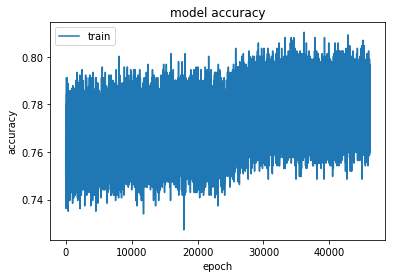

In [144]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

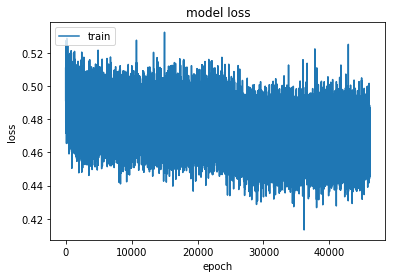

In [145]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [146]:
result = model.predict(test_np)

In [147]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": (result[:,0]<0.5).astype("int32")
    })

submission.to_csv('submission.csv', index=False)

In [148]:
(result[:,0]>0.5).astype("int32")

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,